In [3]:
import os
import random
import shutil
from pathlib import Path
import pandas as pd

# Configura estas rutas
ORIGINAL_PATH = r"C:\Users\Melissa\Documents\Maestria Ciencia Datos\Vision_Computador\3-ViT & Transferencia\256_ObjectCategories"  # <- Ajusta esta ruta
SUBSET_PATH = "caltech256_subset"
SUBSET_RATIO = 0.3  # Puedes cambiar entre 0.2 y 0.5

# Crear carpeta del subconjunto si no existe
Path(SUBSET_PATH).mkdir(parents=True, exist_ok=True)

selected_images = []

# Iterar sobre categorías
categories = sorted(os.listdir(ORIGINAL_PATH))
for category in categories:
    category_path = os.path.join(ORIGINAL_PATH, category)
    if not os.path.isdir(category_path):
        continue

    images = os.listdir(category_path)
    n_select = max(1, int(len(images) * SUBSET_RATIO))
    selected = random.sample(images, n_select)

    dest_category_path = os.path.join(SUBSET_PATH, category)
    os.makedirs(dest_category_path, exist_ok=True)

    for img in selected:
        src = os.path.join(category_path, img)
        dst = os.path.join(dest_category_path, img)
        shutil.copy(src, dst)
        selected_images.append({
            "category": category,
            "image_path": dst
        })

# Guardar CSV con la información del subconjunto
df = pd.DataFrame(selected_images)
df.to_csv(r"C:\Users\Melissa\Documents\Maestria Ciencia Datos\Vision_Computador\3-ViT & Transferencia\caltech256_subset_info.csv", index=False)
print("Subconjunto guardado. Total imágenes:", len(df))
print("CSV: caltech256_subset_info.csv")


Subconjunto guardado. Total imágenes: 9076
CSV: caltech256_subset_info.csv


In [5]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tqdm import tqdm

# Cargar modelo preentrenado MobileNetV2 sin la capa final
model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

# Ruta al CSV generado previamente
df = pd.read_csv(r"C:\Users\Melissa\Documents\Maestria Ciencia Datos\Vision_Computador\3-ViT & Transferencia\caltech256_subset_info.csv")

# Función para cargar imagen y convertirla en tensor procesado
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return preprocess_input(x)

# Extraer características
features = []
valid_paths = []

for path in tqdm(df['image_path'], desc="Extrayendo características"):
    try:
        x = load_and_preprocess_image(path)
        feat = model.predict(x)
        features.append(feat.flatten())
        valid_paths.append(path)
    except Exception as e:
        print(f"Error con imagen: {path} | {e}")

# Crear nuevo DataFrame con las características
df_filtered = df[df['image_path'].isin(valid_paths)].copy()
df_filtered['features'] = features

# Guardar
df_filtered.to_pickle(r"C:\Users\Melissa\Documents\Maestria Ciencia Datos\Vision_Computador\3-ViT & Transferencia\caltech256_features_mobilenet.pkl")
print("Características extraídas y guardadas en caltech256_features_mobilenet.pkl")


C:\Users\Melissa\AppData\Local\Temp\ipykernel_14104\1245645395.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
Extrayendo características:   0%|          | 0/9076 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 892ms/step


Extrayendo características:   0%|          | 1/9076 [00:01<2:33:17,  1.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   0%|          | 2/9076 [00:01<1:13:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   0%|          | 4/9076 [00:01<36:52,  4.10it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   0%|          | 6/9076 [00:01<26:22,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   0%|          | 7/9076 [00:01<23:59,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   0%|          | 8/9076 [00:01<23:25,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   0%|          | 9/9076 [00:01<21:25,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   0%|          | 11/9076 [00:02<18:05,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Extrayendo características:   0%|          | 13/9076 [00:02<16:20,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   0%|          | 15/9076 [00:02<15:19,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   0%|          | 17/9076 [00:02<14:44, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   0%|          | 19/9076 [00:02<15:08,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   0%|          | 21/9076 [00:03<14:41, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   0%|          | 23/9076 [00:03<14:20, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   0%|          | 25/9076 [00:03<14:08, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   0%|          | 27/9076 [00:03<13:53, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   0%|          | 29/9076 [00:03<13:45, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   0%|          | 31/9076 [00:03<14:27, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   0%|          | 33/9076 [00:04<14:52, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   0%|          | 35/9076 [00:04<14:26, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   0%|          | 37/9076 [00:04<14:16, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   0%|          | 39/9076 [00:04<14:08, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   0%|          | 41/9076 [00:04<13:54, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   0%|          | 43/9076 [00:05<14:44, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   0%|          | 45/9076 [00:05<14:18, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   1%|          | 47/9076 [00:05<14:00, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Extrayendo características:   1%|          | 49/9076 [00:05<13:48, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Extrayendo características:   1%|          | 51/9076 [00:05<13:45, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   1%|          | 53/9076 [00:05<13:36, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   1%|          | 55/9076 [00:06<14:33, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   1%|          | 57/9076 [00:06<14:11, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   1%|          | 59/9076 [00:06<13:58, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   1%|          | 61/9076 [00:06<13:41, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   1%|          | 63/9076 [00:06<13:41, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   1%|          | 65/9076 [00:07<15:12,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   1%|          | 67/9076 [00:07<15:00, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   1%|          | 69/9076 [00:07<14:59, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   1%|          | 71/9076 [00:07<14:42, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:   1%|          | 73/9076 [00:07<14:40, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   1%|          | 75/9076 [00:08<15:07,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:   1%|          | 76/9076 [00:08<16:07,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Extrayendo características:   1%|          | 78/9076 [00:08<15:01,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   1%|          | 80/9076 [00:08<15:03,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   1%|          | 81/9076 [00:08<15:04,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   1%|          | 83/9076 [00:08<14:26, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   1%|          | 85/9076 [00:09<14:10, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   1%|          | 87/9076 [00:09<15:21,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:   1%|          | 88/9076 [00:09<15:25,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   1%|          | 89/9076 [00:09<15:20,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   1%|          | 90/9076 [00:09<15:42,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   1%|          | 91/9076 [00:09<16:33,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:   1%|          | 92/9076 [00:09<17:15,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   1%|          | 93/9076 [00:10<17:43,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   1%|          | 94/9076 [00:10<17:18,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:   1%|          | 95/9076 [00:10<18:19,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   1%|          | 96/9076 [00:10<17:33,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   1%|          | 97/9076 [00:10<17:18,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   1%|          | 98/9076 [00:10<16:57,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   1%|          | 99/9076 [00:10<16:45,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   1%|          | 100/9076 [00:10<16:19,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   1%|          | 102/9076 [00:11<15:36,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   1%|          | 103/9076 [00:11<17:29,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   1%|          | 104/9076 [00:11<17:00,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   1%|          | 105/9076 [00:11<17:11,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   1%|          | 106/9076 [00:11<16:34,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   1%|          | 107/9076 [00:11<16:10,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   1%|          | 108/9076 [00:11<16:18,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   1%|          | 110/9076 [00:11<15:05,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   1%|          | 111/9076 [00:12<16:09,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   1%|          | 113/9076 [00:12<14:57,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   1%|▏         | 115/9076 [00:12<14:16, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   1%|▏         | 117/9076 [00:12<14:07, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   1%|▏         | 119/9076 [00:12<14:05, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   1%|▏         | 121/9076 [00:12<14:03, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   1%|▏         | 123/9076 [00:13<14:41, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Extrayendo características:   1%|▏         | 125/9076 [00:13<14:39, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   1%|▏         | 127/9076 [00:13<14:53, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   1%|▏         | 129/9076 [00:13<14:56,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   1%|▏         | 131/9076 [00:13<14:37, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:   1%|▏         | 133/9076 [00:14<17:13,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   1%|▏         | 134/9076 [00:14<17:00,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   1%|▏         | 135/9076 [00:14<16:50,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   2%|▏         | 137/9076 [00:14<15:26,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   2%|▏         | 139/9076 [00:14<14:55,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   2%|▏         | 141/9076 [00:15<14:28, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   2%|▏         | 143/9076 [00:15<14:22, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   2%|▏         | 145/9076 [00:15<14:46, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   2%|▏         | 147/9076 [00:15<14:34, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   2%|▏         | 149/9076 [00:15<14:19, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   2%|▏         | 151/9076 [00:15<14:01, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   2%|▏         | 153/9076 [00:16<13:34, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   2%|▏         | 155/9076 [00:16<13:21, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   2%|▏         | 157/9076 [00:16<13:11, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   2%|▏         | 159/9076 [00:16<13:27, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   2%|▏         | 161/9076 [00:16<13:50, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   2%|▏         | 163/9076 [00:17<13:36, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   2%|▏         | 165/9076 [00:17<13:51, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   2%|▏         | 167/9076 [00:17<13:43, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   2%|▏         | 169/9076 [00:17<13:41, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   2%|▏         | 171/9076 [00:17<14:43, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   2%|▏         | 173/9076 [00:18<14:59,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:   2%|▏         | 175/9076 [00:18<14:31, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   2%|▏         | 177/9076 [00:18<14:18, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   2%|▏         | 179/9076 [00:18<14:10, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   2%|▏         | 181/9076 [00:18<14:49, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   2%|▏         | 183/9076 [00:19<14:28, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   2%|▏         | 185/9076 [00:19<14:12, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   2%|▏         | 187/9076 [00:19<14:28, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   2%|▏         | 189/9076 [00:19<14:32, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   2%|▏         | 191/9076 [00:19<14:42, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   2%|▏         | 193/9076 [00:20<15:57,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   2%|▏         | 194/9076 [00:20<15:52,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   2%|▏         | 195/9076 [00:20<15:43,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   2%|▏         | 196/9076 [00:20<15:51,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   2%|▏         | 197/9076 [00:20<15:58,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   2%|▏         | 198/9076 [00:20<15:52,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:   2%|▏         | 199/9076 [00:20<17:09,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   2%|▏         | 200/9076 [00:20<16:50,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   2%|▏         | 201/9076 [00:20<16:21,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   2%|▏         | 203/9076 [00:21<15:02,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   2%|▏         | 205/9076 [00:21<14:36, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   2%|▏         | 206/9076 [00:21<14:50,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   2%|▏         | 207/9076 [00:21<16:11,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   2%|▏         | 209/9076 [00:21<15:19,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   2%|▏         | 211/9076 [00:21<14:46, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   2%|▏         | 212/9076 [00:22<15:05,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   2%|▏         | 213/9076 [00:22<15:07,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:   2%|▏         | 215/9076 [00:22<16:05,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   2%|▏         | 216/9076 [00:22<15:48,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   2%|▏         | 217/9076 [00:22<15:36,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   2%|▏         | 218/9076 [00:22<15:25,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   2%|▏         | 220/9076 [00:22<14:23, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   2%|▏         | 222/9076 [00:23<14:10, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Extrayendo características:   2%|▏         | 224/9076 [00:23<14:55,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   2%|▏         | 225/9076 [00:23<15:01,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Extrayendo características:   2%|▏         | 226/9076 [00:23<15:02,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   3%|▎         | 227/9076 [00:23<15:21,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   3%|▎         | 229/9076 [00:23<14:39, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   3%|▎         | 231/9076 [00:23<14:11, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   3%|▎         | 233/9076 [00:24<14:52,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   3%|▎         | 234/9076 [00:24<14:53,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   3%|▎         | 236/9076 [00:24<14:43, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   3%|▎         | 238/9076 [00:24<14:27, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   3%|▎         | 240/9076 [00:24<14:07, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   3%|▎         | 242/9076 [00:25<13:55, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   3%|▎         | 244/9076 [00:25<14:39, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   3%|▎         | 246/9076 [00:25<14:40, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   3%|▎         | 248/9076 [00:25<14:34, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   3%|▎         | 250/9076 [00:25<14:20, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   3%|▎         | 252/9076 [00:26<14:25, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   3%|▎         | 254/9076 [00:26<15:28,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   3%|▎         | 255/9076 [00:26<15:50,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   3%|▎         | 256/9076 [00:26<16:02,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   3%|▎         | 257/9076 [00:26<16:05,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   3%|▎         | 258/9076 [00:26<15:57,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   3%|▎         | 259/9076 [00:26<15:39,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:   3%|▎         | 260/9076 [00:26<17:11,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   3%|▎         | 261/9076 [00:27<16:58,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   3%|▎         | 262/9076 [00:27<24:14,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   3%|▎         | 263/9076 [00:27<21:37,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   3%|▎         | 264/9076 [00:27<19:42,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   3%|▎         | 266/9076 [00:27<16:59,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:   3%|▎         | 267/9076 [00:27<17:20,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   3%|▎         | 269/9076 [00:28<15:55,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   3%|▎         | 270/9076 [00:28<15:45,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   3%|▎         | 272/9076 [00:28<14:54,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   3%|▎         | 273/9076 [00:28<15:19,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   3%|▎         | 274/9076 [00:28<15:21,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:   3%|▎         | 275/9076 [00:28<16:47,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   3%|▎         | 277/9076 [00:28<15:30,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   3%|▎         | 278/9076 [00:29<15:40,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   3%|▎         | 280/9076 [00:29<14:46,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   3%|▎         | 281/9076 [00:29<14:47,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   3%|▎         | 282/9076 [00:29<15:01,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   3%|▎         | 284/9076 [00:29<15:36,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   3%|▎         | 286/9076 [00:29<15:04,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   3%|▎         | 287/9076 [00:29<15:08,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   3%|▎         | 289/9076 [00:30<14:33, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   3%|▎         | 291/9076 [00:30<14:03, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   3%|▎         | 293/9076 [00:30<14:06, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   3%|▎         | 295/9076 [00:30<15:03,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   3%|▎         | 297/9076 [00:30<14:33, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   3%|▎         | 299/9076 [00:31<14:17, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:   3%|▎         | 301/9076 [00:31<14:05, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Extrayendo características:   3%|▎         | 303/9076 [00:31<13:51, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   3%|▎         | 305/9076 [00:31<14:29, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   3%|▎         | 307/9076 [00:31<14:20, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   3%|▎         | 309/9076 [00:32<14:23, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   3%|▎         | 311/9076 [00:32<14:22, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   3%|▎         | 313/9076 [00:32<14:51,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   3%|▎         | 314/9076 [00:32<15:00,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   3%|▎         | 315/9076 [00:32<16:45,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:   3%|▎         | 316/9076 [00:32<16:50,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   3%|▎         | 317/9076 [00:33<16:36,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   4%|▎         | 318/9076 [00:33<16:24,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   4%|▎         | 319/9076 [00:33<16:19,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   4%|▎         | 320/9076 [00:33<16:21,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   4%|▎         | 321/9076 [00:33<16:13,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:   4%|▎         | 322/9076 [00:33<17:36,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   4%|▎         | 323/9076 [00:33<17:03,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   4%|▎         | 325/9076 [00:33<15:19,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   4%|▎         | 326/9076 [00:34<15:40,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   4%|▎         | 327/9076 [00:34<16:08,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   4%|▎         | 328/9076 [00:34<16:07,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   4%|▎         | 329/9076 [00:34<16:47,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   4%|▎         | 331/9076 [00:34<15:27,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   4%|▎         | 332/9076 [00:34<15:38,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   4%|▎         | 333/9076 [00:34<15:22,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   4%|▎         | 335/9076 [00:34<14:51,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   4%|▎         | 337/9076 [00:35<14:15, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   4%|▎         | 339/9076 [00:35<15:01,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   4%|▎         | 340/9076 [00:35<15:12,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   4%|▍         | 341/9076 [00:35<17:09,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   4%|▍         | 342/9076 [00:35<16:37,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   4%|▍         | 344/9076 [00:35<15:40,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   4%|▍         | 345/9076 [00:36<15:38,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:   4%|▍         | 346/9076 [00:36<16:47,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   4%|▍         | 347/9076 [00:36<16:32,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:   4%|▍         | 348/9076 [00:36<16:21,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:   4%|▍         | 350/9076 [00:36<15:14,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   4%|▍         | 352/9076 [00:36<14:37,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   4%|▍         | 354/9076 [00:36<14:08, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   4%|▍         | 356/9076 [00:37<15:21,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   4%|▍         | 358/9076 [00:37<14:46,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Extrayendo características:   4%|▍         | 360/9076 [00:37<14:18, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   4%|▍         | 362/9076 [00:37<14:00, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Extrayendo características:   4%|▍         | 364/9076 [00:37<13:24, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   4%|▍         | 366/9076 [00:38<13:48, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   4%|▍         | 368/9076 [00:38<13:21, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:   4%|▍         | 370/9076 [00:38<13:25, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Extrayendo características:   4%|▍         | 372/9076 [00:38<13:03, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   4%|▍         | 374/9076 [00:38<13:26, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   4%|▍         | 376/9076 [00:39<13:31, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   4%|▍         | 378/9076 [00:39<14:33,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   4%|▍         | 380/9076 [00:39<14:30,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   4%|▍         | 382/9076 [00:39<14:18, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   4%|▍         | 384/9076 [00:39<14:12, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:   4%|▍         | 386/9076 [00:40<13:55, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   4%|▍         | 388/9076 [00:40<14:19, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   4%|▍         | 390/9076 [00:40<13:58, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:   4%|▍         | 392/9076 [00:40<13:46, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   4%|▍         | 394/9076 [00:40<13:30, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Extrayendo características:   4%|▍         | 396/9076 [00:41<13:42, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Extrayendo características:   4%|▍         | 398/9076 [00:41<13:38, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   4%|▍         | 400/9076 [00:41<14:29,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   4%|▍         | 402/9076 [00:41<14:30,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   4%|▍         | 404/9076 [00:41<14:05, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   4%|▍         | 406/9076 [00:41<13:54, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Extrayendo características:   4%|▍         | 408/9076 [00:42<13:36, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   5%|▍         | 410/9076 [00:42<14:29,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   5%|▍         | 412/9076 [00:42<14:01, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   5%|▍         | 414/9076 [00:42<13:39, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   5%|▍         | 416/9076 [00:42<13:08, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   5%|▍         | 418/9076 [00:43<12:48, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   5%|▍         | 420/9076 [00:43<12:58, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   5%|▍         | 422/9076 [00:43<13:06, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   5%|▍         | 424/9076 [00:43<13:59, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   5%|▍         | 426/9076 [00:43<13:15, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   5%|▍         | 428/9076 [00:44<13:00, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   5%|▍         | 430/9076 [00:44<12:46, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   5%|▍         | 432/9076 [00:44<12:27, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   5%|▍         | 434/9076 [00:44<12:20, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   5%|▍         | 436/9076 [00:44<12:13, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   5%|▍         | 438/9076 [00:44<13:03, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   5%|▍         | 440/9076 [00:45<13:02, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   5%|▍         | 442/9076 [00:45<13:01, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   5%|▍         | 444/9076 [00:45<13:00, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   5%|▍         | 446/9076 [00:45<13:08, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   5%|▍         | 448/9076 [00:45<13:15, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   5%|▍         | 450/9076 [00:45<13:10, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   5%|▍         | 452/9076 [00:46<13:43, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   5%|▌         | 454/9076 [00:46<13:16, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   5%|▌         | 456/9076 [00:46<12:56, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   5%|▌         | 458/9076 [00:46<12:31, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   5%|▌         | 460/9076 [00:46<12:13, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   5%|▌         | 462/9076 [00:47<12:06, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   5%|▌         | 464/9076 [00:47<12:42, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   5%|▌         | 466/9076 [00:47<12:33, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   5%|▌         | 468/9076 [00:47<12:05, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   5%|▌         | 470/9076 [00:47<12:15, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Extrayendo características:   5%|▌         | 472/9076 [00:47<12:01, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   5%|▌         | 474/9076 [00:48<12:06, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Extrayendo características:   5%|▌         | 476/9076 [00:48<12:01, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   5%|▌         | 478/9076 [00:48<12:53, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   5%|▌         | 480/9076 [00:48<12:42, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   5%|▌         | 482/9076 [00:48<12:26, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:   5%|▌         | 484/9076 [00:48<12:22, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   5%|▌         | 486/9076 [00:49<12:13, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   5%|▌         | 488/9076 [00:49<12:12, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   5%|▌         | 490/9076 [00:49<12:47, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   5%|▌         | 492/9076 [00:49<12:50, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   5%|▌         | 494/9076 [00:49<12:55, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:   5%|▌         | 496/9076 [00:49<12:25, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   5%|▌         | 498/9076 [00:50<12:30, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   6%|▌         | 500/9076 [00:50<12:23, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   6%|▌         | 502/9076 [00:50<13:00, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   6%|▌         | 504/9076 [00:50<12:47, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:   6%|▌         | 506/9076 [00:50<12:57, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:   6%|▌         | 508/9076 [00:51<13:19, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   6%|▌         | 510/9076 [00:51<14:49,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   6%|▌         | 512/9076 [00:51<14:10, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   6%|▌         | 514/9076 [00:51<15:04,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   6%|▌         | 516/9076 [00:51<14:20,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   6%|▌         | 518/9076 [00:52<13:57, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


Extrayendo características:   6%|▌         | 520/9076 [00:52<17:12,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   6%|▌         | 522/9076 [00:52<15:39,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   6%|▌         | 524/9076 [00:52<14:21,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:   6%|▌         | 526/9076 [00:52<14:07, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   6%|▌         | 528/9076 [00:53<13:32, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   6%|▌         | 530/9076 [00:53<12:59, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   6%|▌         | 532/9076 [00:53<12:28, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   6%|▌         | 534/9076 [00:53<12:28, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   6%|▌         | 536/9076 [00:53<14:05, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   6%|▌         | 538/9076 [00:54<14:15,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   6%|▌         | 540/9076 [00:54<13:32, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   6%|▌         | 542/9076 [00:54<13:06, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   6%|▌         | 544/9076 [00:54<16:06,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   6%|▌         | 546/9076 [00:54<14:58,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   6%|▌         | 548/9076 [00:55<14:06, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   6%|▌         | 550/9076 [00:55<13:50, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   6%|▌         | 552/9076 [00:55<13:14, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   6%|▌         | 554/9076 [00:55<12:31, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   6%|▌         | 556/9076 [00:55<12:23, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   6%|▌         | 558/9076 [00:55<11:51, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:   6%|▌         | 560/9076 [00:56<12:55, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:   6%|▌         | 562/9076 [00:56<14:55,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   6%|▌         | 564/9076 [00:56<15:20,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   6%|▌         | 565/9076 [00:56<15:56,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   6%|▌         | 566/9076 [00:56<16:19,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:   6%|▌         | 567/9076 [00:57<16:41,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   6%|▋         | 568/9076 [00:57<17:00,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:   6%|▋         | 569/9076 [00:57<16:53,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   6%|▋         | 570/9076 [00:57<17:57,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   6%|▋         | 571/9076 [00:57<18:15,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:   6%|▋         | 572/9076 [00:57<18:15,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   6%|▋         | 573/9076 [00:57<17:45,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:   6%|▋         | 574/9076 [00:57<18:30,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:   6%|▋         | 575/9076 [00:58<17:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:   6%|▋         | 576/9076 [00:58<17:52,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:   6%|▋         | 577/9076 [00:58<18:52,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:   6%|▋         | 578/9076 [00:58<18:31,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:   6%|▋         | 579/9076 [00:58<19:59,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extrayendo características:   6%|▋         | 580/9076 [00:58<21:50,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Extrayendo características:   6%|▋         | 581/9076 [00:59<21:59,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:   6%|▋         | 582/9076 [00:59<20:47,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:   6%|▋         | 583/9076 [00:59<19:55,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:   6%|▋         | 584/9076 [00:59<20:12,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:   6%|▋         | 585/9076 [00:59<20:26,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:   6%|▋         | 586/9076 [00:59<19:41,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   6%|▋         | 587/9076 [00:59<19:30,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:   6%|▋         | 588/9076 [00:59<19:07,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:   6%|▋         | 589/9076 [01:00<18:15,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   7%|▋         | 590/9076 [01:00<19:05,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 591/9076 [01:00<20:00,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   7%|▋         | 592/9076 [01:00<19:19,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:   7%|▋         | 593/9076 [01:00<19:20,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:   7%|▋         | 594/9076 [01:00<19:02,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:   7%|▋         | 595/9076 [01:00<18:51,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   7%|▋         | 596/9076 [01:01<18:44,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   7%|▋         | 597/9076 [01:01<17:56,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:   7%|▋         | 598/9076 [01:01<21:03,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


Extrayendo características:   7%|▋         | 599/9076 [01:01<23:39,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


Extrayendo características:   7%|▋         | 600/9076 [01:01<25:30,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 601/9076 [01:01<25:18,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   7%|▋         | 602/9076 [01:02<23:27,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 603/9076 [01:02<22:19,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:   7%|▋         | 604/9076 [01:02<22:06,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:   7%|▋         | 605/9076 [01:02<21:06,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 606/9076 [01:02<20:01,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   7%|▋         | 607/9076 [01:02<19:35,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:   7%|▋         | 608/9076 [01:02<19:22,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   7%|▋         | 609/9076 [01:03<19:07,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:   7%|▋         | 610/9076 [01:03<19:13,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:   7%|▋         | 611/9076 [01:03<19:54,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   7%|▋         | 612/9076 [01:03<19:13,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   7%|▋         | 613/9076 [01:03<19:20,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:   7%|▋         | 614/9076 [01:03<19:06,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:   7%|▋         | 615/9076 [01:03<18:51,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:   7%|▋         | 616/9076 [01:03<18:35,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:   7%|▋         | 617/9076 [01:04<19:42,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 618/9076 [01:04<21:46,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:   7%|▋         | 619/9076 [01:04<21:59,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:   7%|▋         | 620/9076 [01:04<21:39,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:   7%|▋         | 621/9076 [01:04<20:58,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:   7%|▋         | 622/9076 [01:04<21:23,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 623/9076 [01:05<21:11,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 624/9076 [01:05<21:10,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:   7%|▋         | 625/9076 [01:05<21:56,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 626/9076 [01:05<21:31,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   7%|▋         | 627/9076 [01:05<20:48,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   7%|▋         | 628/9076 [01:05<22:00,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Extrayendo características:   7%|▋         | 629/9076 [01:06<22:43,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:   7%|▋         | 630/9076 [01:06<22:24,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:   7%|▋         | 631/9076 [01:06<22:46,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:   7%|▋         | 632/9076 [01:06<23:22,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Extrayendo características:   7%|▋         | 633/9076 [01:06<24:12,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:   7%|▋         | 634/9076 [01:06<24:49,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:   7%|▋         | 635/9076 [01:07<25:18,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:   7%|▋         | 636/9076 [01:07<24:05,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:   7%|▋         | 637/9076 [01:07<22:38,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   7%|▋         | 638/9076 [01:07<22:38,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   7%|▋         | 639/9076 [01:07<21:21,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:   7%|▋         | 640/9076 [01:07<20:52,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:   7%|▋         | 641/9076 [01:07<21:34,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:   7%|▋         | 642/9076 [01:08<21:21,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 643/9076 [01:08<20:40,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:   7%|▋         | 644/9076 [01:08<20:45,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:   7%|▋         | 645/9076 [01:08<20:51,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:   7%|▋         | 646/9076 [01:08<20:44,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 647/9076 [01:08<20:25,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   7%|▋         | 648/9076 [01:08<21:25,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   7%|▋         | 649/9076 [01:09<20:24,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:   7%|▋         | 650/9076 [01:09<19:29,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:   7%|▋         | 651/9076 [01:09<19:53,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:   7%|▋         | 652/9076 [01:09<19:36,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:   7%|▋         | 653/9076 [01:09<19:17,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:   7%|▋         | 654/9076 [01:09<19:25,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:   7%|▋         | 655/9076 [01:09<19:46,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:   7%|▋         | 656/9076 [01:10<19:52,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:   7%|▋         | 657/9076 [01:10<18:42,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Extrayendo características:   7%|▋         | 658/9076 [01:10<21:05,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:   7%|▋         | 659/9076 [01:10<22:19,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:   7%|▋         | 660/9076 [01:10<21:06,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:   7%|▋         | 661/9076 [01:10<19:35,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extrayendo características:   7%|▋         | 662/9076 [01:10<20:13,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:   7%|▋         | 663/9076 [01:11<22:10,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:   7%|▋         | 664/9076 [01:11<21:53,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   7%|▋         | 665/9076 [01:11<21:07,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:   7%|▋         | 666/9076 [01:11<20:15,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:   7%|▋         | 667/9076 [01:11<19:41,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:   7%|▋         | 668/9076 [01:11<19:27,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:   7%|▋         | 669/9076 [01:11<18:55,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   7%|▋         | 670/9076 [01:12<19:27,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   7%|▋         | 671/9076 [01:12<18:17,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   7%|▋         | 673/9076 [01:12<15:14,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   7%|▋         | 675/9076 [01:12<13:39, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   7%|▋         | 677/9076 [01:12<13:04, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   7%|▋         | 679/9076 [01:12<12:29, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:   8%|▊         | 681/9076 [01:13<13:56, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   8%|▊         | 683/9076 [01:13<14:58,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   8%|▊         | 684/9076 [01:13<15:25,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   8%|▊         | 686/9076 [01:13<14:28,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:   8%|▊         | 687/9076 [01:13<14:34,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   8%|▊         | 689/9076 [01:14<14:50,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   8%|▊         | 691/9076 [01:14<14:07,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   8%|▊         | 693/9076 [01:14<13:14, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   8%|▊         | 695/9076 [01:14<12:54, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   8%|▊         | 697/9076 [01:14<12:45, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:   8%|▊         | 699/9076 [01:14<12:35, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   8%|▊         | 701/9076 [01:15<14:24,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   8%|▊         | 703/9076 [01:15<13:55, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   8%|▊         | 705/9076 [01:15<16:39,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   8%|▊         | 707/9076 [01:15<15:21,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   8%|▊         | 709/9076 [01:16<14:31,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   8%|▊         | 711/9076 [01:16<13:43, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   8%|▊         | 713/9076 [01:16<13:49, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   8%|▊         | 715/9076 [01:16<13:21, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:   8%|▊         | 717/9076 [01:16<13:03, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   8%|▊         | 719/9076 [01:16<12:35, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   8%|▊         | 721/9076 [01:17<12:17, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:   8%|▊         | 723/9076 [01:17<15:48,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   8%|▊         | 724/9076 [01:17<15:40,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:   8%|▊         | 725/9076 [01:17<15:47,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   8%|▊         | 727/9076 [01:17<14:27,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:   8%|▊         | 728/9076 [01:17<15:04,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


Extrayendo características:   8%|▊         | 729/9076 [01:18<18:13,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:   8%|▊         | 730/9076 [01:18<19:50,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:   8%|▊         | 731/9076 [01:18<18:44,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


Extrayendo características:   8%|▊         | 732/9076 [01:18<22:10,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   8%|▊         | 733/9076 [01:18<20:02,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:   8%|▊         | 734/9076 [01:18<18:52,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:   8%|▊         | 736/9076 [01:19<17:18,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:   8%|▊         | 737/9076 [01:19<18:04,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   8%|▊         | 739/9076 [01:19<15:34,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   8%|▊         | 741/9076 [01:19<14:05,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   8%|▊         | 743/9076 [01:19<13:15, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   8%|▊         | 745/9076 [01:19<12:46, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:   8%|▊         | 747/9076 [01:20<13:01, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   8%|▊         | 749/9076 [01:20<12:42, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   8%|▊         | 751/9076 [01:20<12:10, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   8%|▊         | 753/9076 [01:20<11:44, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   8%|▊         | 755/9076 [01:20<11:40, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:   8%|▊         | 757/9076 [01:21<14:42,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   8%|▊         | 759/9076 [01:21<14:04,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   8%|▊         | 761/9076 [01:21<13:04, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:   8%|▊         | 763/9076 [01:21<12:45, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   8%|▊         | 765/9076 [01:21<13:49, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:   8%|▊         | 767/9076 [01:22<14:11,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   8%|▊         | 769/9076 [01:22<13:31, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   8%|▊         | 771/9076 [01:22<12:57, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   9%|▊         | 773/9076 [01:22<12:22, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   9%|▊         | 775/9076 [01:22<11:46, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:   9%|▊         | 777/9076 [01:22<13:34, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:   9%|▊         | 779/9076 [01:23<14:43,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   9%|▊         | 781/9076 [01:23<13:56,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:   9%|▊         | 783/9076 [01:23<13:35, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   9%|▊         | 785/9076 [01:23<12:43, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:   9%|▊         | 787/9076 [01:23<12:50, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   9%|▊         | 789/9076 [01:24<12:50, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   9%|▊         | 791/9076 [01:24<13:13, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:   9%|▊         | 793/9076 [01:24<13:48, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:   9%|▉         | 795/9076 [01:24<14:09,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   9%|▉         | 796/9076 [01:24<14:07,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:   9%|▉         | 797/9076 [01:24<14:18,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   9%|▉         | 799/9076 [01:25<13:28, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:   9%|▉         | 801/9076 [01:25<13:44, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Extrayendo características:   9%|▉         | 803/9076 [01:25<12:48, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   9%|▉         | 805/9076 [01:25<11:59, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   9%|▉         | 807/9076 [01:25<11:31, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:   9%|▉         | 809/9076 [01:25<11:21, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   9%|▉         | 811/9076 [01:26<11:05, 12.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   9%|▉         | 813/9076 [01:26<10:59, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   9%|▉         | 815/9076 [01:26<10:59, 12.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   9%|▉         | 817/9076 [01:26<11:00, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Extrayendo características:   9%|▉         | 819/9076 [01:26<10:35, 13.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   9%|▉         | 821/9076 [01:26<11:36, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:   9%|▉         | 823/9076 [01:27<12:05, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   9%|▉         | 825/9076 [01:27<11:44, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   9%|▉         | 827/9076 [01:27<11:31, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   9%|▉         | 829/9076 [01:27<11:20, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:   9%|▉         | 831/9076 [01:27<11:00, 12.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:   9%|▉         | 833/9076 [01:27<10:53, 12.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:   9%|▉         | 835/9076 [01:28<10:48, 12.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:   9%|▉         | 837/9076 [01:28<11:41, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   9%|▉         | 839/9076 [01:28<12:51, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   9%|▉         | 841/9076 [01:28<13:06, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:   9%|▉         | 843/9076 [01:28<13:16, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:   9%|▉         | 845/9076 [01:29<12:57, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   9%|▉         | 847/9076 [01:29<12:55, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:   9%|▉         | 849/9076 [01:29<12:30, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:   9%|▉         | 851/9076 [01:29<12:26, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:   9%|▉         | 853/9076 [01:29<12:07, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:   9%|▉         | 855/9076 [01:29<12:22, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:   9%|▉         | 857/9076 [01:30<12:26, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:   9%|▉         | 859/9076 [01:30<12:34, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:   9%|▉         | 861/9076 [01:30<13:03, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  10%|▉         | 863/9076 [01:30<13:13, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  10%|▉         | 865/9076 [01:31<14:49,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  10%|▉         | 866/9076 [01:31<14:51,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  10%|▉         | 867/9076 [01:31<15:19,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  10%|▉         | 868/9076 [01:31<15:10,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  10%|▉         | 869/9076 [01:31<16:11,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  10%|▉         | 871/9076 [01:31<14:21,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  10%|▉         | 872/9076 [01:31<14:27,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  10%|▉         | 874/9076 [01:31<13:45,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  10%|▉         | 875/9076 [01:32<14:04,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  10%|▉         | 877/9076 [01:32<13:03, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  10%|▉         | 879/9076 [01:32<12:20, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  10%|▉         | 881/9076 [01:32<12:34, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  10%|▉         | 883/9076 [01:32<12:20, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  10%|▉         | 885/9076 [01:32<13:17, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  10%|▉         | 887/9076 [01:33<13:19, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  10%|▉         | 889/9076 [01:33<12:40, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  10%|▉         | 891/9076 [01:33<12:13, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  10%|▉         | 893/9076 [01:33<13:08, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  10%|▉         | 895/9076 [01:33<12:43, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  10%|▉         | 897/9076 [01:34<12:30, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  10%|▉         | 899/9076 [01:34<12:11, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  10%|▉         | 901/9076 [01:34<12:06, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  10%|▉         | 903/9076 [01:34<12:04, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  10%|▉         | 905/9076 [01:34<12:23, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  10%|▉         | 907/9076 [01:34<12:16, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  10%|█         | 909/9076 [01:35<12:10, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  10%|█         | 911/9076 [01:35<12:13, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  10%|█         | 913/9076 [01:35<12:13, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  10%|█         | 915/9076 [01:35<12:55, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  10%|█         | 917/9076 [01:35<12:37, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  10%|█         | 919/9076 [01:36<12:11, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  10%|█         | 921/9076 [01:36<11:56, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  10%|█         | 923/9076 [01:36<12:27, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  10%|█         | 925/9076 [01:36<12:40, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  10%|█         | 927/9076 [01:36<12:37, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  10%|█         | 929/9076 [01:37<12:50, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  10%|█         | 931/9076 [01:37<12:41, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  10%|█         | 933/9076 [01:37<13:50,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  10%|█         | 934/9076 [01:37<14:04,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  10%|█         | 935/9076 [01:37<14:24,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  10%|█         | 937/9076 [01:37<13:25, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  10%|█         | 939/9076 [01:38<13:40,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  10%|█         | 940/9076 [01:38<14:33,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  10%|█         | 942/9076 [01:38<13:41,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  10%|█         | 944/9076 [01:38<12:37, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  10%|█         | 946/9076 [01:38<12:14, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  10%|█         | 948/9076 [01:38<11:40, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  10%|█         | 950/9076 [01:39<12:07, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Extrayendo características:  10%|█         | 952/9076 [01:39<11:37, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  11%|█         | 954/9076 [01:39<11:29, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  11%|█         | 956/9076 [01:39<11:21, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  11%|█         | 958/9076 [01:39<11:57, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Extrayendo características:  11%|█         | 960/9076 [01:39<11:27, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


Extrayendo características:  11%|█         | 962/9076 [01:40<11:06, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  11%|█         | 964/9076 [01:40<11:01, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Extrayendo características:  11%|█         | 966/9076 [01:40<10:59, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  11%|█         | 968/9076 [01:40<11:25, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  11%|█         | 970/9076 [01:40<11:06, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  11%|█         | 972/9076 [01:40<11:20, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  11%|█         | 974/9076 [01:41<11:00, 12.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  11%|█         | 976/9076 [01:41<12:08, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  11%|█         | 978/9076 [01:41<11:52, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  11%|█         | 980/9076 [01:41<11:42, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  11%|█         | 982/9076 [01:41<11:27, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  11%|█         | 984/9076 [01:41<11:33, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  11%|█         | 986/9076 [01:42<11:58, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  11%|█         | 988/9076 [01:42<11:50, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  11%|█         | 990/9076 [01:42<11:34, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  11%|█         | 992/9076 [01:42<11:10, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  11%|█         | 994/9076 [01:42<11:51, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  11%|█         | 996/9076 [01:43<13:00, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  11%|█         | 998/9076 [01:43<12:47, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  11%|█         | 1000/9076 [01:43<12:19, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  11%|█         | 1002/9076 [01:43<11:56, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  11%|█         | 1004/9076 [01:43<12:41, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  11%|█         | 1006/9076 [01:43<12:15, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  11%|█         | 1008/9076 [01:44<11:39, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  11%|█         | 1010/9076 [01:44<11:20, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  11%|█         | 1012/9076 [01:44<11:24, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  11%|█         | 1014/9076 [01:44<11:48, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  11%|█         | 1016/9076 [01:44<11:29, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  11%|█         | 1018/9076 [01:44<11:17, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  11%|█         | 1020/9076 [01:45<10:58, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  11%|█▏        | 1022/9076 [01:45<11:34, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  11%|█▏        | 1024/9076 [01:45<11:09, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  11%|█▏        | 1026/9076 [01:45<11:02, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  11%|█▏        | 1028/9076 [01:45<10:54, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  11%|█▏        | 1030/9076 [01:45<10:51, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  11%|█▏        | 1032/9076 [01:46<11:26, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  11%|█▏        | 1034/9076 [01:46<11:00, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  11%|█▏        | 1036/9076 [01:46<10:53, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  11%|█▏        | 1038/9076 [01:46<10:55, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  11%|█▏        | 1040/9076 [01:46<11:21, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  11%|█▏        | 1042/9076 [01:46<11:00, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  12%|█▏        | 1044/9076 [01:47<10:46, 12.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  12%|█▏        | 1046/9076 [01:47<10:40, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  12%|█▏        | 1048/9076 [01:47<10:47, 12.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  12%|█▏        | 1050/9076 [01:47<11:50, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  12%|█▏        | 1052/9076 [01:47<11:18, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  12%|█▏        | 1054/9076 [01:47<11:08, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Extrayendo características:  12%|█▏        | 1056/9076 [01:48<10:51, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  12%|█▏        | 1058/9076 [01:48<11:20, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  12%|█▏        | 1060/9076 [01:48<11:04, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  12%|█▏        | 1062/9076 [01:48<11:21, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1064/9076 [01:48<11:11, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  12%|█▏        | 1066/9076 [01:48<11:42, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  12%|█▏        | 1068/9076 [01:49<11:46, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  12%|█▏        | 1070/9076 [01:49<11:40, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1072/9076 [01:49<11:33, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  12%|█▏        | 1074/9076 [01:49<11:29, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  12%|█▏        | 1076/9076 [01:49<12:19, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  12%|█▏        | 1078/9076 [01:49<12:12, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1080/9076 [01:50<11:43, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  12%|█▏        | 1082/9076 [01:50<11:16, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  12%|█▏        | 1084/9076 [01:50<10:56, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  12%|█▏        | 1086/9076 [01:50<11:35, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  12%|█▏        | 1088/9076 [01:50<11:17, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1090/9076 [01:50<11:05, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  12%|█▏        | 1092/9076 [01:51<10:51, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  12%|█▏        | 1094/9076 [01:51<10:47, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  12%|█▏        | 1096/9076 [01:51<11:28, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  12%|█▏        | 1098/9076 [01:51<11:16, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1100/9076 [01:51<11:16, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  12%|█▏        | 1102/9076 [01:51<11:21, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  12%|█▏        | 1104/9076 [01:52<11:58, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  12%|█▏        | 1106/9076 [01:52<11:41, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  12%|█▏        | 1108/9076 [01:52<11:30, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  12%|█▏        | 1110/9076 [01:52<11:18, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  12%|█▏        | 1112/9076 [01:52<11:36, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  12%|█▏        | 1114/9076 [01:53<11:40, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  12%|█▏        | 1116/9076 [01:53<11:23, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1118/9076 [01:53<11:30, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  12%|█▏        | 1120/9076 [01:53<11:30, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  12%|█▏        | 1122/9076 [01:53<12:01, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  12%|█▏        | 1124/9076 [01:53<11:43, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  12%|█▏        | 1126/9076 [01:54<11:23, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  12%|█▏        | 1128/9076 [01:54<11:18, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  12%|█▏        | 1130/9076 [01:54<11:55, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  12%|█▏        | 1132/9076 [01:54<11:38, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  12%|█▏        | 1134/9076 [01:54<11:14, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Extrayendo características:  13%|█▎        | 1136/9076 [01:54<11:13, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1138/9076 [01:55<11:26, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  13%|█▎        | 1140/9076 [01:55<11:59, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  13%|█▎        | 1142/9076 [01:55<11:51, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  13%|█▎        | 1144/9076 [01:55<11:41, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  13%|█▎        | 1146/9076 [01:55<11:44, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  13%|█▎        | 1148/9076 [01:56<12:14, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1150/9076 [01:56<11:36, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1152/9076 [01:56<11:26, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  13%|█▎        | 1154/9076 [01:56<11:02, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  13%|█▎        | 1156/9076 [01:56<11:13, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  13%|█▎        | 1158/9076 [01:56<11:10, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1160/9076 [01:57<11:04, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  13%|█▎        | 1162/9076 [01:57<11:09, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  13%|█▎        | 1164/9076 [01:57<10:52, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  13%|█▎        | 1166/9076 [01:57<11:30, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1168/9076 [01:57<11:12, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  13%|█▎        | 1170/9076 [01:57<11:00, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  13%|█▎        | 1172/9076 [01:58<10:46, 12.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  13%|█▎        | 1174/9076 [01:58<11:16, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  13%|█▎        | 1176/9076 [01:58<11:02, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  13%|█▎        | 1178/9076 [01:58<10:56, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  13%|█▎        | 1180/9076 [01:58<10:44, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  13%|█▎        | 1182/9076 [01:58<11:05, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  13%|█▎        | 1184/9076 [01:59<11:19, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  13%|█▎        | 1186/9076 [01:59<11:13, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  13%|█▎        | 1188/9076 [01:59<11:00, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  13%|█▎        | 1190/9076 [01:59<10:52, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  13%|█▎        | 1192/9076 [01:59<11:16, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  13%|█▎        | 1194/9076 [01:59<10:57, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  13%|█▎        | 1196/9076 [02:00<10:46, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  13%|█▎        | 1198/9076 [02:00<11:31, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  13%|█▎        | 1200/9076 [02:00<12:18, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1202/9076 [02:00<11:43, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  13%|█▎        | 1204/9076 [02:00<11:19, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  13%|█▎        | 1206/9076 [02:00<11:19, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  13%|█▎        | 1208/9076 [02:01<11:47, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  13%|█▎        | 1210/9076 [02:01<11:44, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1212/9076 [02:01<11:32, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  13%|█▎        | 1214/9076 [02:01<11:47, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  13%|█▎        | 1216/9076 [02:01<12:16, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  13%|█▎        | 1218/9076 [02:02<11:54, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1220/9076 [02:02<11:36, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  13%|█▎        | 1222/9076 [02:02<11:15, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  13%|█▎        | 1224/9076 [02:02<10:52, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▎        | 1226/9076 [02:02<11:28, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  14%|█▎        | 1228/9076 [02:02<11:02, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▎        | 1230/9076 [02:03<10:49, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▎        | 1232/9076 [02:03<10:43, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  14%|█▎        | 1234/9076 [02:03<11:14, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  14%|█▎        | 1236/9076 [02:03<10:55, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▎        | 1238/9076 [02:03<10:39, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  14%|█▎        | 1240/9076 [02:03<10:33, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  14%|█▎        | 1242/9076 [02:04<11:00, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  14%|█▎        | 1244/9076 [02:04<10:56, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  14%|█▎        | 1246/9076 [02:04<10:49, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  14%|█▍        | 1248/9076 [02:04<10:50, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▍        | 1250/9076 [02:04<10:48, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  14%|█▍        | 1252/9076 [02:04<11:13, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▍        | 1254/9076 [02:05<10:53, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▍        | 1256/9076 [02:05<10:36, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  14%|█▍        | 1258/9076 [02:05<10:24, 12.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  14%|█▍        | 1260/9076 [02:05<11:02, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▍        | 1262/9076 [02:05<10:48, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  14%|█▍        | 1264/9076 [02:05<10:40, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▍        | 1266/9076 [02:06<10:24, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  14%|█▍        | 1268/9076 [02:06<10:57, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  14%|█▍        | 1270/9076 [02:06<10:49, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  14%|█▍        | 1272/9076 [02:06<10:42, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  14%|█▍        | 1274/9076 [02:06<10:36, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  14%|█▍        | 1276/9076 [02:06<10:32, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  14%|█▍        | 1278/9076 [02:07<10:58, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▍        | 1280/9076 [02:07<10:44, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  14%|█▍        | 1282/9076 [02:07<10:58, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  14%|█▍        | 1284/9076 [02:07<11:02, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  14%|█▍        | 1286/9076 [02:07<11:49, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  14%|█▍        | 1288/9076 [02:07<11:16, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  14%|█▍        | 1290/9076 [02:08<11:01, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  14%|█▍        | 1292/9076 [02:08<10:59, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▍        | 1294/9076 [02:08<11:24, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  14%|█▍        | 1296/9076 [02:08<11:00, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  14%|█▍        | 1298/9076 [02:08<10:42, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▍        | 1300/9076 [02:08<10:35, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  14%|█▍        | 1302/9076 [02:09<10:54, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  14%|█▍        | 1304/9076 [02:09<10:28, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  14%|█▍        | 1306/9076 [02:09<10:24, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  14%|█▍        | 1308/9076 [02:09<10:24, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  14%|█▍        | 1310/9076 [02:09<10:55, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  14%|█▍        | 1312/9076 [02:09<10:44, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  14%|█▍        | 1314/9076 [02:10<10:32, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  14%|█▍        | 1316/9076 [02:10<10:24, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  15%|█▍        | 1318/9076 [02:10<11:03, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  15%|█▍        | 1320/9076 [02:10<10:44, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  15%|█▍        | 1322/9076 [02:10<10:43, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  15%|█▍        | 1324/9076 [02:10<10:28, 12.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  15%|█▍        | 1326/9076 [02:11<10:41, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  15%|█▍        | 1328/9076 [02:11<10:57, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  15%|█▍        | 1330/9076 [02:11<11:03, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  15%|█▍        | 1332/9076 [02:11<10:51, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  15%|█▍        | 1334/9076 [02:11<10:35, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▍        | 1336/9076 [02:11<10:58, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▍        | 1338/9076 [02:12<10:42, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  15%|█▍        | 1340/9076 [02:12<10:31, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  15%|█▍        | 1342/9076 [02:12<10:33, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  15%|█▍        | 1344/9076 [02:12<10:54, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  15%|█▍        | 1346/9076 [02:12<10:39, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▍        | 1348/9076 [02:12<10:28, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  15%|█▍        | 1350/9076 [02:13<10:14, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  15%|█▍        | 1352/9076 [02:13<11:02, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  15%|█▍        | 1354/9076 [02:13<11:07, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  15%|█▍        | 1356/9076 [02:13<11:09, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▍        | 1358/9076 [02:13<10:58, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  15%|█▍        | 1360/9076 [02:13<10:52, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  15%|█▌        | 1362/9076 [02:14<11:29, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  15%|█▌        | 1364/9076 [02:14<11:11, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  15%|█▌        | 1366/9076 [02:14<10:58, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  15%|█▌        | 1368/9076 [02:14<10:37, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  15%|█▌        | 1370/9076 [02:14<11:18, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  15%|█▌        | 1372/9076 [02:14<10:56, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  15%|█▌        | 1374/9076 [02:15<10:43, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  15%|█▌        | 1376/9076 [02:15<10:33, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▌        | 1378/9076 [02:15<10:57, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  15%|█▌        | 1380/9076 [02:15<10:42, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  15%|█▌        | 1382/9076 [02:15<10:35, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▌        | 1384/9076 [02:15<10:42, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  15%|█▌        | 1386/9076 [02:16<11:09, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  15%|█▌        | 1388/9076 [02:16<11:03, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▌        | 1390/9076 [02:16<10:55, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  15%|█▌        | 1392/9076 [02:16<10:41, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  15%|█▌        | 1394/9076 [02:16<10:59, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  15%|█▌        | 1396/9076 [02:16<10:49, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  15%|█▌        | 1398/9076 [02:17<10:33, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  15%|█▌        | 1400/9076 [02:17<10:22, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  15%|█▌        | 1402/9076 [02:17<10:50, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  15%|█▌        | 1404/9076 [02:17<10:43, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  15%|█▌        | 1406/9076 [02:17<10:27, 12.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▌        | 1408/9076 [02:17<10:12, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  16%|█▌        | 1410/9076 [02:18<10:39, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  16%|█▌        | 1412/9076 [02:18<10:29, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▌        | 1414/9076 [02:18<10:15, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▌        | 1416/9076 [02:18<10:12, 12.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  16%|█▌        | 1418/9076 [02:18<10:45, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▌        | 1420/9076 [02:18<10:25, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▌        | 1422/9076 [02:19<10:35, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▌        | 1424/9076 [02:19<10:25, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  16%|█▌        | 1426/9076 [02:19<11:20, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▌        | 1428/9076 [02:19<11:21, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  16%|█▌        | 1430/9076 [02:19<11:01, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▌        | 1432/9076 [02:19<11:10, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▌        | 1434/9076 [02:20<11:48, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▌        | 1436/9076 [02:20<11:24, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▌        | 1438/9076 [02:20<11:02, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  16%|█▌        | 1440/9076 [02:20<10:41, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  16%|█▌        | 1442/9076 [02:20<10:36, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▌        | 1444/9076 [02:21<10:54, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  16%|█▌        | 1446/9076 [02:21<10:49, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  16%|█▌        | 1448/9076 [02:21<10:41, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  16%|█▌        | 1450/9076 [02:21<10:38, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  16%|█▌        | 1452/9076 [02:21<11:16, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▌        | 1454/9076 [02:21<10:52, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  16%|█▌        | 1456/9076 [02:22<10:39, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  16%|█▌        | 1458/9076 [02:22<10:40, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▌        | 1460/9076 [02:22<11:08, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  16%|█▌        | 1462/9076 [02:22<10:53, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▌        | 1464/9076 [02:22<10:38, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▌        | 1466/9076 [02:22<10:17, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  16%|█▌        | 1468/9076 [02:23<10:46, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▌        | 1470/9076 [02:23<14:49,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  16%|█▌        | 1472/9076 [02:23<13:21,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  16%|█▌        | 1474/9076 [02:23<12:43,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  16%|█▋        | 1476/9076 [02:23<12:30, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  16%|█▋        | 1478/9076 [02:24<11:43, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▋        | 1480/9076 [02:24<11:20, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▋        | 1482/9076 [02:24<10:59, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▋        | 1484/9076 [02:24<11:18, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  16%|█▋        | 1486/9076 [02:24<11:01, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  16%|█▋        | 1488/9076 [02:24<10:48, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  16%|█▋        | 1490/9076 [02:25<10:34, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  16%|█▋        | 1492/9076 [02:25<11:05, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  16%|█▋        | 1494/9076 [02:25<11:09, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  16%|█▋        | 1496/9076 [02:25<11:02, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  17%|█▋        | 1498/9076 [02:25<11:52, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  17%|█▋        | 1500/9076 [02:26<11:25, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  17%|█▋        | 1502/9076 [02:26<11:28, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  17%|█▋        | 1504/9076 [02:26<11:15, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  17%|█▋        | 1506/9076 [02:26<11:40, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  17%|█▋        | 1508/9076 [02:26<11:10, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  17%|█▋        | 1510/9076 [02:26<10:50, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  17%|█▋        | 1512/9076 [02:27<10:33, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  17%|█▋        | 1514/9076 [02:27<10:51, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  17%|█▋        | 1516/9076 [02:27<10:45, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  17%|█▋        | 1518/9076 [02:27<10:37, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  17%|█▋        | 1520/9076 [02:27<11:15, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  17%|█▋        | 1522/9076 [02:27<11:18, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  17%|█▋        | 1524/9076 [02:28<10:54, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  17%|█▋        | 1526/9076 [02:28<10:40, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  17%|█▋        | 1528/9076 [02:28<10:59, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  17%|█▋        | 1530/9076 [02:28<10:52, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  17%|█▋        | 1532/9076 [02:28<10:38, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  17%|█▋        | 1534/9076 [02:29<11:03, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  17%|█▋        | 1536/9076 [02:29<10:45, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  17%|█▋        | 1538/9076 [02:29<10:32, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  17%|█▋        | 1540/9076 [02:29<10:26, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  17%|█▋        | 1542/9076 [02:29<10:55, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  17%|█▋        | 1544/9076 [02:29<10:31, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  17%|█▋        | 1546/9076 [02:30<10:25, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  17%|█▋        | 1548/9076 [02:30<10:29, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  17%|█▋        | 1550/9076 [02:30<10:45, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  17%|█▋        | 1552/9076 [02:30<10:30, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  17%|█▋        | 1554/9076 [02:30<10:57, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  17%|█▋        | 1556/9076 [02:30<11:41, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  17%|█▋        | 1558/9076 [02:31<11:08, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  17%|█▋        | 1560/9076 [02:31<10:47, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  17%|█▋        | 1562/9076 [02:31<10:43, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  17%|█▋        | 1564/9076 [02:31<11:22, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  17%|█▋        | 1566/9076 [02:31<11:18, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  17%|█▋        | 1568/9076 [02:31<10:58, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  17%|█▋        | 1570/9076 [02:32<11:27, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  17%|█▋        | 1572/9076 [02:32<11:23, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  17%|█▋        | 1574/9076 [02:32<11:14, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  17%|█▋        | 1576/9076 [02:32<10:55, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  17%|█▋        | 1578/9076 [02:32<11:18, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  17%|█▋        | 1580/9076 [02:33<10:56, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  17%|█▋        | 1582/9076 [02:33<10:40, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  17%|█▋        | 1584/9076 [02:33<10:57, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  17%|█▋        | 1586/9076 [02:33<10:38, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  17%|█▋        | 1588/9076 [02:33<10:26, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  18%|█▊        | 1590/9076 [02:33<10:19, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  18%|█▊        | 1592/9076 [02:34<10:43, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  18%|█▊        | 1594/9076 [02:34<10:34, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  18%|█▊        | 1596/9076 [02:34<10:22, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  18%|█▊        | 1598/9076 [02:34<10:44, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  18%|█▊        | 1600/9076 [02:34<10:34, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  18%|█▊        | 1602/9076 [02:34<10:22, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  18%|█▊        | 1604/9076 [02:35<10:23, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  18%|█▊        | 1606/9076 [02:35<10:53, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  18%|█▊        | 1608/9076 [02:35<10:34, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  18%|█▊        | 1610/9076 [02:35<10:22, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  18%|█▊        | 1612/9076 [02:35<10:39, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  18%|█▊        | 1614/9076 [02:35<10:36, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  18%|█▊        | 1616/9076 [02:36<10:14, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  18%|█▊        | 1618/9076 [02:36<10:08, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  18%|█▊        | 1620/9076 [02:36<10:41, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  18%|█▊        | 1622/9076 [02:36<10:29, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  18%|█▊        | 1624/9076 [02:36<10:15, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  18%|█▊        | 1626/9076 [02:36<10:05, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  18%|█▊        | 1628/9076 [02:37<10:36, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  18%|█▊        | 1630/9076 [02:37<10:20, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  18%|█▊        | 1632/9076 [02:37<10:07, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  18%|█▊        | 1634/9076 [02:37<09:55, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  18%|█▊        | 1636/9076 [02:37<10:50, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  18%|█▊        | 1638/9076 [02:37<10:43, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  18%|█▊        | 1640/9076 [02:38<10:28, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  18%|█▊        | 1642/9076 [02:38<10:17, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  18%|█▊        | 1644/9076 [02:38<11:28, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  18%|█▊        | 1646/9076 [02:38<11:31, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  18%|█▊        | 1648/9076 [02:38<11:23, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  18%|█▊        | 1650/9076 [02:38<10:54, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  18%|█▊        | 1652/9076 [02:39<10:52, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  18%|█▊        | 1654/9076 [02:39<10:43, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  18%|█▊        | 1656/9076 [02:39<10:23, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  18%|█▊        | 1658/9076 [02:39<10:11, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  18%|█▊        | 1660/9076 [02:39<10:59, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  18%|█▊        | 1662/9076 [02:40<10:38, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  18%|█▊        | 1664/9076 [02:40<10:24, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  18%|█▊        | 1666/9076 [02:40<10:25, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  18%|█▊        | 1668/9076 [02:40<10:24, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  18%|█▊        | 1670/9076 [02:40<10:16, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  18%|█▊        | 1672/9076 [02:40<10:07, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  18%|█▊        | 1674/9076 [02:40<10:06, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  18%|█▊        | 1676/9076 [02:41<10:22, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  18%|█▊        | 1678/9076 [02:41<10:22, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▊        | 1680/9076 [02:41<10:03, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  19%|█▊        | 1682/9076 [02:41<10:38, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▊        | 1684/9076 [02:41<10:31, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▊        | 1686/9076 [02:42<10:12, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  19%|█▊        | 1688/9076 [02:42<10:09, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▊        | 1690/9076 [02:42<10:47, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▊        | 1692/9076 [02:42<10:23, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  19%|█▊        | 1694/9076 [02:42<10:10, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  19%|█▊        | 1696/9076 [02:42<10:48, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▊        | 1698/9076 [02:43<10:22, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▊        | 1700/9076 [02:43<10:12, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  19%|█▉        | 1702/9076 [02:43<10:06, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▉        | 1704/9076 [02:43<10:40, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▉        | 1706/9076 [02:43<10:17, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  19%|█▉        | 1708/9076 [02:43<10:20, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  19%|█▉        | 1710/9076 [02:44<10:56, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  19%|█▉        | 1712/9076 [02:44<10:37, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  19%|█▉        | 1714/9076 [02:44<10:45, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  19%|█▉        | 1716/9076 [02:44<10:47, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  19%|█▉        | 1718/9076 [02:44<11:31, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  19%|█▉        | 1720/9076 [02:44<11:12, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  19%|█▉        | 1722/9076 [02:45<10:47, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  19%|█▉        | 1724/9076 [02:45<11:01, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  19%|█▉        | 1726/9076 [02:45<10:42, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  19%|█▉        | 1728/9076 [02:45<10:23, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  19%|█▉        | 1730/9076 [02:45<10:08, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▉        | 1732/9076 [02:46<10:40, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  19%|█▉        | 1734/9076 [02:46<10:15, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  19%|█▉        | 1736/9076 [02:46<10:06, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  19%|█▉        | 1738/9076 [02:46<10:41, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  19%|█▉        | 1740/9076 [02:46<10:23, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  19%|█▉        | 1742/9076 [02:46<10:03, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  19%|█▉        | 1744/9076 [02:46<09:58, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▉        | 1746/9076 [02:47<10:27, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  19%|█▉        | 1748/9076 [02:47<10:14, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  19%|█▉        | 1750/9076 [02:47<10:00, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  19%|█▉        | 1752/9076 [02:47<10:34, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  19%|█▉        | 1754/9076 [02:47<10:11, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  19%|█▉        | 1756/9076 [02:47<10:03, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▉        | 1758/9076 [02:48<09:50, 12.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▉        | 1760/9076 [02:48<10:25, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  19%|█▉        | 1762/9076 [02:48<10:05, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  19%|█▉        | 1764/9076 [02:48<09:59, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  19%|█▉        | 1766/9076 [02:48<10:13, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  19%|█▉        | 1768/9076 [02:49<10:18, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  20%|█▉        | 1770/9076 [02:49<10:07, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  20%|█▉        | 1772/9076 [02:49<09:50, 12.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  20%|█▉        | 1774/9076 [02:49<10:36, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  20%|█▉        | 1776/9076 [02:49<10:52, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  20%|█▉        | 1778/9076 [02:49<11:14, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  20%|█▉        | 1780/9076 [02:50<11:23, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  20%|█▉        | 1782/9076 [02:50<11:57, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  20%|█▉        | 1784/9076 [02:50<12:04, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  20%|█▉        | 1786/9076 [02:50<11:52, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  20%|█▉        | 1788/9076 [02:50<11:52, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  20%|█▉        | 1790/9076 [02:51<12:30,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  20%|█▉        | 1792/9076 [02:51<12:09,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  20%|█▉        | 1794/9076 [02:51<11:39, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  20%|█▉        | 1796/9076 [02:51<11:34, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|█▉        | 1798/9076 [02:51<11:15, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|█▉        | 1800/9076 [02:52<11:38, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  20%|█▉        | 1802/9076 [02:52<10:51, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  20%|█▉        | 1804/9076 [02:52<10:41, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  20%|█▉        | 1806/9076 [02:52<11:21, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  20%|█▉        | 1808/9076 [02:52<11:16, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  20%|█▉        | 1810/9076 [02:52<11:26, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  20%|█▉        | 1812/9076 [02:53<11:03, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  20%|█▉        | 1814/9076 [02:53<11:57, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  20%|██        | 1816/9076 [02:53<11:39, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|██        | 1818/9076 [02:53<11:19, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  20%|██        | 1820/9076 [02:53<11:19, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  20%|██        | 1822/9076 [02:54<12:00, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  20%|██        | 1824/9076 [02:54<11:22, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  20%|██        | 1826/9076 [02:54<11:07, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  20%|██        | 1828/9076 [02:54<11:59, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  20%|██        | 1830/9076 [02:54<11:27, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  20%|██        | 1832/9076 [02:55<11:27, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|██        | 1834/9076 [02:55<11:07, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  20%|██        | 1836/9076 [02:55<10:46, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|██        | 1838/9076 [02:55<10:49, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  20%|██        | 1840/9076 [02:55<11:08, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  20%|██        | 1842/9076 [02:55<11:25, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  20%|██        | 1844/9076 [02:56<11:18, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|██        | 1846/9076 [02:56<11:22, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  20%|██        | 1848/9076 [02:56<11:20, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  20%|██        | 1850/9076 [02:56<11:46, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  20%|██        | 1852/9076 [02:56<11:39, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  20%|██        | 1854/9076 [02:57<11:40, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  20%|██        | 1856/9076 [02:57<12:09,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  20%|██        | 1858/9076 [02:57<11:44, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  20%|██        | 1860/9076 [02:57<11:05, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  21%|██        | 1862/9076 [02:57<11:01, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  21%|██        | 1864/9076 [02:58<11:30, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  21%|██        | 1866/9076 [02:58<11:05, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  21%|██        | 1868/9076 [02:58<10:50, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  21%|██        | 1870/9076 [02:58<11:23, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  21%|██        | 1872/9076 [02:58<10:49, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  21%|██        | 1874/9076 [02:58<10:43, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  21%|██        | 1876/9076 [02:59<10:30, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  21%|██        | 1878/9076 [02:59<10:57, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  21%|██        | 1880/9076 [02:59<10:59, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  21%|██        | 1882/9076 [02:59<11:01, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  21%|██        | 1884/9076 [02:59<11:04, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  21%|██        | 1886/9076 [03:00<11:02, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  21%|██        | 1888/9076 [03:00<10:38, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  21%|██        | 1890/9076 [03:00<10:39, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  21%|██        | 1892/9076 [03:00<11:00, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  21%|██        | 1894/9076 [03:00<10:43, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  21%|██        | 1896/9076 [03:00<10:38, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  21%|██        | 1898/9076 [03:01<11:24, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  21%|██        | 1900/9076 [03:01<10:53, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  21%|██        | 1902/9076 [03:01<10:50, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  21%|██        | 1904/9076 [03:01<11:19, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  21%|██        | 1906/9076 [03:01<11:04, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  21%|██        | 1908/9076 [03:02<10:42, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  21%|██        | 1910/9076 [03:02<10:36, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  21%|██        | 1912/9076 [03:02<11:00, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  21%|██        | 1914/9076 [03:02<11:46, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  21%|██        | 1916/9076 [03:02<11:20, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  21%|██        | 1918/9076 [03:03<11:28, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  21%|██        | 1920/9076 [03:03<11:19, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  21%|██        | 1922/9076 [03:03<11:48, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  21%|██        | 1924/9076 [03:03<11:40, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  21%|██        | 1926/9076 [03:03<11:10, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  21%|██        | 1928/9076 [03:04<11:25, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  21%|██▏       | 1930/9076 [03:04<10:58, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  21%|██▏       | 1932/9076 [03:04<10:48, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  21%|██▏       | 1934/9076 [03:04<11:05, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  21%|██▏       | 1936/9076 [03:04<10:50, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  21%|██▏       | 1938/9076 [03:04<10:23, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  21%|██▏       | 1940/9076 [03:05<10:28, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  21%|██▏       | 1942/9076 [03:05<10:54, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  21%|██▏       | 1944/9076 [03:05<10:34, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  21%|██▏       | 1946/9076 [03:05<10:16, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  21%|██▏       | 1948/9076 [03:05<10:48, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  21%|██▏       | 1950/9076 [03:05<10:19, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  22%|██▏       | 1952/9076 [03:06<10:10, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  22%|██▏       | 1954/9076 [03:06<09:58, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  22%|██▏       | 1956/9076 [03:06<10:12, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  22%|██▏       | 1958/9076 [03:06<10:12, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 1960/9076 [03:06<10:06, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  22%|██▏       | 1962/9076 [03:06<09:57, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  22%|██▏       | 1964/9076 [03:07<10:31, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  22%|██▏       | 1966/9076 [03:07<10:11, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  22%|██▏       | 1968/9076 [03:07<09:51, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  22%|██▏       | 1970/9076 [03:07<09:40, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  22%|██▏       | 1972/9076 [03:07<10:06, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  22%|██▏       | 1974/9076 [03:07<09:57, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  22%|██▏       | 1976/9076 [03:08<09:42, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  22%|██▏       | 1978/9076 [03:08<10:00, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Extrayendo características:  22%|██▏       | 1980/9076 [03:08<09:37, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  22%|██▏       | 1982/9076 [03:08<09:24, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  22%|██▏       | 1984/9076 [03:08<09:51, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 1986/9076 [03:08<09:58, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  22%|██▏       | 1988/9076 [03:09<09:53, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  22%|██▏       | 1990/9076 [03:09<10:27, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  22%|██▏       | 1992/9076 [03:09<10:08, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 1994/9076 [03:09<09:46, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  22%|██▏       | 1996/9076 [03:09<09:31, 12.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  22%|██▏       | 1998/9076 [03:09<10:00, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 2000/9076 [03:10<09:40, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 2002/9076 [03:10<09:34, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  22%|██▏       | 2004/9076 [03:10<09:25, 12.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  22%|██▏       | 2006/9076 [03:10<09:42, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  22%|██▏       | 2008/9076 [03:10<09:24, 12.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  22%|██▏       | 2010/9076 [03:10<09:22, 12.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  22%|██▏       | 2012/9076 [03:11<10:00, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  22%|██▏       | 2014/9076 [03:11<09:45, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  22%|██▏       | 2016/9076 [03:11<09:40, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  22%|██▏       | 2018/9076 [03:11<09:56, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  22%|██▏       | 2020/9076 [03:11<10:22, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 2022/9076 [03:11<10:20, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 2024/9076 [03:12<10:08, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  22%|██▏       | 2026/9076 [03:12<10:38, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  22%|██▏       | 2028/9076 [03:12<10:16, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  22%|██▏       | 2030/9076 [03:12<10:09, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  22%|██▏       | 2032/9076 [03:12<10:25, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  22%|██▏       | 2034/9076 [03:13<10:09, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  22%|██▏       | 2036/9076 [03:13<09:52, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  22%|██▏       | 2038/9076 [03:13<09:37, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  22%|██▏       | 2040/9076 [03:13<09:35, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  22%|██▏       | 2042/9076 [03:13<10:00, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  23%|██▎       | 2044/9076 [03:13<09:49, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  23%|██▎       | 2046/9076 [03:14<09:36, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  23%|██▎       | 2048/9076 [03:14<10:17, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  23%|██▎       | 2050/9076 [03:14<10:05, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  23%|██▎       | 2052/9076 [03:14<09:48, 11.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  23%|██▎       | 2054/9076 [03:14<09:56, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  23%|██▎       | 2056/9076 [03:14<10:03, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  23%|██▎       | 2058/9076 [03:15<10:36, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  23%|██▎       | 2060/9076 [03:15<10:29, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  23%|██▎       | 2062/9076 [03:15<10:23, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  23%|██▎       | 2064/9076 [03:15<10:27, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  23%|██▎       | 2066/9076 [03:15<10:40, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  23%|██▎       | 2068/9076 [03:15<10:25, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  23%|██▎       | 2070/9076 [03:16<10:05, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  23%|██▎       | 2072/9076 [03:16<10:34, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  23%|██▎       | 2074/9076 [03:16<10:16, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  23%|██▎       | 2076/9076 [03:16<09:58, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  23%|██▎       | 2078/9076 [03:16<09:45, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  23%|██▎       | 2080/9076 [03:17<10:06, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  23%|██▎       | 2082/9076 [03:17<09:46, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  23%|██▎       | 2084/9076 [03:17<09:33, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  23%|██▎       | 2086/9076 [03:17<09:58, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  23%|██▎       | 2088/9076 [03:17<09:39, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  23%|██▎       | 2090/9076 [03:17<09:30, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  23%|██▎       | 2092/9076 [03:17<09:20, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Extrayendo características:  23%|██▎       | 2094/9076 [03:18<09:47, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  23%|██▎       | 2096/9076 [03:18<09:43, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  23%|██▎       | 2098/9076 [03:18<09:43, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  23%|██▎       | 2100/9076 [03:18<10:20, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  23%|██▎       | 2102/9076 [03:18<09:54, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  23%|██▎       | 2104/9076 [03:19<09:50, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  23%|██▎       | 2106/9076 [03:19<10:04, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  23%|██▎       | 2108/9076 [03:19<09:55, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  23%|██▎       | 2110/9076 [03:19<09:34, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  23%|██▎       | 2112/9076 [03:19<10:11, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  23%|██▎       | 2114/9076 [03:19<09:49, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  23%|██▎       | 2116/9076 [03:20<09:42, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  23%|██▎       | 2118/9076 [03:20<09:58, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  23%|██▎       | 2120/9076 [03:20<10:03, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  23%|██▎       | 2122/9076 [03:20<09:54, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  23%|██▎       | 2124/9076 [03:20<10:25, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  23%|██▎       | 2126/9076 [03:20<10:27, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  23%|██▎       | 2128/9076 [03:21<10:54, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  23%|██▎       | 2130/9076 [03:21<10:43, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  23%|██▎       | 2132/9076 [03:21<11:00, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  24%|██▎       | 2134/9076 [03:21<10:46, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  24%|██▎       | 2136/9076 [03:21<10:30, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  24%|██▎       | 2138/9076 [03:22<10:45, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  24%|██▎       | 2140/9076 [03:22<10:16, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  24%|██▎       | 2142/9076 [03:22<10:00, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  24%|██▎       | 2144/9076 [03:22<10:19, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  24%|██▎       | 2146/9076 [03:22<10:12, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  24%|██▎       | 2148/9076 [03:22<09:55, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  24%|██▎       | 2150/9076 [03:23<10:26, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  24%|██▎       | 2152/9076 [03:23<10:04, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  24%|██▎       | 2154/9076 [03:23<09:49, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  24%|██▍       | 2156/9076 [03:23<10:14, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  24%|██▍       | 2158/9076 [03:23<10:03, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  24%|██▍       | 2160/9076 [03:23<09:47, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  24%|██▍       | 2162/9076 [03:24<10:12, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  24%|██▍       | 2164/9076 [03:24<09:51, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  24%|██▍       | 2166/9076 [03:24<09:34, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  24%|██▍       | 2168/9076 [03:24<09:56, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  24%|██▍       | 2170/9076 [03:24<09:49, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  24%|██▍       | 2172/9076 [03:24<09:47, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  24%|██▍       | 2174/9076 [03:25<10:10, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  24%|██▍       | 2176/9076 [03:25<09:47, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  24%|██▍       | 2178/9076 [03:25<09:42, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  24%|██▍       | 2180/9076 [03:25<10:04, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  24%|██▍       | 2182/9076 [03:25<09:51, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  24%|██▍       | 2184/9076 [03:26<09:35, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  24%|██▍       | 2186/9076 [03:26<10:03, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  24%|██▍       | 2188/9076 [03:26<09:47, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  24%|██▍       | 2190/9076 [03:26<09:40, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  24%|██▍       | 2192/9076 [03:26<10:06, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  24%|██▍       | 2194/9076 [03:26<10:23, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  24%|██▍       | 2196/9076 [03:27<14:26,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  24%|██▍       | 2197/9076 [03:27<14:28,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  24%|██▍       | 2199/9076 [03:27<12:55,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  24%|██▍       | 2201/9076 [03:27<12:07,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  24%|██▍       | 2203/9076 [03:28<12:01,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  24%|██▍       | 2205/9076 [03:28<11:15, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  24%|██▍       | 2207/9076 [03:28<10:42, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  24%|██▍       | 2209/9076 [03:28<10:42, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  24%|██▍       | 2211/9076 [03:28<10:24, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  24%|██▍       | 2213/9076 [03:28<10:05, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  24%|██▍       | 2215/9076 [03:29<09:55, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  24%|██▍       | 2217/9076 [03:29<10:32, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  24%|██▍       | 2219/9076 [03:29<10:11, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  24%|██▍       | 2221/9076 [03:29<10:02, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  24%|██▍       | 2223/9076 [03:29<10:19, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  25%|██▍       | 2225/9076 [03:29<10:04, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▍       | 2227/9076 [03:30<09:59, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▍       | 2229/9076 [03:30<09:44, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  25%|██▍       | 2231/9076 [03:30<10:02, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▍       | 2233/9076 [03:30<09:52, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  25%|██▍       | 2235/9076 [03:30<09:38, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  25%|██▍       | 2237/9076 [03:30<10:05, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▍       | 2239/9076 [03:31<09:46, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  25%|██▍       | 2241/9076 [03:31<09:40, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  25%|██▍       | 2243/9076 [03:31<10:10, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  25%|██▍       | 2245/9076 [03:31<09:51, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  25%|██▍       | 2247/9076 [03:31<09:33, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  25%|██▍       | 2249/9076 [03:32<09:51, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  25%|██▍       | 2251/9076 [03:32<09:58, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▍       | 2253/9076 [03:32<09:49, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▍       | 2255/9076 [03:32<10:23, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▍       | 2257/9076 [03:32<10:02, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  25%|██▍       | 2259/9076 [03:32<09:47, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  25%|██▍       | 2261/9076 [03:33<10:01, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  25%|██▍       | 2263/9076 [03:33<10:33, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  25%|██▍       | 2265/9076 [03:33<10:27, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  25%|██▍       | 2267/9076 [03:33<10:15, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  25%|██▌       | 2269/9076 [03:33<10:44, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▌       | 2271/9076 [03:34<10:19, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▌       | 2273/9076 [03:34<09:57, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  25%|██▌       | 2275/9076 [03:34<09:53, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▌       | 2277/9076 [03:34<10:08, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  25%|██▌       | 2279/9076 [03:34<10:05, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▌       | 2281/9076 [03:34<09:59, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  25%|██▌       | 2283/9076 [03:35<10:44, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  25%|██▌       | 2285/9076 [03:35<10:27, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  25%|██▌       | 2287/9076 [03:35<10:11, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▌       | 2289/9076 [03:35<10:00, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  25%|██▌       | 2291/9076 [03:35<10:17, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  25%|██▌       | 2293/9076 [03:35<10:12, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  25%|██▌       | 2295/9076 [03:36<10:34, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  25%|██▌       | 2297/9076 [03:36<11:02, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▌       | 2299/9076 [03:36<10:51, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  25%|██▌       | 2301/9076 [03:36<10:24, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  25%|██▌       | 2303/9076 [03:36<09:59, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  25%|██▌       | 2305/9076 [03:37<10:20, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  25%|██▌       | 2307/9076 [03:37<09:53, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  25%|██▌       | 2309/9076 [03:37<09:51, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  25%|██▌       | 2311/9076 [03:37<10:25, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  25%|██▌       | 2313/9076 [03:37<10:01, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  26%|██▌       | 2315/9076 [03:37<09:33, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▌       | 2317/9076 [03:38<09:14, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▌       | 2319/9076 [03:38<09:04, 12.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  26%|██▌       | 2321/9076 [03:38<09:31, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  26%|██▌       | 2323/9076 [03:38<09:27, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  26%|██▌       | 2325/9076 [03:38<09:12, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Extrayendo características:  26%|██▌       | 2327/9076 [03:38<09:01, 12.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  26%|██▌       | 2329/9076 [03:39<09:40, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  26%|██▌       | 2331/9076 [03:39<09:44, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  26%|██▌       | 2333/9076 [03:39<09:44, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  26%|██▌       | 2335/9076 [03:39<09:51, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▌       | 2337/9076 [03:39<10:38, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2339/9076 [03:40<10:15, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▌       | 2341/9076 [03:40<10:09, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  26%|██▌       | 2343/9076 [03:40<10:18, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  26%|██▌       | 2345/9076 [03:40<10:12, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  26%|██▌       | 2347/9076 [03:40<09:50, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2349/9076 [03:40<09:33, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2351/9076 [03:41<10:01, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  26%|██▌       | 2353/9076 [03:41<09:47, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2355/9076 [03:41<09:34, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  26%|██▌       | 2357/9076 [03:41<09:32, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  26%|██▌       | 2359/9076 [03:41<09:57, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  26%|██▌       | 2361/9076 [03:41<09:51, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2363/9076 [03:42<09:33, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▌       | 2365/9076 [03:42<09:25, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  26%|██▌       | 2367/9076 [03:42<09:56, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2369/9076 [03:42<09:43, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  26%|██▌       | 2371/9076 [03:42<09:40, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  26%|██▌       | 2373/9076 [03:43<10:08, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  26%|██▌       | 2375/9076 [03:43<09:47, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▌       | 2377/9076 [03:43<09:30, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  26%|██▌       | 2379/9076 [03:43<09:54, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  26%|██▌       | 2381/9076 [03:43<09:42, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  26%|██▋       | 2383/9076 [03:43<09:28, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  26%|██▋       | 2385/9076 [03:44<09:53, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  26%|██▋       | 2387/9076 [03:44<09:37, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  26%|██▋       | 2389/9076 [03:44<09:23, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  26%|██▋       | 2391/9076 [03:44<09:50, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  26%|██▋       | 2393/9076 [03:44<09:42, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  26%|██▋       | 2395/9076 [03:44<09:28, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  26%|██▋       | 2397/9076 [03:45<09:54, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  26%|██▋       | 2399/9076 [03:45<09:50, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  26%|██▋       | 2401/9076 [03:45<09:47, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  26%|██▋       | 2403/9076 [03:45<10:29, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  26%|██▋       | 2405/9076 [03:45<10:33, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  27%|██▋       | 2407/9076 [03:46<10:17, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  27%|██▋       | 2409/9076 [03:46<11:14,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  27%|██▋       | 2411/9076 [03:46<10:39, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2413/9076 [03:46<10:09, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  27%|██▋       | 2415/9076 [03:46<10:18, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2417/9076 [03:46<10:02, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  27%|██▋       | 2419/9076 [03:47<09:38, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  27%|██▋       | 2421/9076 [03:47<10:04, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  27%|██▋       | 2423/9076 [03:47<09:42, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2425/9076 [03:47<09:16, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  27%|██▋       | 2427/9076 [03:47<09:42, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2429/9076 [03:47<09:22, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  27%|██▋       | 2431/9076 [03:48<09:18, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  27%|██▋       | 2433/9076 [03:48<09:58, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  27%|██▋       | 2435/9076 [03:48<09:44, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2437/9076 [03:48<09:25, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  27%|██▋       | 2439/9076 [03:48<09:45, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  27%|██▋       | 2441/9076 [03:49<09:28, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  27%|██▋       | 2443/9076 [03:49<09:09, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  27%|██▋       | 2445/9076 [03:49<09:31, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  27%|██▋       | 2447/9076 [03:49<09:25, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  27%|██▋       | 2449/9076 [03:49<09:14, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  27%|██▋       | 2451/9076 [03:49<09:54, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  27%|██▋       | 2453/9076 [03:50<09:34, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2455/9076 [03:50<09:32, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  27%|██▋       | 2457/9076 [03:50<09:26, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  27%|██▋       | 2459/9076 [03:50<09:57, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2461/9076 [03:50<09:37, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  27%|██▋       | 2463/9076 [03:50<09:25, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  27%|██▋       | 2465/9076 [03:51<09:54, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  27%|██▋       | 2467/9076 [03:51<09:47, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  27%|██▋       | 2469/9076 [03:51<09:52, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  27%|██▋       | 2471/9076 [03:51<10:16, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  27%|██▋       | 2473/9076 [03:51<10:13, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  27%|██▋       | 2475/9076 [03:52<09:58, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  27%|██▋       | 2477/9076 [03:52<10:17, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  27%|██▋       | 2479/9076 [03:52<10:11, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  27%|██▋       | 2481/9076 [03:52<10:00, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  27%|██▋       | 2483/9076 [03:52<10:14, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2485/9076 [03:52<09:51, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  27%|██▋       | 2487/9076 [03:53<09:32, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  27%|██▋       | 2489/9076 [03:53<10:12, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  27%|██▋       | 2491/9076 [03:53<09:52, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  27%|██▋       | 2493/9076 [03:53<09:30, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  27%|██▋       | 2495/9076 [03:53<09:47, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  28%|██▊       | 2497/9076 [03:54<09:41, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  28%|██▊       | 2499/9076 [03:54<09:31, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  28%|██▊       | 2501/9076 [03:54<10:44, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  28%|██▊       | 2503/9076 [03:54<10:45, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  28%|██▊       | 2505/9076 [03:54<10:42, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  28%|██▊       | 2507/9076 [03:55<10:48, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  28%|██▊       | 2509/9076 [03:55<10:25, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  28%|██▊       | 2511/9076 [03:55<10:38, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  28%|██▊       | 2513/9076 [03:55<10:29, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  28%|██▊       | 2515/9076 [03:55<10:10, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2517/9076 [03:55<10:05, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  28%|██▊       | 2519/9076 [03:56<10:21, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  28%|██▊       | 2521/9076 [03:56<09:58, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  28%|██▊       | 2523/9076 [03:56<10:06, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2525/9076 [03:56<09:52, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  28%|██▊       | 2527/9076 [03:56<09:39, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  28%|██▊       | 2529/9076 [03:57<09:33, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  28%|██▊       | 2531/9076 [03:57<09:31, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  28%|██▊       | 2533/9076 [03:57<09:23, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  28%|██▊       | 2535/9076 [03:57<09:31, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  28%|██▊       | 2537/9076 [03:57<09:38, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  28%|██▊       | 2539/9076 [03:57<09:40, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  28%|██▊       | 2541/9076 [03:58<09:44, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  28%|██▊       | 2543/9076 [03:58<09:39, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  28%|██▊       | 2545/9076 [03:58<10:14, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2547/9076 [03:58<09:53, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2549/9076 [03:58<09:39, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  28%|██▊       | 2551/9076 [03:59<10:15, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2553/9076 [03:59<09:53, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  28%|██▊       | 2555/9076 [03:59<09:44, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  28%|██▊       | 2557/9076 [03:59<09:59, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  28%|██▊       | 2559/9076 [03:59<09:46, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  28%|██▊       | 2561/9076 [03:59<09:41, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  28%|██▊       | 2563/9076 [04:00<09:30, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  28%|██▊       | 2565/9076 [04:00<10:02, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  28%|██▊       | 2567/9076 [04:00<09:44, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  28%|██▊       | 2569/9076 [04:00<09:30, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  28%|██▊       | 2571/9076 [04:00<09:50, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  28%|██▊       | 2573/9076 [04:00<09:29, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  28%|██▊       | 2575/9076 [04:01<09:40, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2577/9076 [04:01<09:49, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  28%|██▊       | 2579/9076 [04:01<09:36, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  28%|██▊       | 2581/9076 [04:01<09:19, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  28%|██▊       | 2583/9076 [04:01<09:07, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  28%|██▊       | 2585/9076 [04:02<09:35, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▊       | 2587/9076 [04:02<09:16, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  29%|██▊       | 2589/9076 [04:02<09:01, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  29%|██▊       | 2591/9076 [04:02<09:30, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  29%|██▊       | 2593/9076 [04:02<09:10, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  29%|██▊       | 2595/9076 [04:02<09:41, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  29%|██▊       | 2597/9076 [04:03<09:36, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▊       | 2599/9076 [04:03<09:24, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  29%|██▊       | 2601/9076 [04:03<09:57, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  29%|██▊       | 2603/9076 [04:03<09:39, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  29%|██▊       | 2605/9076 [04:03<10:08, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  29%|██▊       | 2607/9076 [04:04<10:11, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  29%|██▊       | 2609/9076 [04:04<10:13, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  29%|██▉       | 2611/9076 [04:04<10:30, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  29%|██▉       | 2613/9076 [04:04<10:29, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▉       | 2615/9076 [04:04<10:09, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▉       | 2617/9076 [04:04<10:14, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▉       | 2619/9076 [04:05<09:45, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  29%|██▉       | 2621/9076 [04:05<10:53,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  29%|██▉       | 2623/9076 [04:05<10:22, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  29%|██▉       | 2625/9076 [04:05<09:49, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  29%|██▉       | 2627/9076 [04:05<10:05, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  29%|██▉       | 2629/9076 [04:06<09:51, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  29%|██▉       | 2631/9076 [04:06<10:01, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  29%|██▉       | 2633/9076 [04:06<09:38, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  29%|██▉       | 2635/9076 [04:06<09:22, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  29%|██▉       | 2637/9076 [04:06<09:42, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  29%|██▉       | 2639/9076 [04:06<09:30, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  29%|██▉       | 2641/9076 [04:07<09:54, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▉       | 2643/9076 [04:07<09:31, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  29%|██▉       | 2645/9076 [04:07<09:27, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  29%|██▉       | 2647/9076 [04:07<10:08, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  29%|██▉       | 2649/9076 [04:07<09:36, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  29%|██▉       | 2651/9076 [04:08<09:15, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  29%|██▉       | 2653/9076 [04:08<09:29, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  29%|██▉       | 2655/9076 [04:08<09:04, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  29%|██▉       | 2657/9076 [04:08<08:47, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  29%|██▉       | 2659/9076 [04:08<09:25, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  29%|██▉       | 2661/9076 [04:08<09:06, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  29%|██▉       | 2663/9076 [04:09<08:53, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  29%|██▉       | 2665/9076 [04:09<09:17, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  29%|██▉       | 2667/9076 [04:09<09:03, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  29%|██▉       | 2669/9076 [04:09<08:47, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  29%|██▉       | 2671/9076 [04:09<09:09, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  29%|██▉       | 2673/9076 [04:09<09:06, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  29%|██▉       | 2675/9076 [04:10<09:06, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  29%|██▉       | 2677/9076 [04:10<09:34, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  30%|██▉       | 2679/9076 [04:10<09:32, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  30%|██▉       | 2681/9076 [04:10<09:20, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  30%|██▉       | 2683/9076 [04:10<09:43, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  30%|██▉       | 2685/9076 [04:10<09:23, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  30%|██▉       | 2687/9076 [04:11<09:11, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  30%|██▉       | 2689/9076 [04:11<09:05, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  30%|██▉       | 2691/9076 [04:11<09:27, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  30%|██▉       | 2693/9076 [04:11<09:20, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  30%|██▉       | 2695/9076 [04:11<09:07, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  30%|██▉       | 2697/9076 [04:12<09:30, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  30%|██▉       | 2699/9076 [04:12<09:16, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  30%|██▉       | 2701/9076 [04:12<09:03, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  30%|██▉       | 2703/9076 [04:12<09:19, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  30%|██▉       | 2705/9076 [04:12<09:03, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  30%|██▉       | 2707/9076 [04:12<09:32, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  30%|██▉       | 2709/9076 [04:13<09:14, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  30%|██▉       | 2711/9076 [04:13<09:07, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  30%|██▉       | 2713/9076 [04:13<09:41, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  30%|██▉       | 2715/9076 [04:13<09:18, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  30%|██▉       | 2717/9076 [04:13<09:39, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  30%|██▉       | 2719/9076 [04:13<09:15, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  30%|██▉       | 2721/9076 [04:14<08:54, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  30%|███       | 2723/9076 [04:14<09:18, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  30%|███       | 2725/9076 [04:14<09:22, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  30%|███       | 2727/9076 [04:14<09:06, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  30%|███       | 2729/9076 [04:14<09:34, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  30%|███       | 2731/9076 [04:15<09:28, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  30%|███       | 2733/9076 [04:15<09:42, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  30%|███       | 2735/9076 [04:15<09:21, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  30%|███       | 2737/9076 [04:15<09:12, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  30%|███       | 2739/9076 [04:15<09:26, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  30%|███       | 2741/9076 [04:15<09:33, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  30%|███       | 2743/9076 [04:16<09:53, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  30%|███       | 2745/9076 [04:16<09:42, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  30%|███       | 2747/9076 [04:16<09:42, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  30%|███       | 2749/9076 [04:16<10:09, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  30%|███       | 2751/9076 [04:16<09:58, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  30%|███       | 2753/9076 [04:17<09:48, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  30%|███       | 2755/9076 [04:17<09:54, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  30%|███       | 2757/9076 [04:17<09:36, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  30%|███       | 2759/9076 [04:17<09:52, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  30%|███       | 2761/9076 [04:17<09:26, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  30%|███       | 2763/9076 [04:17<08:58, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  30%|███       | 2765/9076 [04:18<10:24, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  30%|███       | 2767/9076 [04:18<09:53, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  31%|███       | 2769/9076 [04:18<09:56, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███       | 2771/9076 [04:18<09:34, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  31%|███       | 2773/9076 [04:18<09:07, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  31%|███       | 2775/9076 [04:19<09:29, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  31%|███       | 2777/9076 [04:19<09:12, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  31%|███       | 2779/9076 [04:19<09:28, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  31%|███       | 2781/9076 [04:19<09:14, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  31%|███       | 2783/9076 [04:19<09:09, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  31%|███       | 2785/9076 [04:19<09:26, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  31%|███       | 2787/9076 [04:20<09:17, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  31%|███       | 2789/9076 [04:20<09:09, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  31%|███       | 2791/9076 [04:20<09:27, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  31%|███       | 2793/9076 [04:20<09:15, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  31%|███       | 2795/9076 [04:20<09:06, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  31%|███       | 2797/9076 [04:21<09:24, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███       | 2799/9076 [04:21<09:20, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  31%|███       | 2801/9076 [04:21<09:09, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  31%|███       | 2803/9076 [04:21<09:00, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███       | 2805/9076 [04:21<08:52, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  31%|███       | 2807/9076 [04:21<08:54, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  31%|███       | 2809/9076 [04:22<08:59, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  31%|███       | 2811/9076 [04:22<08:59, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  31%|███       | 2813/9076 [04:22<09:25, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  31%|███       | 2815/9076 [04:22<09:53, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███       | 2817/9076 [04:22<09:57, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  31%|███       | 2819/9076 [04:23<10:08, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  31%|███       | 2821/9076 [04:23<09:45, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  31%|███       | 2823/9076 [04:23<09:24, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  31%|███       | 2825/9076 [04:23<09:34, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  31%|███       | 2827/9076 [04:23<09:25, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  31%|███       | 2829/9076 [04:23<09:19, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  31%|███       | 2831/9076 [04:24<09:37, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  31%|███       | 2833/9076 [04:24<09:46, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  31%|███       | 2835/9076 [04:24<10:18, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  31%|███▏      | 2837/9076 [04:24<09:51, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███▏      | 2839/9076 [04:24<09:27, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███▏      | 2841/9076 [04:25<09:09, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  31%|███▏      | 2843/9076 [04:25<08:57, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  31%|███▏      | 2845/9076 [04:25<08:45, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  31%|███▏      | 2847/9076 [04:25<08:42, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  31%|███▏      | 2849/9076 [04:25<08:40, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  31%|███▏      | 2851/9076 [04:25<08:37, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  31%|███▏      | 2853/9076 [04:26<09:07, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  31%|███▏      | 2855/9076 [04:26<09:00, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  31%|███▏      | 2857/9076 [04:26<08:53, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  32%|███▏      | 2859/9076 [04:26<09:19, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2861/9076 [04:26<09:06, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  32%|███▏      | 2863/9076 [04:26<08:57, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  32%|███▏      | 2865/9076 [04:27<09:23, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2867/9076 [04:27<09:10, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  32%|███▏      | 2869/9076 [04:27<09:26, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  32%|███▏      | 2871/9076 [04:27<09:03, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2873/9076 [04:27<08:59, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  32%|███▏      | 2875/9076 [04:27<09:28, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  32%|███▏      | 2877/9076 [04:28<09:15, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2879/9076 [04:28<09:13, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  32%|███▏      | 2881/9076 [04:28<09:47, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  32%|███▏      | 2883/9076 [04:28<09:52, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  32%|███▏      | 2885/9076 [04:28<09:54, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  32%|███▏      | 2887/9076 [04:29<09:51, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2889/9076 [04:29<09:26, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  32%|███▏      | 2891/9076 [04:29<09:42, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2893/9076 [04:29<09:16, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2895/9076 [04:29<09:01, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2897/9076 [04:30<09:21, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2899/9076 [04:30<09:10, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2901/9076 [04:30<08:59, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  32%|███▏      | 2903/9076 [04:30<09:27, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  32%|███▏      | 2905/9076 [04:30<09:14, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  32%|███▏      | 2907/9076 [04:30<09:38, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  32%|███▏      | 2909/9076 [04:31<09:18, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2911/9076 [04:31<09:01, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  32%|███▏      | 2913/9076 [04:31<09:02, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  32%|███▏      | 2915/9076 [04:31<08:57, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  32%|███▏      | 2917/9076 [04:31<08:46, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2919/9076 [04:31<08:41, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  32%|███▏      | 2921/9076 [04:32<08:35, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  32%|███▏      | 2923/9076 [04:32<08:32, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  32%|███▏      | 2925/9076 [04:32<08:29, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2927/9076 [04:32<08:58, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2929/9076 [04:32<08:46, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  32%|███▏      | 2931/9076 [04:32<08:39, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  32%|███▏      | 2933/9076 [04:33<09:15, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  32%|███▏      | 2935/9076 [04:33<09:47, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  32%|███▏      | 2937/9076 [04:33<09:33, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  32%|███▏      | 2939/9076 [04:33<09:45, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  32%|███▏      | 2941/9076 [04:33<09:14, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  32%|███▏      | 2943/9076 [04:34<08:55, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  32%|███▏      | 2945/9076 [04:34<09:28, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  32%|███▏      | 2947/9076 [04:34<09:26, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  32%|███▏      | 2949/9076 [04:34<09:14, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  33%|███▎      | 2951/9076 [04:34<09:54, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  33%|███▎      | 2953/9076 [04:35<09:42, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  33%|███▎      | 2955/9076 [04:35<09:26, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 2957/9076 [04:35<09:53, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  33%|███▎      | 2959/9076 [04:35<09:29, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  33%|███▎      | 2961/9076 [04:35<09:11, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  33%|███▎      | 2963/9076 [04:35<08:56, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  33%|███▎      | 2965/9076 [04:36<08:42, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  33%|███▎      | 2967/9076 [04:36<09:05, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 2969/9076 [04:36<08:48, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  33%|███▎      | 2971/9076 [04:36<09:06, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  33%|███▎      | 2973/9076 [04:36<08:58, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  33%|███▎      | 2975/9076 [04:36<08:45, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  33%|███▎      | 2977/9076 [04:37<09:16, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 2979/9076 [04:37<08:57, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  33%|███▎      | 2981/9076 [04:37<08:50, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  33%|███▎      | 2983/9076 [04:37<09:12, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  33%|███▎      | 2985/9076 [04:37<08:59, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  33%|███▎      | 2987/9076 [04:38<08:37, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  33%|███▎      | 2989/9076 [04:38<08:46, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 2991/9076 [04:38<08:27, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  33%|███▎      | 2993/9076 [04:38<08:14, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 2995/9076 [04:38<08:08, 12.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  33%|███▎      | 2997/9076 [04:38<07:58, 12.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  33%|███▎      | 2999/9076 [04:39<08:20, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Extrayendo características:  33%|███▎      | 3001/9076 [04:39<08:08, 12.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  33%|███▎      | 3003/9076 [04:39<08:40, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  33%|███▎      | 3005/9076 [04:39<08:21, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  33%|███▎      | 3007/9076 [04:39<08:08, 12.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 3009/9076 [04:39<08:34, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  33%|███▎      | 3011/9076 [04:40<08:29, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  33%|███▎      | 3013/9076 [04:40<08:37, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  33%|███▎      | 3015/9076 [04:40<08:19, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  33%|███▎      | 3017/9076 [04:40<09:06, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  33%|███▎      | 3019/9076 [04:40<09:45, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  33%|███▎      | 3021/9076 [04:40<09:25, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  33%|███▎      | 3023/9076 [04:41<09:22, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  33%|███▎      | 3025/9076 [04:41<09:47, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  33%|███▎      | 3027/9076 [04:41<09:48, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  33%|███▎      | 3029/9076 [04:41<09:45, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  33%|███▎      | 3031/9076 [04:41<09:22, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  33%|███▎      | 3033/9076 [04:42<08:58, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  33%|███▎      | 3035/9076 [04:42<08:39, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  33%|███▎      | 3037/9076 [04:42<08:37, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  33%|███▎      | 3039/9076 [04:42<08:30, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  34%|███▎      | 3041/9076 [04:42<08:21, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  34%|███▎      | 3043/9076 [04:42<08:21, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  34%|███▎      | 3045/9076 [04:43<08:15, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  34%|███▎      | 3047/9076 [04:43<08:10, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  34%|███▎      | 3049/9076 [04:43<08:40, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  34%|███▎      | 3051/9076 [04:43<08:38, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  34%|███▎      | 3053/9076 [04:43<08:36, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  34%|███▎      | 3055/9076 [04:43<09:07, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  34%|███▎      | 3057/9076 [04:44<08:53, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  34%|███▎      | 3059/9076 [04:44<08:40, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  34%|███▎      | 3061/9076 [04:44<08:39, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  34%|███▎      | 3063/9076 [04:44<08:29, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  34%|███▍      | 3065/9076 [04:44<08:23, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  34%|███▍      | 3067/9076 [04:44<08:10, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  34%|███▍      | 3069/9076 [04:45<08:12, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  34%|███▍      | 3071/9076 [04:45<08:34, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  34%|███▍      | 3073/9076 [04:45<08:24, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  34%|███▍      | 3075/9076 [04:45<08:24, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  34%|███▍      | 3077/9076 [04:45<08:49, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  34%|███▍      | 3079/9076 [04:45<08:37, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  34%|███▍      | 3081/9076 [04:46<09:44, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  34%|███▍      | 3083/9076 [04:46<09:26, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  34%|███▍      | 3085/9076 [04:46<09:00, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  34%|███▍      | 3087/9076 [04:46<08:53, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  34%|███▍      | 3089/9076 [04:46<08:49, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  34%|███▍      | 3091/9076 [04:47<08:46, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  34%|███▍      | 3093/9076 [04:47<08:38, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  34%|███▍      | 3095/9076 [04:47<08:51, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  34%|███▍      | 3097/9076 [04:47<08:46, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  34%|███▍      | 3099/9076 [04:47<08:39, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  34%|███▍      | 3101/9076 [04:47<09:04, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  34%|███▍      | 3103/9076 [04:48<08:35, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  34%|███▍      | 3105/9076 [04:48<08:31, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  34%|███▍      | 3107/9076 [04:48<09:02, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  34%|███▍      | 3109/9076 [04:48<08:43, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  34%|███▍      | 3111/9076 [04:48<08:30, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  34%|███▍      | 3113/9076 [04:48<08:18, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  34%|███▍      | 3115/9076 [04:49<08:15, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  34%|███▍      | 3117/9076 [04:49<08:08, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  34%|███▍      | 3119/9076 [04:49<08:08, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  34%|███▍      | 3121/9076 [04:49<08:03, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  34%|███▍      | 3123/9076 [04:49<08:01, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  34%|███▍      | 3125/9076 [04:49<08:37, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  34%|███▍      | 3127/9076 [04:50<08:23, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  34%|███▍      | 3129/9076 [04:50<08:11, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  34%|███▍      | 3131/9076 [04:50<08:48, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  35%|███▍      | 3133/9076 [04:50<08:36, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  35%|███▍      | 3135/9076 [04:50<09:31, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  35%|███▍      | 3137/9076 [04:51<09:33, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  35%|███▍      | 3139/9076 [04:51<09:03, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  35%|███▍      | 3141/9076 [04:51<09:20, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  35%|███▍      | 3143/9076 [04:51<09:00, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  35%|███▍      | 3145/9076 [04:51<08:41, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  35%|███▍      | 3147/9076 [04:51<08:56, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  35%|███▍      | 3149/9076 [04:52<08:49, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  35%|███▍      | 3151/9076 [04:52<08:34, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  35%|███▍      | 3153/9076 [04:52<08:57, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  35%|███▍      | 3155/9076 [04:52<08:55, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  35%|███▍      | 3157/9076 [04:52<08:54, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  35%|███▍      | 3159/9076 [04:53<09:13, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  35%|███▍      | 3161/9076 [04:53<09:01, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  35%|███▍      | 3163/9076 [04:53<09:34, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  35%|███▍      | 3165/9076 [04:53<09:23, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  35%|███▍      | 3167/9076 [04:53<09:11, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  35%|███▍      | 3169/9076 [04:53<08:50, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  35%|███▍      | 3171/9076 [04:54<08:38, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  35%|███▍      | 3173/9076 [04:54<08:33, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  35%|███▍      | 3175/9076 [04:54<08:26, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  35%|███▌      | 3177/9076 [04:54<08:19, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  35%|███▌      | 3179/9076 [04:54<08:24, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  35%|███▌      | 3181/9076 [04:54<08:17, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  35%|███▌      | 3183/9076 [04:55<08:10, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  35%|███▌      | 3185/9076 [04:55<08:04, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  35%|███▌      | 3187/9076 [04:55<08:31, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  35%|███▌      | 3189/9076 [04:55<09:13, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  35%|███▌      | 3191/9076 [04:55<08:50, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  35%|███▌      | 3193/9076 [04:56<09:19, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  35%|███▌      | 3195/9076 [04:56<09:07, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  35%|███▌      | 3197/9076 [04:56<09:05, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  35%|███▌      | 3199/9076 [04:56<08:46, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  35%|███▌      | 3201/9076 [04:56<08:41, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  35%|███▌      | 3203/9076 [04:56<08:54, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  35%|███▌      | 3205/9076 [04:57<08:50, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  35%|███▌      | 3207/9076 [04:57<09:08, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  35%|███▌      | 3209/9076 [04:57<09:21, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  35%|███▌      | 3211/9076 [04:57<09:11, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  35%|███▌      | 3213/9076 [04:57<09:29, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  35%|███▌      | 3215/9076 [04:58<09:12, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  35%|███▌      | 3217/9076 [04:58<09:27, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  35%|███▌      | 3219/9076 [04:58<09:03, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  35%|███▌      | 3221/9076 [04:58<08:58, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  36%|███▌      | 3223/9076 [04:58<09:21, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  36%|███▌      | 3225/9076 [04:59<09:04, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3227/9076 [04:59<08:55, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▌      | 3229/9076 [04:59<09:20, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  36%|███▌      | 3231/9076 [04:59<09:06, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  36%|███▌      | 3233/9076 [04:59<09:30, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  36%|███▌      | 3235/9076 [05:00<09:13, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  36%|███▌      | 3237/9076 [05:00<08:50, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3239/9076 [05:00<08:42, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  36%|███▌      | 3241/9076 [05:00<08:31, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▌      | 3243/9076 [05:00<08:27, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  36%|███▌      | 3245/9076 [05:00<08:23, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3247/9076 [05:01<08:14, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  36%|███▌      | 3249/9076 [05:01<08:33, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  36%|███▌      | 3251/9076 [05:01<08:21, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  36%|███▌      | 3253/9076 [05:01<08:12, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▌      | 3255/9076 [05:01<08:32, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3257/9076 [05:01<08:15, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  36%|███▌      | 3259/9076 [05:02<08:32, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  36%|███▌      | 3261/9076 [05:02<08:28, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  36%|███▌      | 3263/9076 [05:02<08:25, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  36%|███▌      | 3265/9076 [05:02<08:44, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  36%|███▌      | 3267/9076 [05:02<08:48, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  36%|███▌      | 3269/9076 [05:03<08:52, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  36%|███▌      | 3271/9076 [05:03<08:39, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3273/9076 [05:03<08:21, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  36%|███▌      | 3275/9076 [05:03<08:39, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3277/9076 [05:03<08:20, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▌      | 3279/9076 [05:03<08:09, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▌      | 3281/9076 [05:04<08:35, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  36%|███▌      | 3283/9076 [05:04<08:26, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▌      | 3285/9076 [05:04<08:17, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▌      | 3287/9076 [05:04<08:09, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  36%|███▌      | 3289/9076 [05:04<08:15, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  36%|███▋      | 3291/9076 [05:04<08:06, 11.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  36%|███▋      | 3293/9076 [05:05<08:14, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  36%|███▋      | 3295/9076 [05:05<08:09, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  36%|███▋      | 3297/9076 [05:05<08:15, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  36%|███▋      | 3299/9076 [05:05<08:53, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  36%|███▋      | 3301/9076 [05:05<08:40, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  36%|███▋      | 3303/9076 [05:05<08:35, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  36%|███▋      | 3305/9076 [05:06<08:51, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  36%|███▋      | 3307/9076 [05:06<08:36, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  36%|███▋      | 3309/9076 [05:06<08:25, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  36%|███▋      | 3311/9076 [05:06<08:11, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  37%|███▋      | 3313/9076 [05:06<08:08, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  37%|███▋      | 3315/9076 [05:06<07:59, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  37%|███▋      | 3317/9076 [05:07<08:01, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  37%|███▋      | 3319/9076 [05:07<07:52, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  37%|███▋      | 3321/9076 [05:07<07:56, 12.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  37%|███▋      | 3323/9076 [05:07<08:27, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  37%|███▋      | 3325/9076 [05:07<08:15, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  37%|███▋      | 3327/9076 [05:07<08:04, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  37%|███▋      | 3329/9076 [05:08<08:15, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  37%|███▋      | 3331/9076 [05:08<08:03, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  37%|███▋      | 3333/9076 [05:08<07:53, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  37%|███▋      | 3335/9076 [05:08<08:15, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  37%|███▋      | 3337/9076 [05:08<07:56, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  37%|███▋      | 3339/9076 [05:09<08:17, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  37%|███▋      | 3341/9076 [05:09<07:59, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  37%|███▋      | 3343/9076 [05:09<07:50, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  37%|███▋      | 3345/9076 [05:09<07:39, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  37%|███▋      | 3347/9076 [05:09<07:35, 12.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  37%|███▋      | 3349/9076 [05:09<07:35, 12.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  37%|███▋      | 3351/9076 [05:09<07:31, 12.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  37%|███▋      | 3353/9076 [05:10<07:19, 13.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  37%|███▋      | 3355/9076 [05:10<07:22, 12.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  37%|███▋      | 3357/9076 [05:10<07:22, 12.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  37%|███▋      | 3359/9076 [05:10<07:27, 12.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  37%|███▋      | 3361/9076 [05:10<07:51, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  37%|███▋      | 3363/9076 [05:10<07:46, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  37%|███▋      | 3365/9076 [05:11<08:13, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  37%|███▋      | 3367/9076 [05:11<08:46, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  37%|███▋      | 3369/9076 [05:11<08:45, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  37%|███▋      | 3371/9076 [05:11<08:41, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  37%|███▋      | 3373/9076 [05:11<09:02, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  37%|███▋      | 3375/9076 [05:12<08:52, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  37%|███▋      | 3377/9076 [05:12<09:04, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  37%|███▋      | 3379/9076 [05:12<08:49, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  37%|███▋      | 3381/9076 [05:12<08:34, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  37%|███▋      | 3383/9076 [05:12<08:20, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  37%|███▋      | 3385/9076 [05:12<08:08, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  37%|███▋      | 3387/9076 [05:13<08:04, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  37%|███▋      | 3389/9076 [05:13<07:59, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  37%|███▋      | 3391/9076 [05:13<07:52, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  37%|███▋      | 3393/9076 [05:13<07:49, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  37%|███▋      | 3395/9076 [05:13<08:19, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  37%|███▋      | 3397/9076 [05:13<08:06, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  37%|███▋      | 3399/9076 [05:14<07:59, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  37%|███▋      | 3401/9076 [05:14<08:17, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  37%|███▋      | 3403/9076 [05:14<08:11, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  38%|███▊      | 3405/9076 [05:14<08:33, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  38%|███▊      | 3407/9076 [05:14<08:23, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  38%|███▊      | 3409/9076 [05:15<08:11, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  38%|███▊      | 3411/9076 [05:15<08:31, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  38%|███▊      | 3413/9076 [05:15<08:19, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  38%|███▊      | 3415/9076 [05:15<08:46, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  38%|███▊      | 3417/9076 [05:15<08:24, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  38%|███▊      | 3419/9076 [05:15<08:08, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  38%|███▊      | 3421/9076 [05:16<07:57, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  38%|███▊      | 3423/9076 [05:16<07:48, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  38%|███▊      | 3425/9076 [05:16<07:44, 12.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  38%|███▊      | 3427/9076 [05:16<07:40, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  38%|███▊      | 3429/9076 [05:16<07:37, 12.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  38%|███▊      | 3431/9076 [05:16<07:40, 12.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  38%|███▊      | 3433/9076 [05:17<07:43, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  38%|███▊      | 3435/9076 [05:17<07:48, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  38%|███▊      | 3437/9076 [05:17<08:05, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  38%|███▊      | 3439/9076 [05:17<08:44, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  38%|███▊      | 3441/9076 [05:17<08:28, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  38%|███▊      | 3443/9076 [05:17<08:57, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  38%|███▊      | 3445/9076 [05:18<08:42, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  38%|███▊      | 3447/9076 [05:18<08:39, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  38%|███▊      | 3449/9076 [05:18<08:40, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  38%|███▊      | 3451/9076 [05:18<08:24, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  38%|███▊      | 3453/9076 [05:18<08:36, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  38%|███▊      | 3455/9076 [05:19<08:25, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  38%|███▊      | 3457/9076 [05:19<08:11, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  38%|███▊      | 3459/9076 [05:19<08:00, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  38%|███▊      | 3461/9076 [05:19<07:54, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  38%|███▊      | 3463/9076 [05:19<07:52, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  38%|███▊      | 3465/9076 [05:19<07:44, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  38%|███▊      | 3467/9076 [05:20<07:41, 12.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  38%|███▊      | 3469/9076 [05:20<07:29, 12.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  38%|███▊      | 3471/9076 [05:20<07:23, 12.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  38%|███▊      | 3473/9076 [05:20<07:17, 12.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  38%|███▊      | 3475/9076 [05:20<07:28, 12.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  38%|███▊      | 3477/9076 [05:20<07:27, 12.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  38%|███▊      | 3479/9076 [05:20<07:37, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  38%|███▊      | 3481/9076 [05:21<07:49, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  38%|███▊      | 3483/9076 [05:21<08:14, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  38%|███▊      | 3485/9076 [05:21<08:02, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  38%|███▊      | 3487/9076 [05:21<08:31, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  38%|███▊      | 3489/9076 [05:21<08:27, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  38%|███▊      | 3491/9076 [05:22<08:46, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  38%|███▊      | 3493/9076 [05:22<08:21, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  39%|███▊      | 3495/9076 [05:22<08:09, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▊      | 3497/9076 [05:22<08:24, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  39%|███▊      | 3499/9076 [05:22<08:17, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  39%|███▊      | 3501/9076 [05:22<08:02, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  39%|███▊      | 3503/9076 [05:23<08:33, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  39%|███▊      | 3505/9076 [05:23<08:16, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  39%|███▊      | 3507/9076 [05:23<08:30, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  39%|███▊      | 3509/9076 [05:23<08:50, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  39%|███▊      | 3511/9076 [05:23<08:41, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  39%|███▊      | 3513/9076 [05:24<09:04, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  39%|███▊      | 3515/9076 [05:24<08:56, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  39%|███▉      | 3517/9076 [05:24<08:37, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3519/9076 [05:24<08:22, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  39%|███▉      | 3521/9076 [05:24<08:12, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  39%|███▉      | 3523/9076 [05:25<08:08, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  39%|███▉      | 3525/9076 [05:25<07:54, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  39%|███▉      | 3527/9076 [05:25<07:58, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3529/9076 [05:25<07:47, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  39%|███▉      | 3531/9076 [05:25<07:45, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  39%|███▉      | 3533/9076 [05:25<07:55, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  39%|███▉      | 3535/9076 [05:26<07:45, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  39%|███▉      | 3537/9076 [05:26<08:16, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  39%|███▉      | 3539/9076 [05:26<08:03, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3541/9076 [05:26<08:19, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3543/9076 [05:26<08:08, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  39%|███▉      | 3545/9076 [05:26<07:58, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3547/9076 [05:27<07:47, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  39%|███▉      | 3549/9076 [05:27<07:43, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  39%|███▉      | 3551/9076 [05:27<07:49, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3553/9076 [05:27<07:43, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  39%|███▉      | 3555/9076 [05:27<07:46, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  39%|███▉      | 3557/9076 [05:27<07:49, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  39%|███▉      | 3559/9076 [05:28<07:47, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3561/9076 [05:28<07:38, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  39%|███▉      | 3563/9076 [05:28<07:38, 12.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  39%|███▉      | 3565/9076 [05:28<07:39, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  39%|███▉      | 3567/9076 [05:28<07:38, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  39%|███▉      | 3569/9076 [05:28<08:07, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  39%|███▉      | 3571/9076 [05:29<08:11, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  39%|███▉      | 3573/9076 [05:29<08:25, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  39%|███▉      | 3575/9076 [05:29<08:13, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  39%|███▉      | 3577/9076 [05:29<08:46, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  39%|███▉      | 3579/9076 [05:29<08:35, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  39%|███▉      | 3581/9076 [05:30<08:45, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  39%|███▉      | 3583/9076 [05:30<08:53, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  39%|███▉      | 3585/9076 [05:30<08:44, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  40%|███▉      | 3587/9076 [05:30<08:57, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  40%|███▉      | 3589/9076 [05:30<08:33, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  40%|███▉      | 3591/9076 [05:31<08:14, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  40%|███▉      | 3593/9076 [05:31<08:07, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  40%|███▉      | 3595/9076 [05:31<07:56, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  40%|███▉      | 3597/9076 [05:31<07:55, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  40%|███▉      | 3599/9076 [05:31<07:46, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  40%|███▉      | 3601/9076 [05:31<07:50, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  40%|███▉      | 3603/9076 [05:32<07:43, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|███▉      | 3605/9076 [05:32<07:43, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|███▉      | 3607/9076 [05:32<07:35, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|███▉      | 3609/9076 [05:32<07:28, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  40%|███▉      | 3611/9076 [05:32<07:32, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  40%|███▉      | 3613/9076 [05:32<07:37, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  40%|███▉      | 3615/9076 [05:33<07:54, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|███▉      | 3617/9076 [05:33<07:46, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|███▉      | 3619/9076 [05:33<07:33, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  40%|███▉      | 3621/9076 [05:33<07:56, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  40%|███▉      | 3623/9076 [05:33<07:51, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  40%|███▉      | 3625/9076 [05:33<08:06, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  40%|███▉      | 3627/9076 [05:34<07:57, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  40%|███▉      | 3629/9076 [05:34<08:11, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  40%|████      | 3631/9076 [05:34<08:06, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|████      | 3633/9076 [05:34<07:49, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  40%|████      | 3635/9076 [05:34<08:28, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  40%|████      | 3637/9076 [05:34<08:08, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  40%|████      | 3639/9076 [05:35<08:24, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|████      | 3641/9076 [05:35<08:05, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  40%|████      | 3643/9076 [05:35<08:18, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  40%|████      | 3645/9076 [05:35<08:15, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  40%|████      | 3647/9076 [05:35<08:13, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  40%|████      | 3649/9076 [05:36<08:11, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  40%|████      | 3651/9076 [05:36<08:06, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  40%|████      | 3653/9076 [05:36<08:24, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  40%|████      | 3655/9076 [05:36<08:18, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  40%|████      | 3657/9076 [05:36<08:07, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  40%|████      | 3659/9076 [05:36<08:04, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  40%|████      | 3661/9076 [05:37<07:49, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  40%|████      | 3663/9076 [05:37<07:51, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  40%|████      | 3665/9076 [05:37<07:38, 11.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  40%|████      | 3667/9076 [05:37<07:34, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  40%|████      | 3669/9076 [05:37<07:27, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  40%|████      | 3671/9076 [05:38<07:56, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  40%|████      | 3673/9076 [05:38<07:43, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  40%|████      | 3675/9076 [05:38<08:01, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3677/9076 [05:38<07:47, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  41%|████      | 3679/9076 [05:38<07:57, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3681/9076 [05:38<07:44, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  41%|████      | 3683/9076 [05:39<08:02, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  41%|████      | 3685/9076 [05:39<07:49, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  41%|████      | 3687/9076 [05:39<07:39, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3689/9076 [05:39<07:28, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  41%|████      | 3691/9076 [05:39<07:24, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  41%|████      | 3693/9076 [05:39<07:27, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  41%|████      | 3695/9076 [05:40<07:29, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  41%|████      | 3697/9076 [05:40<07:24, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  41%|████      | 3699/9076 [05:40<07:21, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  41%|████      | 3701/9076 [05:40<07:22, 12.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3703/9076 [05:40<07:25, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  41%|████      | 3705/9076 [05:40<07:20, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  41%|████      | 3707/9076 [05:41<07:20, 12.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  41%|████      | 3709/9076 [05:41<07:29, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3711/9076 [05:41<07:58, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3713/9076 [05:41<07:44, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  41%|████      | 3715/9076 [05:41<08:04, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  41%|████      | 3717/9076 [05:41<08:02, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  41%|████      | 3719/9076 [05:42<08:28, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  41%|████      | 3721/9076 [05:42<08:18, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  41%|████      | 3723/9076 [05:42<08:26, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3725/9076 [05:42<08:39, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  41%|████      | 3727/9076 [05:42<08:23, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  41%|████      | 3729/9076 [05:43<08:27, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3731/9076 [05:43<08:12, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  41%|████      | 3733/9076 [05:43<08:21, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  41%|████      | 3735/9076 [05:43<08:00, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  41%|████      | 3737/9076 [05:43<08:09, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  41%|████      | 3739/9076 [05:44<07:56, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████      | 3741/9076 [05:44<07:50, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  41%|████      | 3743/9076 [05:44<07:51, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████▏     | 3745/9076 [05:44<07:39, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  41%|████▏     | 3747/9076 [05:44<07:56, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  41%|████▏     | 3749/9076 [05:44<08:01, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  41%|████▏     | 3751/9076 [05:45<08:13, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  41%|████▏     | 3753/9076 [05:45<07:51, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  41%|████▏     | 3755/9076 [05:45<07:59, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  41%|████▏     | 3757/9076 [05:45<07:47, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  41%|████▏     | 3759/9076 [05:45<07:36, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  41%|████▏     | 3761/9076 [05:45<07:27, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  41%|████▏     | 3763/9076 [05:46<07:25, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  41%|████▏     | 3765/9076 [05:46<07:18, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  42%|████▏     | 3767/9076 [05:46<07:23, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  42%|████▏     | 3769/9076 [05:46<07:17, 12.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3771/9076 [05:46<07:23, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  42%|████▏     | 3773/9076 [05:46<07:53, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3775/9076 [05:47<07:48, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  42%|████▏     | 3777/9076 [05:47<07:47, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  42%|████▏     | 3779/9076 [05:47<07:54, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  42%|████▏     | 3781/9076 [05:47<07:37, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3783/9076 [05:47<07:59, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  42%|████▏     | 3785/9076 [05:48<07:53, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  42%|████▏     | 3787/9076 [05:48<08:20, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  42%|████▏     | 3789/9076 [05:48<08:12, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  42%|████▏     | 3791/9076 [05:48<08:37, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  42%|████▏     | 3793/9076 [05:48<08:21, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  42%|████▏     | 3795/9076 [05:48<08:03, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  42%|████▏     | 3797/9076 [05:49<08:05, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3799/9076 [05:49<07:51, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  42%|████▏     | 3801/9076 [05:49<07:36, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  42%|████▏     | 3803/9076 [05:49<07:30, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  42%|████▏     | 3805/9076 [05:49<07:26, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  42%|████▏     | 3807/9076 [05:49<07:29, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  42%|████▏     | 3809/9076 [05:50<07:20, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3811/9076 [05:50<07:14, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  42%|████▏     | 3813/9076 [05:50<07:09, 12.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  42%|████▏     | 3815/9076 [05:50<07:06, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  42%|████▏     | 3817/9076 [05:50<07:02, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  42%|████▏     | 3819/9076 [05:50<07:05, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  42%|████▏     | 3821/9076 [05:51<07:15, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  42%|████▏     | 3823/9076 [05:51<07:46, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  42%|████▏     | 3825/9076 [05:51<07:31, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  42%|████▏     | 3827/9076 [05:51<08:10, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  42%|████▏     | 3829/9076 [05:51<08:01, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  42%|████▏     | 3831/9076 [05:52<08:15, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  42%|████▏     | 3833/9076 [05:52<07:57, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  42%|████▏     | 3835/9076 [05:52<07:48, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  42%|████▏     | 3837/9076 [05:52<07:37, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  42%|████▏     | 3839/9076 [05:52<07:39, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3841/9076 [05:52<07:28, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  42%|████▏     | 3843/9076 [05:53<07:22, 11.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3845/9076 [05:53<07:15, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  42%|████▏     | 3847/9076 [05:53<07:24, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  42%|████▏     | 3849/9076 [05:53<07:23, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  42%|████▏     | 3851/9076 [05:53<07:38, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  42%|████▏     | 3853/9076 [05:53<07:48, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  42%|████▏     | 3855/9076 [05:54<07:55, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  42%|████▏     | 3857/9076 [05:54<08:41, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  43%|████▎     | 3859/9076 [05:54<08:56,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  43%|████▎     | 3860/9076 [05:54<08:54,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  43%|████▎     | 3861/9076 [05:54<09:31,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  43%|████▎     | 3863/9076 [05:55<09:00,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  43%|████▎     | 3864/9076 [05:55<09:05,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  43%|████▎     | 3865/9076 [05:55<09:24,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  43%|████▎     | 3866/9076 [05:55<09:14,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3868/9076 [05:55<08:38, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  43%|████▎     | 3870/9076 [05:55<08:10, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  43%|████▎     | 3872/9076 [05:55<07:56, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  43%|████▎     | 3874/9076 [05:56<07:37, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  43%|████▎     | 3876/9076 [05:56<07:28, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  43%|████▎     | 3878/9076 [05:56<07:29, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3880/9076 [05:56<07:20, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  43%|████▎     | 3882/9076 [05:56<07:21, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  43%|████▎     | 3884/9076 [05:56<07:17, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  43%|████▎     | 3886/9076 [05:57<07:17, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  43%|████▎     | 3888/9076 [05:57<07:28, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  43%|████▎     | 3890/9076 [05:57<07:23, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  43%|████▎     | 3892/9076 [05:57<07:19, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  43%|████▎     | 3894/9076 [05:57<07:15, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3896/9076 [05:57<07:08, 12.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  43%|████▎     | 3898/9076 [05:58<07:48, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  43%|████▎     | 3900/9076 [05:58<07:34, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  43%|████▎     | 3902/9076 [05:58<07:56, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3904/9076 [05:58<07:39, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  43%|████▎     | 3906/9076 [05:58<07:56, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  43%|████▎     | 3908/9076 [05:59<07:44, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  43%|████▎     | 3910/9076 [05:59<07:49, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3912/9076 [05:59<07:43, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  43%|████▎     | 3914/9076 [05:59<07:24, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  43%|████▎     | 3916/9076 [05:59<07:47, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  43%|████▎     | 3918/9076 [05:59<07:34, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  43%|████▎     | 3920/9076 [06:00<07:54, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  43%|████▎     | 3922/9076 [06:00<07:42, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  43%|████▎     | 3924/9076 [06:00<08:01, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  43%|████▎     | 3926/9076 [06:00<07:52, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  43%|████▎     | 3928/9076 [06:00<08:11, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  43%|████▎     | 3930/9076 [06:01<07:59, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  43%|████▎     | 3932/9076 [06:01<08:04, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  43%|████▎     | 3934/9076 [06:01<08:00, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  43%|████▎     | 3936/9076 [06:01<07:46, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3938/9076 [06:01<07:33, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  43%|████▎     | 3940/9076 [06:01<07:30, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  43%|████▎     | 3942/9076 [06:02<07:17, 11.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  43%|████▎     | 3944/9076 [06:02<07:07, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  43%|████▎     | 3946/9076 [06:02<07:13, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  43%|████▎     | 3948/9076 [06:02<07:09, 11.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  44%|████▎     | 3950/9076 [06:02<07:08, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  44%|████▎     | 3952/9076 [06:02<07:11, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▎     | 3954/9076 [06:03<07:08, 11.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▎     | 3956/9076 [06:03<07:01, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  44%|████▎     | 3958/9076 [06:03<07:24, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▎     | 3960/9076 [06:03<07:14, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  44%|████▎     | 3962/9076 [06:03<07:30, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  44%|████▎     | 3964/9076 [06:03<07:19, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  44%|████▎     | 3966/9076 [06:04<07:36, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  44%|████▎     | 3968/9076 [06:04<07:22, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  44%|████▎     | 3970/9076 [06:04<08:25, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 3972/9076 [06:04<08:01, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  44%|████▍     | 3974/9076 [06:04<07:42, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  44%|████▍     | 3976/9076 [06:05<07:49, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  44%|████▍     | 3978/9076 [06:05<07:35, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▍     | 3980/9076 [06:05<07:46, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 3982/9076 [06:05<07:32, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▍     | 3984/9076 [06:05<07:24, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  44%|████▍     | 3986/9076 [06:05<07:14, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  44%|████▍     | 3988/9076 [06:06<07:15, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  44%|████▍     | 3990/9076 [06:06<07:01, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▍     | 3992/9076 [06:06<07:01, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  44%|████▍     | 3994/9076 [06:06<07:03, 12.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 3996/9076 [06:06<07:14, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  44%|████▍     | 3998/9076 [06:06<07:14, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▍     | 4000/9076 [06:07<07:16, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  44%|████▍     | 4002/9076 [06:07<07:19, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  44%|████▍     | 4004/9076 [06:07<07:22, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  44%|████▍     | 4006/9076 [06:07<07:48, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  44%|████▍     | 4008/9076 [06:07<07:29, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  44%|████▍     | 4010/9076 [06:08<07:20, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  44%|████▍     | 4012/9076 [06:08<07:35, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  44%|████▍     | 4014/9076 [06:08<07:20, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  44%|████▍     | 4016/9076 [06:08<07:34, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  44%|████▍     | 4018/9076 [06:08<07:15, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  44%|████▍     | 4020/9076 [06:08<07:12, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


Extrayendo características:  44%|████▍     | 4022/9076 [06:09<07:17, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 4024/9076 [06:09<06:56, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  44%|████▍     | 4026/9076 [06:09<08:04, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  44%|████▍     | 4028/9076 [06:09<07:46, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  44%|████▍     | 4030/9076 [06:09<07:38, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 4032/9076 [06:09<07:27, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 4034/9076 [06:10<07:13, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  44%|████▍     | 4036/9076 [06:10<07:13, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  44%|████▍     | 4038/9076 [06:10<07:10, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  45%|████▍     | 4040/9076 [06:10<07:02, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▍     | 4042/9076 [06:10<06:55, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▍     | 4044/9076 [06:10<06:51, 12.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  45%|████▍     | 4046/9076 [06:11<06:47, 12.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  45%|████▍     | 4048/9076 [06:11<06:46, 12.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▍     | 4050/9076 [06:11<06:44, 12.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  45%|████▍     | 4052/9076 [06:11<07:12, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▍     | 4054/9076 [06:11<07:06, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  45%|████▍     | 4056/9076 [06:12<07:40, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  45%|████▍     | 4058/9076 [06:12<07:16, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  45%|████▍     | 4060/9076 [06:12<07:42, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  45%|████▍     | 4062/9076 [06:12<07:29, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  45%|████▍     | 4064/9076 [06:12<07:47, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  45%|████▍     | 4066/9076 [06:12<07:45, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  45%|████▍     | 4068/9076 [06:13<08:06, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  45%|████▍     | 4070/9076 [06:13<07:50, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  45%|████▍     | 4072/9076 [06:13<08:55,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  45%|████▍     | 4074/9076 [06:13<08:26,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  45%|████▍     | 4076/9076 [06:13<08:29,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  45%|████▍     | 4078/9076 [06:14<08:03, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  45%|████▍     | 4080/9076 [06:14<08:00, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  45%|████▍     | 4082/9076 [06:14<07:47, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  45%|████▍     | 4084/9076 [06:14<07:25, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▌     | 4086/9076 [06:14<07:35, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  45%|████▌     | 4088/9076 [06:15<07:28, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  45%|████▌     | 4090/9076 [06:15<07:39, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  45%|████▌     | 4092/9076 [06:15<07:31, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  45%|████▌     | 4094/9076 [06:15<07:20, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  45%|████▌     | 4096/9076 [06:15<07:12, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  45%|████▌     | 4098/9076 [06:15<07:01, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  45%|████▌     | 4100/9076 [06:16<07:00, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  45%|████▌     | 4102/9076 [06:16<06:57, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  45%|████▌     | 4104/9076 [06:16<06:54, 11.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  45%|████▌     | 4106/9076 [06:16<06:51, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  45%|████▌     | 4108/9076 [06:16<06:51, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▌     | 4110/9076 [06:16<06:58, 11.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  45%|████▌     | 4112/9076 [06:17<06:50, 12.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  45%|████▌     | 4114/9076 [06:17<06:51, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  45%|████▌     | 4116/9076 [06:17<07:09, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  45%|████▌     | 4118/9076 [06:17<07:23, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  45%|████▌     | 4120/9076 [06:17<07:46, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  45%|████▌     | 4122/9076 [06:17<07:43, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  45%|████▌     | 4124/9076 [06:18<07:50, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  45%|████▌     | 4126/9076 [06:18<07:37, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  45%|████▌     | 4128/9076 [06:18<07:43, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  46%|████▌     | 4130/9076 [06:18<07:22, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  46%|████▌     | 4132/9076 [06:18<07:15, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  46%|████▌     | 4134/9076 [06:19<07:22, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  46%|████▌     | 4136/9076 [06:19<07:17, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  46%|████▌     | 4138/9076 [06:19<07:23, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  46%|████▌     | 4140/9076 [06:19<07:21, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  46%|████▌     | 4142/9076 [06:19<07:20, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  46%|████▌     | 4144/9076 [06:20<09:38,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  46%|████▌     | 4145/9076 [06:20<10:18,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  46%|████▌     | 4146/9076 [06:20<10:06,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  46%|████▌     | 4148/9076 [06:20<09:18,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  46%|████▌     | 4150/9076 [06:20<08:49,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  46%|████▌     | 4152/9076 [06:21<11:50,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  46%|████▌     | 4154/9076 [06:21<10:36,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  46%|████▌     | 4156/9076 [06:21<09:33,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  46%|████▌     | 4158/9076 [06:21<08:59,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  46%|████▌     | 4159/9076 [06:21<09:32,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  46%|████▌     | 4161/9076 [06:22<08:45,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  46%|████▌     | 4162/9076 [06:22<08:42,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  46%|████▌     | 4163/9076 [06:22<08:39,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  46%|████▌     | 4165/9076 [06:22<08:11, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  46%|████▌     | 4167/9076 [06:22<08:10, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  46%|████▌     | 4169/9076 [06:22<07:48, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  46%|████▌     | 4171/9076 [06:23<07:33, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  46%|████▌     | 4173/9076 [06:23<07:19, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  46%|████▌     | 4175/9076 [06:23<07:25, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  46%|████▌     | 4177/9076 [06:23<07:12, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  46%|████▌     | 4179/9076 [06:23<07:10, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  46%|████▌     | 4181/9076 [06:23<07:06, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  46%|████▌     | 4183/9076 [06:24<07:02, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  46%|████▌     | 4185/9076 [06:24<07:03, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  46%|████▌     | 4187/9076 [06:24<06:55, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  46%|████▌     | 4189/9076 [06:24<07:01, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  46%|████▌     | 4191/9076 [06:24<07:01, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  46%|████▌     | 4193/9076 [06:24<07:04, 11.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  46%|████▌     | 4195/9076 [06:25<07:06, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  46%|████▌     | 4197/9076 [06:25<07:06, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  46%|████▋     | 4199/9076 [06:25<08:36,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  46%|████▋     | 4201/9076 [06:25<08:38,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  46%|████▋     | 4202/9076 [06:25<08:58,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  46%|████▋     | 4203/9076 [06:26<08:59,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  46%|████▋     | 4204/9076 [06:26<09:14,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  46%|████▋     | 4205/9076 [06:26<09:30,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  46%|████▋     | 4206/9076 [06:26<09:19,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  46%|████▋     | 4207/9076 [06:26<09:25,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  46%|████▋     | 4208/9076 [06:26<09:14,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  46%|████▋     | 4210/9076 [06:26<08:56,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  46%|████▋     | 4212/9076 [06:27<08:06, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  46%|████▋     | 4214/9076 [06:27<08:12,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  46%|████▋     | 4216/9076 [06:27<07:42, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  46%|████▋     | 4218/9076 [06:27<07:19, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  46%|████▋     | 4220/9076 [06:27<07:37, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  47%|████▋     | 4222/9076 [06:27<07:17, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  47%|████▋     | 4224/9076 [06:28<07:33, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  47%|████▋     | 4226/9076 [06:28<07:19, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  47%|████▋     | 4228/9076 [06:28<07:10, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  47%|████▋     | 4230/9076 [06:28<07:04, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4232/9076 [06:28<07:02, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  47%|████▋     | 4234/9076 [06:29<07:30, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  47%|████▋     | 4236/9076 [06:29<07:39, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  47%|████▋     | 4238/9076 [06:29<07:30, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  47%|████▋     | 4240/9076 [06:29<07:20, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  47%|████▋     | 4242/9076 [06:29<07:07, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  47%|████▋     | 4244/9076 [06:29<07:32, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  47%|████▋     | 4246/9076 [06:30<07:24, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  47%|████▋     | 4248/9076 [06:30<07:38, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4250/9076 [06:30<07:23, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  47%|████▋     | 4252/9076 [06:30<07:35, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4254/9076 [06:30<07:22, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  47%|████▋     | 4256/9076 [06:31<07:12, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  47%|████▋     | 4258/9076 [06:31<07:24, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  47%|████▋     | 4260/9076 [06:31<07:20, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  47%|████▋     | 4262/9076 [06:31<07:33, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4264/9076 [06:31<07:35, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  47%|████▋     | 4266/9076 [06:32<07:56, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  47%|████▋     | 4268/9076 [06:32<07:43, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  47%|████▋     | 4270/9076 [06:32<08:02,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  47%|████▋     | 4272/9076 [06:32<07:49, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  47%|████▋     | 4274/9076 [06:32<07:45, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  47%|████▋     | 4276/9076 [06:33<07:53, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  47%|████▋     | 4278/9076 [06:33<07:41, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  47%|████▋     | 4280/9076 [06:33<07:49, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  47%|████▋     | 4282/9076 [06:33<08:20,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  47%|████▋     | 4284/9076 [06:33<07:55, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  47%|████▋     | 4286/9076 [06:34<07:44, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  47%|████▋     | 4288/9076 [06:34<07:25, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4290/9076 [06:34<07:13, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4292/9076 [06:34<07:03, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  47%|████▋     | 4294/9076 [06:34<06:50, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  47%|████▋     | 4296/9076 [06:34<06:53, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  47%|████▋     | 4298/9076 [06:35<06:52, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  47%|████▋     | 4300/9076 [06:35<06:50, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  47%|████▋     | 4302/9076 [06:35<06:43, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  47%|████▋     | 4304/9076 [06:35<06:51, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  47%|████▋     | 4306/9076 [06:35<06:51, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  47%|████▋     | 4308/9076 [06:35<06:52, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  47%|████▋     | 4310/9076 [06:36<06:44, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  48%|████▊     | 4312/9076 [06:36<06:48, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  48%|████▊     | 4314/9076 [06:36<07:06, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  48%|████▊     | 4316/9076 [06:36<06:57, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  48%|████▊     | 4318/9076 [06:36<07:15, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  48%|████▊     | 4320/9076 [06:36<07:10, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  48%|████▊     | 4322/9076 [06:37<07:23, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  48%|████▊     | 4324/9076 [06:37<07:18, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  48%|████▊     | 4326/9076 [06:37<07:29, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  48%|████▊     | 4328/9076 [06:37<07:53, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  48%|████▊     | 4330/9076 [06:37<08:10,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  48%|████▊     | 4332/9076 [06:38<07:54,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  48%|████▊     | 4334/9076 [06:38<07:31, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  48%|████▊     | 4336/9076 [06:38<07:21, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  48%|████▊     | 4338/9076 [06:38<07:34, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  48%|████▊     | 4340/9076 [06:38<07:39, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  48%|████▊     | 4342/9076 [06:39<07:30, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  48%|████▊     | 4344/9076 [06:39<07:34, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  48%|████▊     | 4346/9076 [06:39<07:34, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  48%|████▊     | 4348/9076 [06:39<07:29, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  48%|████▊     | 4350/9076 [06:39<07:54,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  48%|████▊     | 4352/9076 [06:40<07:33, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  48%|████▊     | 4354/9076 [06:40<07:29, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  48%|████▊     | 4356/9076 [06:40<07:07, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  48%|████▊     | 4358/9076 [06:40<07:09, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Extrayendo características:  48%|████▊     | 4360/9076 [06:40<06:48, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  48%|████▊     | 4362/9076 [06:40<07:08, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  48%|████▊     | 4364/9076 [06:41<07:02, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  48%|████▊     | 4366/9076 [06:41<07:20, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  48%|████▊     | 4368/9076 [06:41<07:17, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  48%|████▊     | 4370/9076 [06:41<07:26, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  48%|████▊     | 4372/9076 [06:41<07:07, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  48%|████▊     | 4374/9076 [06:42<07:47, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  48%|████▊     | 4376/9076 [06:42<07:30, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  48%|████▊     | 4378/9076 [06:42<07:14, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  48%|████▊     | 4380/9076 [06:42<07:06, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  48%|████▊     | 4382/9076 [06:42<07:01, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  48%|████▊     | 4384/9076 [06:42<06:57, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  48%|████▊     | 4386/9076 [06:43<06:42, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  48%|████▊     | 4388/9076 [06:43<06:43, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  48%|████▊     | 4390/9076 [06:43<06:48, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  48%|████▊     | 4392/9076 [06:43<06:49, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  48%|████▊     | 4394/9076 [06:43<06:50, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  48%|████▊     | 4396/9076 [06:44<06:51, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  48%|████▊     | 4398/9076 [06:44<07:03, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  48%|████▊     | 4400/9076 [06:44<07:03, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  49%|████▊     | 4402/9076 [06:44<07:04, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  49%|████▊     | 4404/9076 [06:44<07:06, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  49%|████▊     | 4406/9076 [06:44<07:05, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  49%|████▊     | 4408/9076 [06:45<07:23, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  49%|████▊     | 4410/9076 [06:45<07:16, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  49%|████▊     | 4412/9076 [06:45<07:20, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  49%|████▊     | 4414/9076 [06:45<07:16, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  49%|████▊     | 4416/9076 [06:45<07:23, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  49%|████▊     | 4418/9076 [06:46<07:35, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  49%|████▊     | 4420/9076 [06:46<07:48,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  49%|████▊     | 4421/9076 [06:46<08:20,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  49%|████▊     | 4422/9076 [06:46<08:14,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  49%|████▊     | 4423/9076 [06:46<08:28,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  49%|████▉     | 4425/9076 [06:46<07:51,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  49%|████▉     | 4427/9076 [06:47<07:21, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  49%|████▉     | 4429/9076 [06:47<07:06, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  49%|████▉     | 4431/9076 [06:47<06:55, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  49%|████▉     | 4433/9076 [06:47<06:40, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  49%|████▉     | 4435/9076 [06:47<06:37, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  49%|████▉     | 4437/9076 [06:47<06:37, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  49%|████▉     | 4439/9076 [06:48<06:29, 11.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  49%|████▉     | 4441/9076 [06:48<06:30, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  49%|████▉     | 4443/9076 [06:48<06:31, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  49%|████▉     | 4445/9076 [06:48<06:34, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  49%|████▉     | 4447/9076 [06:48<06:32, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  49%|████▉     | 4449/9076 [06:48<06:29, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  49%|████▉     | 4451/9076 [06:49<06:27, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  49%|████▉     | 4453/9076 [06:49<06:26, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  49%|████▉     | 4455/9076 [06:49<06:29, 11.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  49%|████▉     | 4457/9076 [06:49<06:29, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  49%|████▉     | 4459/9076 [06:49<06:52, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  49%|████▉     | 4461/9076 [06:49<07:10, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  49%|████▉     | 4463/9076 [06:50<06:56, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  49%|████▉     | 4465/9076 [06:50<06:54, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  49%|████▉     | 4467/9076 [06:50<06:58, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  49%|████▉     | 4469/9076 [06:50<07:32, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  49%|████▉     | 4471/9076 [06:50<07:24, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  49%|████▉     | 4473/9076 [06:51<07:40, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  49%|████▉     | 4475/9076 [06:51<07:26, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  49%|████▉     | 4477/9076 [06:51<07:49,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  49%|████▉     | 4479/9076 [06:51<07:39,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  49%|████▉     | 4481/9076 [06:51<07:40,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  49%|████▉     | 4483/9076 [06:52<07:19, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  49%|████▉     | 4485/9076 [06:52<06:58, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  49%|████▉     | 4487/9076 [06:52<07:11, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  49%|████▉     | 4489/9076 [06:52<07:05, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  49%|████▉     | 4491/9076 [06:52<07:35, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  50%|████▉     | 4493/9076 [06:53<07:13, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  50%|████▉     | 4495/9076 [06:53<07:05, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  50%|████▉     | 4497/9076 [06:53<06:53, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  50%|████▉     | 4499/9076 [06:53<06:55, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  50%|████▉     | 4501/9076 [06:53<06:48, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  50%|████▉     | 4503/9076 [06:53<06:45, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  50%|████▉     | 4505/9076 [06:54<07:22, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  50%|████▉     | 4507/9076 [06:54<07:06, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  50%|████▉     | 4509/9076 [06:54<06:57, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  50%|████▉     | 4511/9076 [06:54<06:47, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  50%|████▉     | 4513/9076 [06:54<06:49, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  50%|████▉     | 4515/9076 [06:55<06:47, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  50%|████▉     | 4517/9076 [06:55<07:02, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  50%|████▉     | 4519/9076 [06:55<06:58, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  50%|████▉     | 4521/9076 [06:55<07:17, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  50%|████▉     | 4523/9076 [06:55<07:03, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  50%|████▉     | 4525/9076 [06:55<07:26, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  50%|████▉     | 4527/9076 [06:56<07:07, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  50%|████▉     | 4529/9076 [06:56<07:21, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  50%|████▉     | 4531/9076 [06:56<07:26, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  50%|████▉     | 4533/9076 [06:56<07:41,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  50%|████▉     | 4534/9076 [06:56<07:39,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  50%|████▉     | 4535/9076 [06:56<07:39,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  50%|████▉     | 4536/9076 [06:57<08:13,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  50%|████▉     | 4537/9076 [06:57<08:09,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  50%|█████     | 4538/9076 [06:57<08:04,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  50%|█████     | 4539/9076 [06:57<08:44,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  50%|█████     | 4541/9076 [06:57<08:03,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  50%|█████     | 4542/9076 [06:57<08:10,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  50%|█████     | 4543/9076 [06:57<08:15,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  50%|█████     | 4544/9076 [06:57<08:08,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  50%|█████     | 4546/9076 [06:58<07:32, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  50%|█████     | 4548/9076 [06:58<07:01, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  50%|█████     | 4550/9076 [06:58<06:53, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  50%|█████     | 4552/9076 [06:58<06:48, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  50%|█████     | 4554/9076 [06:58<06:38, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  50%|█████     | 4556/9076 [06:59<06:36, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  50%|█████     | 4558/9076 [06:59<06:31, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  50%|█████     | 4560/9076 [06:59<06:25, 11.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  50%|█████     | 4562/9076 [06:59<06:23, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  50%|█████     | 4564/9076 [06:59<06:25, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  50%|█████     | 4566/9076 [06:59<06:16, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  50%|█████     | 4568/9076 [07:00<06:30, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  50%|█████     | 4570/9076 [07:00<06:25, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  50%|█████     | 4572/9076 [07:00<06:34, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  50%|█████     | 4574/9076 [07:00<06:35, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  50%|█████     | 4576/9076 [07:00<06:30, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  50%|█████     | 4578/9076 [07:00<06:23, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  50%|█████     | 4580/9076 [07:01<06:25, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  50%|█████     | 4582/9076 [07:01<06:56, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  51%|█████     | 4584/9076 [07:01<07:00, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  51%|█████     | 4586/9076 [07:01<07:34,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  51%|█████     | 4588/9076 [07:01<07:14, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  51%|█████     | 4590/9076 [07:02<07:19, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  51%|█████     | 4592/9076 [07:02<06:55, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  51%|█████     | 4594/9076 [07:02<06:48, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  51%|█████     | 4596/9076 [07:02<06:55, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  51%|█████     | 4598/9076 [07:02<07:15, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  51%|█████     | 4600/9076 [07:03<07:03, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  51%|█████     | 4602/9076 [07:03<06:58, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  51%|█████     | 4604/9076 [07:03<07:05, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  51%|█████     | 4606/9076 [07:03<07:01, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  51%|█████     | 4608/9076 [07:03<07:03, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  51%|█████     | 4610/9076 [07:03<06:56, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  51%|█████     | 4612/9076 [07:04<06:41, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  51%|█████     | 4614/9076 [07:04<06:31, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  51%|█████     | 4616/9076 [07:04<06:30, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  51%|█████     | 4618/9076 [07:04<06:52, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  51%|█████     | 4620/9076 [07:04<06:47, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  51%|█████     | 4622/9076 [07:05<06:52, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  51%|█████     | 4624/9076 [07:05<06:44, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  51%|█████     | 4626/9076 [07:05<06:57, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  51%|█████     | 4628/9076 [07:05<07:29,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  51%|█████     | 4630/9076 [07:05<07:08, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  51%|█████     | 4632/9076 [07:06<07:16, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  51%|█████     | 4634/9076 [07:06<06:52, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  51%|█████     | 4636/9076 [07:06<06:59, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  51%|█████     | 4638/9076 [07:06<06:49, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  51%|█████     | 4640/9076 [07:06<06:36, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  51%|█████     | 4642/9076 [07:06<06:39, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  51%|█████     | 4644/9076 [07:07<06:33, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  51%|█████     | 4646/9076 [07:07<06:33, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  51%|█████     | 4648/9076 [07:07<06:20, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  51%|█████     | 4650/9076 [07:07<06:31, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  51%|█████▏    | 4652/9076 [07:07<06:21, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  51%|█████▏    | 4654/9076 [07:07<06:12, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  51%|█████▏    | 4656/9076 [07:08<06:06, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  51%|█████▏    | 4658/9076 [07:08<06:00, 12.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  51%|█████▏    | 4660/9076 [07:08<05:58, 12.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  51%|█████▏    | 4662/9076 [07:08<05:55, 12.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  51%|█████▏    | 4664/9076 [07:08<05:54, 12.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  51%|█████▏    | 4666/9076 [07:08<05:58, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  51%|█████▏    | 4668/9076 [07:09<06:37, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  51%|█████▏    | 4670/9076 [07:09<06:50, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  51%|█████▏    | 4672/9076 [07:09<06:40, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  51%|█████▏    | 4674/9076 [07:09<06:38, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  52%|█████▏    | 4676/9076 [07:09<07:14, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  52%|█████▏    | 4678/9076 [07:10<06:57, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  52%|█████▏    | 4680/9076 [07:10<07:00, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  52%|█████▏    | 4682/9076 [07:10<06:42, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  52%|█████▏    | 4684/9076 [07:10<06:46, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  52%|█████▏    | 4686/9076 [07:10<06:30, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  52%|█████▏    | 4688/9076 [07:10<06:32, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  52%|█████▏    | 4690/9076 [07:11<06:44, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  52%|█████▏    | 4692/9076 [07:11<06:34, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  52%|█████▏    | 4694/9076 [07:11<06:47, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  52%|█████▏    | 4696/9076 [07:11<06:37, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  52%|█████▏    | 4698/9076 [07:11<06:39, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4700/9076 [07:12<06:30, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  52%|█████▏    | 4702/9076 [07:12<06:27, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4704/9076 [07:12<06:21, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  52%|█████▏    | 4706/9076 [07:12<06:16, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  52%|█████▏    | 4708/9076 [07:12<06:13, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  52%|█████▏    | 4710/9076 [07:12<06:39, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  52%|█████▏    | 4712/9076 [07:13<06:44, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4714/9076 [07:13<06:36, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  52%|█████▏    | 4716/9076 [07:13<06:26, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  52%|█████▏    | 4718/9076 [07:13<06:23, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  52%|█████▏    | 4720/9076 [07:13<06:16, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  52%|█████▏    | 4722/9076 [07:13<06:22, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  52%|█████▏    | 4724/9076 [07:14<06:17, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  52%|█████▏    | 4726/9076 [07:14<06:27, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  52%|█████▏    | 4728/9076 [07:14<06:43, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4730/9076 [07:14<06:27, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  52%|█████▏    | 4732/9076 [07:14<06:15, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  52%|█████▏    | 4734/9076 [07:15<06:53, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4736/9076 [07:15<06:48, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  52%|█████▏    | 4738/9076 [07:15<07:11, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  52%|█████▏    | 4740/9076 [07:15<06:59, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  52%|█████▏    | 4742/9076 [07:15<06:51, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  52%|█████▏    | 4744/9076 [07:16<06:51, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  52%|█████▏    | 4746/9076 [07:16<06:39, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4748/9076 [07:16<06:37, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  52%|█████▏    | 4750/9076 [07:16<06:37, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  52%|█████▏    | 4752/9076 [07:16<07:05, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  52%|█████▏    | 4754/9076 [07:17<06:47, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  52%|█████▏    | 4756/9076 [07:17<06:33, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  52%|█████▏    | 4758/9076 [07:17<06:27, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  52%|█████▏    | 4760/9076 [07:17<06:19, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  52%|█████▏    | 4762/9076 [07:17<06:37, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  52%|█████▏    | 4764/9076 [07:17<06:42, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4766/9076 [07:18<07:07, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  53%|█████▎    | 4768/9076 [07:18<06:52, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  53%|█████▎    | 4770/9076 [07:18<07:00, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  53%|█████▎    | 4772/9076 [07:18<06:40, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  53%|█████▎    | 4774/9076 [07:18<06:50, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  53%|█████▎    | 4776/9076 [07:19<06:34, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  53%|█████▎    | 4778/9076 [07:19<06:46, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  53%|█████▎    | 4780/9076 [07:19<06:31, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Extrayendo características:  53%|█████▎    | 4782/9076 [07:19<06:21, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  53%|█████▎    | 4784/9076 [07:19<06:13, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  53%|█████▎    | 4786/9076 [07:19<06:11, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4788/9076 [07:20<06:14, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4790/9076 [07:20<06:08, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  53%|█████▎    | 4792/9076 [07:20<06:14, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  53%|█████▎    | 4794/9076 [07:20<06:48, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  53%|█████▎    | 4796/9076 [07:20<06:38, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  53%|█████▎    | 4798/9076 [07:21<06:25, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4800/9076 [07:21<06:25, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  53%|█████▎    | 4802/9076 [07:21<06:27, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  53%|█████▎    | 4804/9076 [07:21<06:25, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  53%|█████▎    | 4806/9076 [07:21<06:24, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  53%|█████▎    | 4808/9076 [07:21<06:45, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4810/9076 [07:22<06:41, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  53%|█████▎    | 4812/9076 [07:22<06:52, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  53%|█████▎    | 4814/9076 [07:22<06:39, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4816/9076 [07:22<06:50, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  53%|█████▎    | 4818/9076 [07:22<06:40, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  53%|█████▎    | 4820/9076 [07:23<06:26, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  53%|█████▎    | 4822/9076 [07:23<06:29, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  53%|█████▎    | 4824/9076 [07:23<06:22, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  53%|█████▎    | 4826/9076 [07:23<06:16, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  53%|█████▎    | 4828/9076 [07:23<06:15, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  53%|█████▎    | 4830/9076 [07:23<06:10, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  53%|█████▎    | 4832/9076 [07:24<06:12, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  53%|█████▎    | 4834/9076 [07:24<06:10, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  53%|█████▎    | 4836/9076 [07:24<06:53, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  53%|█████▎    | 4838/9076 [07:24<06:47, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  53%|█████▎    | 4840/9076 [07:24<06:40, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  53%|█████▎    | 4842/9076 [07:25<06:52, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  53%|█████▎    | 4844/9076 [07:25<06:38, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  53%|█████▎    | 4846/9076 [07:25<06:40, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  53%|█████▎    | 4848/9076 [07:25<06:31, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  53%|█████▎    | 4850/9076 [07:25<06:40, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  53%|█████▎    | 4852/9076 [07:26<06:24, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  53%|█████▎    | 4854/9076 [07:26<06:28, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  54%|█████▎    | 4856/9076 [07:26<06:26, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  54%|█████▎    | 4858/9076 [07:26<06:37, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  54%|█████▎    | 4860/9076 [07:26<06:30, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  54%|█████▎    | 4862/9076 [07:26<06:42, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  54%|█████▎    | 4864/9076 [07:27<06:31, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  54%|█████▎    | 4866/9076 [07:27<06:47, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  54%|█████▎    | 4868/9076 [07:27<06:50, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  54%|█████▎    | 4870/9076 [07:27<07:06,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  54%|█████▎    | 4872/9076 [07:27<06:57, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  54%|█████▎    | 4874/9076 [07:28<07:07,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  54%|█████▎    | 4876/9076 [07:28<07:20,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  54%|█████▎    | 4877/9076 [07:28<07:37,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  54%|█████▎    | 4878/9076 [07:28<08:02,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  54%|█████▍    | 4879/9076 [07:28<07:56,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  54%|█████▍    | 4880/9076 [07:28<07:53,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  54%|█████▍    | 4881/9076 [07:29<08:06,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  54%|█████▍    | 4882/9076 [07:29<07:53,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  54%|█████▍    | 4883/9076 [07:29<08:08,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  54%|█████▍    | 4885/9076 [07:29<07:35,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  54%|█████▍    | 4886/9076 [07:29<07:28,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  54%|█████▍    | 4887/9076 [07:29<08:11,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  54%|█████▍    | 4888/9076 [07:29<08:02,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  54%|█████▍    | 4889/9076 [07:29<08:11,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  54%|█████▍    | 4890/9076 [07:30<08:53,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  54%|█████▍    | 4891/9076 [07:30<08:34,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  54%|█████▍    | 4892/9076 [07:30<09:12,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  54%|█████▍    | 4893/9076 [07:30<08:42,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  54%|█████▍    | 4894/9076 [07:30<09:14,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  54%|█████▍    | 4895/9076 [07:30<08:45,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  54%|█████▍    | 4896/9076 [07:30<09:18,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  54%|█████▍    | 4898/9076 [07:31<07:57,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:  54%|█████▍    | 4899/9076 [07:31<08:47,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  54%|█████▍    | 4900/9076 [07:31<08:42,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  54%|█████▍    | 4901/9076 [07:31<08:39,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  54%|█████▍    | 4902/9076 [07:31<08:37,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  54%|█████▍    | 4904/9076 [07:31<07:54,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  54%|█████▍    | 4906/9076 [07:31<07:16,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  54%|█████▍    | 4908/9076 [07:32<06:45, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  54%|█████▍    | 4910/9076 [07:32<06:28, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  54%|█████▍    | 4912/9076 [07:32<06:16, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  54%|█████▍    | 4914/9076 [07:32<06:09, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  54%|█████▍    | 4916/9076 [07:32<06:01, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  54%|█████▍    | 4918/9076 [07:32<05:57, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  54%|█████▍    | 4920/9076 [07:33<06:01, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  54%|█████▍    | 4922/9076 [07:33<06:00, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  54%|█████▍    | 4924/9076 [07:33<06:02, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  54%|█████▍    | 4926/9076 [07:33<06:09, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  54%|█████▍    | 4928/9076 [07:33<06:15, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  54%|█████▍    | 4930/9076 [07:34<06:19, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  54%|█████▍    | 4932/9076 [07:34<06:21, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  54%|█████▍    | 4934/9076 [07:34<06:25, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  54%|█████▍    | 4936/9076 [07:34<06:44, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  54%|█████▍    | 4938/9076 [07:34<07:02,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  54%|█████▍    | 4939/9076 [07:34<07:03,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  54%|█████▍    | 4940/9076 [07:35<07:04,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  54%|█████▍    | 4942/9076 [07:35<06:42, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  54%|█████▍    | 4944/9076 [07:35<06:28, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  54%|█████▍    | 4946/9076 [07:35<06:44, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  55%|█████▍    | 4948/9076 [07:35<06:27, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  55%|█████▍    | 4950/9076 [07:36<06:35, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  55%|█████▍    | 4952/9076 [07:36<06:43, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  55%|█████▍    | 4954/9076 [07:36<06:32, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  55%|█████▍    | 4956/9076 [07:36<06:37, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  55%|█████▍    | 4958/9076 [07:36<06:29, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  55%|█████▍    | 4960/9076 [07:36<06:27, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  55%|█████▍    | 4962/9076 [07:37<06:20, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  55%|█████▍    | 4964/9076 [07:37<06:14, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  55%|█████▍    | 4966/9076 [07:37<06:08, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  55%|█████▍    | 4968/9076 [07:37<06:10, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  55%|█████▍    | 4970/9076 [07:37<06:00, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  55%|█████▍    | 4972/9076 [07:37<05:50, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  55%|█████▍    | 4974/9076 [07:38<05:54, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  55%|█████▍    | 4976/9076 [07:38<06:08, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  55%|█████▍    | 4978/9076 [07:38<05:59, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  55%|█████▍    | 4980/9076 [07:38<05:50, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  55%|█████▍    | 4982/9076 [07:38<05:41, 11.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  55%|█████▍    | 4984/9076 [07:39<05:39, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  55%|█████▍    | 4986/9076 [07:39<05:33, 12.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  55%|█████▍    | 4988/9076 [07:39<05:35, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  55%|█████▍    | 4990/9076 [07:39<05:32, 12.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  55%|█████▌    | 4992/9076 [07:39<05:34, 12.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  55%|█████▌    | 4994/9076 [07:39<05:40, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  55%|█████▌    | 4996/9076 [07:40<05:44, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  55%|█████▌    | 4998/9076 [07:40<05:48, 11.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  55%|█████▌    | 5000/9076 [07:40<05:48, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  55%|█████▌    | 5002/9076 [07:40<06:14, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  55%|█████▌    | 5004/9076 [07:40<06:19, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  55%|█████▌    | 5006/9076 [07:40<06:26, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  55%|█████▌    | 5008/9076 [07:41<06:37, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  55%|█████▌    | 5010/9076 [07:41<06:23, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  55%|█████▌    | 5012/9076 [07:41<06:35, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  55%|█████▌    | 5014/9076 [07:41<06:35, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  55%|█████▌    | 5016/9076 [07:41<06:39, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  55%|█████▌    | 5018/9076 [07:42<06:42, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  55%|█████▌    | 5020/9076 [07:42<06:32, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  55%|█████▌    | 5022/9076 [07:42<06:26, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  55%|█████▌    | 5024/9076 [07:42<06:33, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  55%|█████▌    | 5026/9076 [07:42<06:16, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  55%|█████▌    | 5028/9076 [07:43<06:29, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  55%|█████▌    | 5030/9076 [07:43<06:14, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  55%|█████▌    | 5032/9076 [07:43<06:08, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  55%|█████▌    | 5034/9076 [07:43<06:22, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  55%|█████▌    | 5036/9076 [07:43<06:27, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  56%|█████▌    | 5038/9076 [07:44<06:26, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  56%|█████▌    | 5040/9076 [07:44<06:11, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  56%|█████▌    | 5042/9076 [07:44<06:05, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  56%|█████▌    | 5044/9076 [07:44<05:56, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  56%|█████▌    | 5046/9076 [07:44<05:56, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  56%|█████▌    | 5048/9076 [07:44<05:52, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  56%|█████▌    | 5050/9076 [07:45<05:48, 11.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  56%|█████▌    | 5052/9076 [07:45<05:59, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  56%|█████▌    | 5054/9076 [07:45<06:08, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  56%|█████▌    | 5056/9076 [07:45<06:17, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  56%|█████▌    | 5058/9076 [07:45<06:09, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  56%|█████▌    | 5060/9076 [07:45<06:06, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  56%|█████▌    | 5062/9076 [07:46<06:07, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  56%|█████▌    | 5064/9076 [07:46<06:09, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  56%|█████▌    | 5066/9076 [07:46<06:12, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  56%|█████▌    | 5068/9076 [07:46<06:11, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  56%|█████▌    | 5070/9076 [07:46<06:08, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  56%|█████▌    | 5072/9076 [07:47<06:06, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  56%|█████▌    | 5074/9076 [07:47<06:00, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  56%|█████▌    | 5076/9076 [07:47<05:57, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  56%|█████▌    | 5078/9076 [07:47<05:53, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  56%|█████▌    | 5080/9076 [07:47<05:55, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  56%|█████▌    | 5082/9076 [07:48<06:16, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  56%|█████▌    | 5084/9076 [07:48<06:14, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  56%|█████▌    | 5086/9076 [07:48<06:10, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  56%|█████▌    | 5088/9076 [07:48<06:17, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  56%|█████▌    | 5090/9076 [07:48<06:07, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  56%|█████▌    | 5092/9076 [07:48<06:18, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  56%|█████▌    | 5094/9076 [07:49<06:41,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  56%|█████▌    | 5096/9076 [07:49<06:37, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  56%|█████▌    | 5098/9076 [07:49<06:25, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  56%|█████▌    | 5100/9076 [07:49<06:24, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  56%|█████▌    | 5102/9076 [07:49<06:17, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  56%|█████▌    | 5104/9076 [07:50<06:08, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  56%|█████▋    | 5106/9076 [07:50<05:58, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  56%|█████▋    | 5108/9076 [07:50<05:53, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  56%|█████▋    | 5110/9076 [07:50<05:46, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  56%|█████▋    | 5112/9076 [07:50<05:45, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  56%|█████▋    | 5114/9076 [07:50<05:43, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  56%|█████▋    | 5116/9076 [07:51<05:43, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  56%|█████▋    | 5118/9076 [07:51<05:43, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  56%|█████▋    | 5120/9076 [07:51<05:43, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  56%|█████▋    | 5122/9076 [07:51<05:39, 11.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  56%|█████▋    | 5124/9076 [07:51<05:45, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  56%|█████▋    | 5126/9076 [07:52<05:50, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  57%|█████▋    | 5128/9076 [07:52<05:56, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  57%|█████▋    | 5130/9076 [07:52<05:57, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  57%|█████▋    | 5132/9076 [07:52<06:16, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  57%|█████▋    | 5134/9076 [07:52<06:22, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  57%|█████▋    | 5136/9076 [07:53<06:35,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  57%|█████▋    | 5138/9076 [07:53<06:24, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  57%|█████▋    | 5140/9076 [07:53<06:26, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  57%|█████▋    | 5142/9076 [07:53<06:16, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  57%|█████▋    | 5144/9076 [07:53<06:27, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  57%|█████▋    | 5146/9076 [07:53<06:12, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  57%|█████▋    | 5148/9076 [07:54<06:27, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  57%|█████▋    | 5150/9076 [07:54<06:33,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  57%|█████▋    | 5152/9076 [07:54<06:24, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  57%|█████▋    | 5154/9076 [07:54<06:46,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  57%|█████▋    | 5156/9076 [07:54<06:27, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  57%|█████▋    | 5158/9076 [07:55<06:36,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  57%|█████▋    | 5160/9076 [07:55<06:21, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  57%|█████▋    | 5162/9076 [07:55<06:10, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  57%|█████▋    | 5164/9076 [07:55<06:04, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  57%|█████▋    | 5166/9076 [07:55<06:03, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  57%|█████▋    | 5168/9076 [07:56<05:57, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  57%|█████▋    | 5170/9076 [07:56<06:15, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  57%|█████▋    | 5172/9076 [07:56<06:25, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  57%|█████▋    | 5174/9076 [07:56<06:06, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  57%|█████▋    | 5176/9076 [07:56<06:00, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  57%|█████▋    | 5178/9076 [07:57<05:51, 11.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  57%|█████▋    | 5180/9076 [07:57<05:56, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  57%|█████▋    | 5182/9076 [07:57<05:47, 11.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  57%|█████▋    | 5184/9076 [07:57<05:47, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  57%|█████▋    | 5186/9076 [07:57<05:48, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  57%|█████▋    | 5188/9076 [07:57<05:48, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  57%|█████▋    | 5190/9076 [07:58<05:44, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  57%|█████▋    | 5192/9076 [07:58<05:38, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  57%|█████▋    | 5194/9076 [07:58<06:10, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  57%|█████▋    | 5196/9076 [07:58<06:23, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  57%|█████▋    | 5198/9076 [07:58<06:18, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  57%|█████▋    | 5200/9076 [07:59<06:36,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  57%|█████▋    | 5202/9076 [07:59<06:46,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  57%|█████▋    | 5204/9076 [07:59<06:28,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  57%|█████▋    | 5206/9076 [07:59<06:13, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  57%|█████▋    | 5208/9076 [07:59<06:27,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  57%|█████▋    | 5210/9076 [08:00<06:28,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  57%|█████▋    | 5212/9076 [08:00<06:18, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  57%|█████▋    | 5214/9076 [08:00<06:06, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  57%|█████▋    | 5216/9076 [08:00<06:17, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  57%|█████▋    | 5218/9076 [08:00<06:03, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  58%|█████▊    | 5220/9076 [08:01<06:15, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  58%|█████▊    | 5222/9076 [08:01<06:07, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  58%|█████▊    | 5224/9076 [08:01<06:16, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  58%|█████▊    | 5226/9076 [08:01<06:04, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  58%|█████▊    | 5228/9076 [08:01<05:54, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  58%|█████▊    | 5230/9076 [08:01<05:47, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  58%|█████▊    | 5232/9076 [08:02<05:45, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  58%|█████▊    | 5234/9076 [08:02<05:37, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  58%|█████▊    | 5236/9076 [08:02<05:31, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  58%|█████▊    | 5238/9076 [08:02<05:37, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  58%|█████▊    | 5240/9076 [08:02<05:34, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  58%|█████▊    | 5242/9076 [08:02<05:29, 11.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  58%|█████▊    | 5244/9076 [08:03<05:30, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  58%|█████▊    | 5246/9076 [08:03<06:01, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  58%|█████▊    | 5248/9076 [08:03<05:48, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  58%|█████▊    | 5250/9076 [08:03<05:42, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  58%|█████▊    | 5252/9076 [08:03<05:38, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  58%|█████▊    | 5254/9076 [08:04<05:39, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  58%|█████▊    | 5256/9076 [08:04<05:37, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  58%|█████▊    | 5258/9076 [08:04<05:55, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  58%|█████▊    | 5260/9076 [08:04<05:59, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  58%|█████▊    | 5262/9076 [08:04<06:24,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  58%|█████▊    | 5264/9076 [08:05<06:32,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  58%|█████▊    | 5266/9076 [08:05<06:22,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  58%|█████▊    | 5268/9076 [08:05<06:43,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  58%|█████▊    | 5269/9076 [08:05<06:41,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  58%|█████▊    | 5270/9076 [08:05<07:01,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  58%|█████▊    | 5272/9076 [08:05<06:48,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  58%|█████▊    | 5274/9076 [08:06<06:24,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  58%|█████▊    | 5275/9076 [08:06<06:43,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  58%|█████▊    | 5277/9076 [08:06<06:18, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  58%|█████▊    | 5278/9076 [08:06<06:33,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  58%|█████▊    | 5279/9076 [08:06<06:31,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Extrayendo características:  58%|█████▊    | 5280/9076 [08:06<07:30,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  58%|█████▊    | 5281/9076 [08:06<07:14,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  58%|█████▊    | 5283/9076 [08:07<06:46,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  58%|█████▊    | 5285/9076 [08:07<06:11, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  58%|█████▊    | 5287/9076 [08:07<05:56, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  58%|█████▊    | 5289/9076 [08:07<05:46, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  58%|█████▊    | 5291/9076 [08:07<05:41, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  58%|█████▊    | 5293/9076 [08:07<05:28, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  58%|█████▊    | 5295/9076 [08:08<05:20, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  58%|█████▊    | 5297/9076 [08:08<05:14, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  58%|█████▊    | 5299/9076 [08:08<05:14, 12.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  58%|█████▊    | 5301/9076 [08:08<05:10, 12.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  58%|█████▊    | 5303/9076 [08:08<05:06, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  58%|█████▊    | 5305/9076 [08:08<05:09, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  58%|█████▊    | 5307/9076 [08:09<05:10, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  58%|█████▊    | 5309/9076 [08:09<05:04, 12.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  59%|█████▊    | 5311/9076 [08:09<05:00, 12.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  59%|█████▊    | 5313/9076 [08:09<04:58, 12.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  59%|█████▊    | 5315/9076 [08:09<05:10, 12.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  59%|█████▊    | 5317/9076 [08:09<05:23, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  59%|█████▊    | 5319/9076 [08:10<05:35, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  59%|█████▊    | 5321/9076 [08:10<05:24, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  59%|█████▊    | 5323/9076 [08:10<05:48, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  59%|█████▊    | 5325/9076 [08:10<05:37, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  59%|█████▊    | 5327/9076 [08:10<06:00, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  59%|█████▊    | 5329/9076 [08:11<06:25,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  59%|█████▊    | 5331/9076 [08:11<06:11, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  59%|█████▉    | 5333/9076 [08:11<06:25,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  59%|█████▉    | 5335/9076 [08:11<06:13, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  59%|█████▉    | 5337/9076 [08:11<06:26,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  59%|█████▉    | 5339/9076 [08:12<06:23,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  59%|█████▉    | 5341/9076 [08:12<06:08, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  59%|█████▉    | 5343/9076 [08:12<06:11, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  59%|█████▉    | 5345/9076 [08:12<06:16,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  59%|█████▉    | 5347/9076 [08:12<05:59, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  59%|█████▉    | 5349/9076 [08:13<06:01, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  59%|█████▉    | 5351/9076 [08:13<06:08, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  59%|█████▉    | 5353/9076 [08:13<06:07, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  59%|█████▉    | 5355/9076 [08:13<06:21,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  59%|█████▉    | 5357/9076 [08:13<05:58, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  59%|█████▉    | 5359/9076 [08:14<06:00, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  59%|█████▉    | 5361/9076 [08:14<05:44, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  59%|█████▉    | 5363/9076 [08:14<05:30, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  59%|█████▉    | 5365/9076 [08:14<05:29, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  59%|█████▉    | 5367/9076 [08:14<05:27, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  59%|█████▉    | 5369/9076 [08:14<05:25, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  59%|█████▉    | 5371/9076 [08:15<05:19, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  59%|█████▉    | 5373/9076 [08:15<05:21, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  59%|█████▉    | 5375/9076 [08:15<05:21, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  59%|█████▉    | 5377/9076 [08:15<05:16, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  59%|█████▉    | 5379/9076 [08:15<05:10, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  59%|█████▉    | 5381/9076 [08:15<05:09, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  59%|█████▉    | 5383/9076 [08:16<05:10, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  59%|█████▉    | 5385/9076 [08:16<05:04, 12.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  59%|█████▉    | 5387/9076 [08:16<05:08, 11.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  59%|█████▉    | 5389/9076 [08:16<05:09, 11.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  59%|█████▉    | 5391/9076 [08:16<05:41, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  59%|█████▉    | 5393/9076 [08:17<05:31, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  59%|█████▉    | 5395/9076 [08:17<05:31, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  59%|█████▉    | 5397/9076 [08:17<05:31, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  59%|█████▉    | 5399/9076 [08:17<05:36, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  60%|█████▉    | 5401/9076 [08:17<06:00, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  60%|█████▉    | 5403/9076 [08:18<06:13,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  60%|█████▉    | 5405/9076 [08:18<05:56, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  60%|█████▉    | 5407/9076 [08:18<05:59, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  60%|█████▉    | 5409/9076 [08:18<05:56, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  60%|█████▉    | 5411/9076 [08:18<05:37, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  60%|█████▉    | 5413/9076 [08:18<06:04, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  60%|█████▉    | 5415/9076 [08:19<06:06,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  60%|█████▉    | 5417/9076 [08:19<06:03, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  60%|█████▉    | 5419/9076 [08:19<05:42, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  60%|█████▉    | 5421/9076 [08:19<05:37, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  60%|█████▉    | 5423/9076 [08:19<05:24, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  60%|█████▉    | 5425/9076 [08:20<05:18, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  60%|█████▉    | 5427/9076 [08:20<05:31, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  60%|█████▉    | 5429/9076 [08:20<05:41, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  60%|█████▉    | 5431/9076 [08:20<05:28, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  60%|█████▉    | 5433/9076 [08:20<05:20, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  60%|█████▉    | 5435/9076 [08:20<05:15, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  60%|█████▉    | 5437/9076 [08:21<05:15, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  60%|█████▉    | 5439/9076 [08:21<05:15, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  60%|█████▉    | 5441/9076 [08:21<05:15, 11.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  60%|█████▉    | 5443/9076 [08:21<05:10, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  60%|█████▉    | 5445/9076 [08:21<05:15, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  60%|██████    | 5447/9076 [08:21<05:09, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  60%|██████    | 5449/9076 [08:22<05:10, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  60%|██████    | 5451/9076 [08:22<05:10, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  60%|██████    | 5453/9076 [08:22<05:12, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  60%|██████    | 5455/9076 [08:22<05:04, 11.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  60%|██████    | 5457/9076 [08:22<05:23, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  60%|██████    | 5459/9076 [08:23<05:11, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  60%|██████    | 5461/9076 [08:23<05:32, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  60%|██████    | 5463/9076 [08:23<05:32, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  60%|██████    | 5465/9076 [08:23<06:23,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  60%|██████    | 5467/9076 [08:23<06:32,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  60%|██████    | 5468/9076 [08:24<06:41,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  60%|██████    | 5469/9076 [08:24<07:00,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  60%|██████    | 5471/9076 [08:24<06:50,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  60%|██████    | 5472/9076 [08:24<06:44,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  60%|██████    | 5473/9076 [08:24<06:47,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  60%|██████    | 5475/9076 [08:24<06:09,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  60%|██████    | 5476/9076 [08:24<06:24,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  60%|██████    | 5477/9076 [08:25<06:26,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  60%|██████    | 5478/9076 [08:25<06:46,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  60%|██████    | 5480/9076 [08:25<06:05,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  60%|██████    | 5482/9076 [08:25<05:40, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  60%|██████    | 5484/9076 [08:25<05:28, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  60%|██████    | 5486/9076 [08:25<05:18, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  60%|██████    | 5488/9076 [08:26<05:11, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  60%|██████    | 5490/9076 [08:26<05:23, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  61%|██████    | 5492/9076 [08:26<05:18, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  61%|██████    | 5494/9076 [08:26<05:32, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  61%|██████    | 5496/9076 [08:26<05:40, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  61%|██████    | 5498/9076 [08:26<05:24, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  61%|██████    | 5500/9076 [08:27<05:15, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  61%|██████    | 5502/9076 [08:27<05:14, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  61%|██████    | 5504/9076 [08:27<05:12, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  61%|██████    | 5506/9076 [08:27<05:09, 11.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  61%|██████    | 5508/9076 [08:27<05:08, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  61%|██████    | 5510/9076 [08:27<05:04, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  61%|██████    | 5512/9076 [08:28<05:06, 11.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  61%|██████    | 5514/9076 [08:28<05:07, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  61%|██████    | 5516/9076 [08:28<05:04, 11.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  61%|██████    | 5518/9076 [08:28<05:22, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  61%|██████    | 5520/9076 [08:28<05:26, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  61%|██████    | 5522/9076 [08:29<05:38, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  61%|██████    | 5524/9076 [08:29<05:32, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  61%|██████    | 5526/9076 [08:29<05:44, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  61%|██████    | 5528/9076 [08:29<05:34, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  61%|██████    | 5530/9076 [08:29<05:31, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  61%|██████    | 5532/9076 [08:30<06:09,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  61%|██████    | 5534/9076 [08:30<06:08,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  61%|██████    | 5536/9076 [08:30<06:06,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  61%|██████    | 5538/9076 [08:30<05:52, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  61%|██████    | 5540/9076 [08:30<05:36, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  61%|██████    | 5542/9076 [08:31<05:31, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  61%|██████    | 5544/9076 [08:31<05:20, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  61%|██████    | 5546/9076 [08:31<05:17, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  61%|██████    | 5548/9076 [08:31<05:09, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  61%|██████    | 5550/9076 [08:31<05:04, 11.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  61%|██████    | 5552/9076 [08:31<05:02, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  61%|██████    | 5554/9076 [08:32<05:01, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  61%|██████    | 5556/9076 [08:32<05:03, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  61%|██████    | 5558/9076 [08:32<05:09, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  61%|██████▏   | 5560/9076 [08:32<05:01, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  61%|██████▏   | 5562/9076 [08:32<04:59, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  61%|██████▏   | 5564/9076 [08:32<05:00, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  61%|██████▏   | 5566/9076 [08:33<05:26, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  61%|██████▏   | 5568/9076 [08:33<06:04,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  61%|██████▏   | 5570/9076 [08:33<05:42, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  61%|██████▏   | 5572/9076 [08:33<05:41, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  61%|██████▏   | 5574/9076 [08:33<05:44, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  61%|██████▏   | 5576/9076 [08:34<05:30, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  61%|██████▏   | 5578/9076 [08:34<05:31, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  61%|██████▏   | 5580/9076 [08:34<05:23, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  62%|██████▏   | 5582/9076 [08:34<05:38, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  62%|██████▏   | 5584/9076 [08:34<05:43, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  62%|██████▏   | 5586/9076 [08:35<05:26, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  62%|██████▏   | 5588/9076 [08:35<05:48, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  62%|██████▏   | 5590/9076 [08:35<05:55,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  62%|██████▏   | 5592/9076 [08:35<05:51,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  62%|██████▏   | 5593/9076 [08:35<06:08,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  62%|██████▏   | 5594/9076 [08:35<06:11,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  62%|██████▏   | 5595/9076 [08:36<06:33,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  62%|██████▏   | 5597/9076 [08:36<06:06,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  62%|██████▏   | 5599/9076 [08:36<05:48,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  62%|██████▏   | 5600/9076 [08:36<06:01,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  62%|██████▏   | 5601/9076 [08:36<06:32,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  62%|██████▏   | 5603/9076 [08:36<06:10,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  62%|██████▏   | 5605/9076 [08:37<05:45, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  62%|██████▏   | 5607/9076 [08:37<05:26, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  62%|██████▏   | 5609/9076 [08:37<05:16, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  62%|██████▏   | 5611/9076 [08:37<05:06, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  62%|██████▏   | 5613/9076 [08:37<04:59, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  62%|██████▏   | 5615/9076 [08:37<04:51, 11.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  62%|██████▏   | 5617/9076 [08:38<04:47, 12.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  62%|██████▏   | 5619/9076 [08:38<04:46, 12.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  62%|██████▏   | 5621/9076 [08:38<04:40, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  62%|██████▏   | 5623/9076 [08:38<04:39, 12.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  62%|██████▏   | 5625/9076 [08:38<04:40, 12.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  62%|██████▏   | 5627/9076 [08:38<04:42, 12.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  62%|██████▏   | 5629/9076 [08:39<04:42, 12.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  62%|██████▏   | 5631/9076 [08:39<04:39, 12.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  62%|██████▏   | 5633/9076 [08:39<04:54, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  62%|██████▏   | 5635/9076 [08:39<05:24, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  62%|██████▏   | 5637/9076 [08:39<05:21, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  62%|██████▏   | 5639/9076 [08:39<05:20, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  62%|██████▏   | 5641/9076 [08:40<05:09, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  62%|██████▏   | 5643/9076 [08:40<05:15, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  62%|██████▏   | 5645/9076 [08:40<05:01, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  62%|██████▏   | 5647/9076 [08:40<04:51, 11.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  62%|██████▏   | 5649/9076 [08:40<04:45, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  62%|██████▏   | 5651/9076 [08:40<04:50, 11.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  62%|██████▏   | 5653/9076 [08:41<04:51, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  62%|██████▏   | 5655/9076 [08:41<04:54, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  62%|██████▏   | 5657/9076 [08:41<04:56, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  62%|██████▏   | 5659/9076 [08:41<04:53, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  62%|██████▏   | 5661/9076 [08:41<04:50, 11.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  62%|██████▏   | 5663/9076 [08:42<04:57, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  62%|██████▏   | 5665/9076 [08:42<05:04, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  62%|██████▏   | 5667/9076 [08:42<05:08, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  62%|██████▏   | 5669/9076 [08:42<05:12, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  62%|██████▏   | 5671/9076 [08:42<05:31, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  63%|██████▎   | 5673/9076 [08:43<05:44,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  63%|██████▎   | 5675/9076 [08:43<05:33, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  63%|██████▎   | 5677/9076 [08:43<05:21, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  63%|██████▎   | 5679/9076 [08:43<05:09, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  63%|██████▎   | 5681/9076 [08:43<05:08, 11.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  63%|██████▎   | 5683/9076 [08:43<05:21, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  63%|██████▎   | 5685/9076 [08:44<05:26, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  63%|██████▎   | 5687/9076 [08:44<05:13, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  63%|██████▎   | 5689/9076 [08:44<05:23, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  63%|██████▎   | 5691/9076 [08:44<05:24, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  63%|██████▎   | 5693/9076 [08:44<05:17, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  63%|██████▎   | 5695/9076 [08:45<05:31, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  63%|██████▎   | 5697/9076 [08:45<05:21, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  63%|██████▎   | 5699/9076 [08:45<05:29, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  63%|██████▎   | 5701/9076 [08:45<05:16, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  63%|██████▎   | 5703/9076 [08:45<05:11, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  63%|██████▎   | 5705/9076 [08:46<05:18, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  63%|██████▎   | 5707/9076 [08:46<05:22, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  63%|██████▎   | 5709/9076 [08:46<05:08, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  63%|██████▎   | 5711/9076 [08:46<05:05, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  63%|██████▎   | 5713/9076 [08:46<05:01, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  63%|██████▎   | 5715/9076 [08:46<04:54, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  63%|██████▎   | 5717/9076 [08:47<04:52, 11.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  63%|██████▎   | 5719/9076 [08:47<04:55, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  63%|██████▎   | 5721/9076 [08:47<04:50, 11.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  63%|██████▎   | 5723/9076 [08:47<04:48, 11.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  63%|██████▎   | 5725/9076 [08:47<04:46, 11.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  63%|██████▎   | 5727/9076 [08:47<05:10, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  63%|██████▎   | 5729/9076 [08:48<05:01, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  63%|██████▎   | 5731/9076 [08:48<05:23, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  63%|██████▎   | 5733/9076 [08:48<05:33, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  63%|██████▎   | 5735/9076 [08:48<05:29, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  63%|██████▎   | 5737/9076 [08:49<05:42,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  63%|██████▎   | 5739/9076 [08:49<05:53,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  63%|██████▎   | 5740/9076 [08:49<06:01,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:  63%|██████▎   | 5741/9076 [08:49<06:50,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  63%|██████▎   | 5742/9076 [08:49<06:38,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  63%|██████▎   | 5743/9076 [08:49<06:39,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  63%|██████▎   | 5744/9076 [08:49<06:25,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  63%|██████▎   | 5745/9076 [08:49<06:18,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  63%|██████▎   | 5746/9076 [08:50<06:34,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  63%|██████▎   | 5747/9076 [08:50<06:19,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  63%|██████▎   | 5748/9076 [08:50<06:18,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  63%|██████▎   | 5750/9076 [08:50<06:05,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  63%|██████▎   | 5752/9076 [08:50<05:31, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  63%|██████▎   | 5753/9076 [08:50<05:45,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  63%|██████▎   | 5755/9076 [08:51<05:46,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  63%|██████▎   | 5757/9076 [08:51<05:24, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  63%|██████▎   | 5759/9076 [08:51<05:27, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  63%|██████▎   | 5761/9076 [08:51<05:36,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  63%|██████▎   | 5763/9076 [08:51<05:20, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  64%|██████▎   | 5765/9076 [08:51<05:24, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


Extrayendo características:  64%|██████▎   | 5767/9076 [08:52<06:12,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  64%|██████▎   | 5769/9076 [08:52<05:44,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  64%|██████▎   | 5770/9076 [08:52<05:53,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  64%|██████▎   | 5772/9076 [08:52<05:33,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  64%|██████▎   | 5774/9076 [08:52<05:28, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  64%|██████▎   | 5776/9076 [08:53<05:33,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  64%|██████▎   | 5778/9076 [08:53<05:21, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  64%|██████▎   | 5780/9076 [08:53<05:11, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  64%|██████▎   | 5782/9076 [08:53<05:07, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  64%|██████▎   | 5784/9076 [08:53<05:00, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  64%|██████▍   | 5786/9076 [08:54<04:54, 11.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  64%|██████▍   | 5788/9076 [08:54<04:49, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  64%|██████▍   | 5790/9076 [08:54<04:47, 11.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  64%|██████▍   | 5792/9076 [08:54<04:48, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  64%|██████▍   | 5794/9076 [08:54<04:55, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  64%|██████▍   | 5796/9076 [08:54<05:04, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  64%|██████▍   | 5798/9076 [08:55<05:06, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  64%|██████▍   | 5800/9076 [08:55<05:24, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  64%|██████▍   | 5802/9076 [08:55<05:38,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  64%|██████▍   | 5803/9076 [08:55<05:36,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  64%|██████▍   | 5804/9076 [08:55<05:38,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  64%|██████▍   | 5805/9076 [08:55<05:38,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  64%|██████▍   | 5807/9076 [08:56<05:16, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  64%|██████▍   | 5809/9076 [08:56<05:07, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  64%|██████▍   | 5811/9076 [08:56<05:03, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  64%|██████▍   | 5813/9076 [08:56<04:55, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  64%|██████▍   | 5815/9076 [08:56<05:12, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  64%|██████▍   | 5817/9076 [08:57<05:18, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  64%|██████▍   | 5819/9076 [08:57<05:09, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  64%|██████▍   | 5821/9076 [08:57<05:00, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  64%|██████▍   | 5823/9076 [08:57<05:09, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  64%|██████▍   | 5825/9076 [08:57<05:11, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  64%|██████▍   | 5827/9076 [08:57<05:16, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  64%|██████▍   | 5829/9076 [08:58<05:27,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  64%|██████▍   | 5831/9076 [08:58<05:12, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  64%|██████▍   | 5833/9076 [08:58<06:00,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  64%|██████▍   | 5835/9076 [08:58<05:36,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  64%|██████▍   | 5837/9076 [08:58<05:20, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  64%|██████▍   | 5839/9076 [08:59<05:09, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  64%|██████▍   | 5841/9076 [08:59<05:10, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  64%|██████▍   | 5843/9076 [08:59<05:06, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  64%|██████▍   | 5845/9076 [08:59<05:00, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  64%|██████▍   | 5847/9076 [08:59<04:52, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  64%|██████▍   | 5849/9076 [09:00<05:01, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  64%|██████▍   | 5851/9076 [09:00<04:56, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  64%|██████▍   | 5853/9076 [09:00<04:50, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  65%|██████▍   | 5855/9076 [09:00<04:48, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  65%|██████▍   | 5857/9076 [09:00<04:52, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▍   | 5859/9076 [09:01<05:01, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  65%|██████▍   | 5861/9076 [09:01<05:09, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  65%|██████▍   | 5863/9076 [09:01<05:12, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  65%|██████▍   | 5865/9076 [09:01<05:06, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  65%|██████▍   | 5867/9076 [09:01<05:21,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  65%|██████▍   | 5869/9076 [09:02<05:38,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  65%|██████▍   | 5870/9076 [09:02<05:57,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  65%|██████▍   | 5872/9076 [09:02<05:56,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  65%|██████▍   | 5874/9076 [09:02<05:28,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  65%|██████▍   | 5875/9076 [09:02<05:41,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  65%|██████▍   | 5877/9076 [09:02<05:47,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  65%|██████▍   | 5879/9076 [09:03<05:35,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  65%|██████▍   | 5880/9076 [09:03<05:50,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  65%|██████▍   | 5882/9076 [09:03<05:43,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  65%|██████▍   | 5884/9076 [09:03<05:21,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  65%|██████▍   | 5885/9076 [09:03<05:26,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  65%|██████▍   | 5887/9076 [09:03<05:16, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  65%|██████▍   | 5888/9076 [09:04<05:33,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▍   | 5890/9076 [09:04<05:12, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  65%|██████▍   | 5892/9076 [09:04<05:04, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  65%|██████▍   | 5894/9076 [09:04<04:51, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  65%|██████▍   | 5896/9076 [09:04<05:00, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  65%|██████▍   | 5898/9076 [09:05<05:17, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  65%|██████▌   | 5900/9076 [09:05<05:10, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  65%|██████▌   | 5902/9076 [09:05<05:11, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  65%|██████▌   | 5904/9076 [09:05<05:12, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  65%|██████▌   | 5906/9076 [09:05<05:06, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  65%|██████▌   | 5908/9076 [09:05<04:57, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  65%|██████▌   | 5910/9076 [09:06<04:53, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  65%|██████▌   | 5912/9076 [09:06<04:45, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  65%|██████▌   | 5914/9076 [09:06<04:48, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  65%|██████▌   | 5916/9076 [09:06<04:58, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  65%|██████▌   | 5918/9076 [09:06<04:58, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▌   | 5920/9076 [09:07<04:57, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  65%|██████▌   | 5922/9076 [09:07<05:01, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▌   | 5924/9076 [09:07<04:59, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  65%|██████▌   | 5926/9076 [09:07<05:19,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▌   | 5927/9076 [09:07<05:18,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  65%|██████▌   | 5928/9076 [09:07<05:23,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  65%|██████▌   | 5929/9076 [09:08<05:33,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  65%|██████▌   | 5930/9076 [09:08<05:47,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  65%|██████▌   | 5931/9076 [09:08<05:55,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  65%|██████▌   | 5932/9076 [09:08<06:17,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  65%|██████▌   | 5933/9076 [09:08<06:25,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  65%|██████▌   | 5935/9076 [09:08<05:59,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▌   | 5937/9076 [09:08<05:23,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  65%|██████▌   | 5938/9076 [09:09<05:29,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  65%|██████▌   | 5940/9076 [09:09<05:22,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  65%|██████▌   | 5942/9076 [09:09<05:01, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  65%|██████▌   | 5944/9076 [09:09<05:01, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  66%|██████▌   | 5946/9076 [09:09<04:43, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  66%|██████▌   | 5948/9076 [09:09<04:50, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  66%|██████▌   | 5950/9076 [09:10<04:39, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  66%|██████▌   | 5952/9076 [09:10<04:32, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  66%|██████▌   | 5954/9076 [09:10<04:24, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  66%|██████▌   | 5956/9076 [09:10<04:24, 11.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  66%|██████▌   | 5958/9076 [09:10<04:18, 12.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  66%|██████▌   | 5960/9076 [09:10<04:42, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  66%|██████▌   | 5962/9076 [09:11<04:44, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  66%|██████▌   | 5964/9076 [09:11<04:43, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  66%|██████▌   | 5966/9076 [09:11<04:35, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  66%|██████▌   | 5968/9076 [09:11<04:33, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  66%|██████▌   | 5970/9076 [09:11<04:28, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  66%|██████▌   | 5972/9076 [09:12<04:26, 11.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  66%|██████▌   | 5974/9076 [09:12<04:23, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  66%|██████▌   | 5976/9076 [09:12<04:28, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  66%|██████▌   | 5978/9076 [09:12<04:25, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  66%|██████▌   | 5980/9076 [09:12<04:33, 11.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  66%|██████▌   | 5982/9076 [09:12<04:58, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  66%|██████▌   | 5984/9076 [09:13<04:43, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  66%|██████▌   | 5986/9076 [09:13<04:52, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  66%|██████▌   | 5988/9076 [09:13<04:53, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  66%|██████▌   | 5990/9076 [09:13<05:03, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  66%|██████▌   | 5992/9076 [09:13<05:14,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  66%|██████▌   | 5993/9076 [09:14<05:27,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  66%|██████▌   | 5994/9076 [09:14<05:48,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  66%|██████▌   | 5995/9076 [09:14<06:19,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  66%|██████▌   | 5996/9076 [09:14<06:29,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  66%|██████▌   | 5997/9076 [09:14<06:12,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  66%|██████▌   | 5998/9076 [09:14<06:08,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  66%|██████▌   | 5999/9076 [09:14<05:52,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  66%|██████▌   | 6000/9076 [09:14<05:40,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  66%|██████▌   | 6001/9076 [09:15<05:33,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  66%|██████▌   | 6003/9076 [09:15<05:07, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  66%|██████▌   | 6005/9076 [09:15<04:51, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  66%|██████▌   | 6007/9076 [09:15<04:38, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  66%|██████▌   | 6009/9076 [09:15<04:33, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  66%|██████▌   | 6011/9076 [09:15<04:28, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  66%|██████▋   | 6013/9076 [09:16<04:30, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  66%|██████▋   | 6015/9076 [09:16<04:25, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  66%|██████▋   | 6017/9076 [09:16<04:29, 11.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  66%|██████▋   | 6019/9076 [09:16<04:54, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  66%|██████▋   | 6021/9076 [09:16<04:46, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  66%|██████▋   | 6023/9076 [09:16<04:37, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  66%|██████▋   | 6025/9076 [09:17<04:39, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  66%|██████▋   | 6027/9076 [09:17<04:29, 11.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  66%|██████▋   | 6029/9076 [09:17<04:43, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  66%|██████▋   | 6031/9076 [09:17<04:37, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  66%|██████▋   | 6033/9076 [09:17<04:44, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  66%|██████▋   | 6035/9076 [09:18<04:51, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6037/9076 [09:18<04:54, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  67%|██████▋   | 6039/9076 [09:18<04:57, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  67%|██████▋   | 6041/9076 [09:18<04:41, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  67%|██████▋   | 6043/9076 [09:18<04:47, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  67%|██████▋   | 6045/9076 [09:19<04:55, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6047/9076 [09:19<04:52, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  67%|██████▋   | 6049/9076 [09:19<04:42, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  67%|██████▋   | 6051/9076 [09:19<04:45, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  67%|██████▋   | 6053/9076 [09:19<05:01, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  67%|██████▋   | 6055/9076 [09:20<04:55, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  67%|██████▋   | 6057/9076 [09:20<04:54, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  67%|██████▋   | 6059/9076 [09:20<04:50, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6061/9076 [09:20<04:48, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  67%|██████▋   | 6063/9076 [09:20<04:44, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  67%|██████▋   | 6065/9076 [09:20<04:38, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  67%|██████▋   | 6067/9076 [09:21<04:30, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  67%|██████▋   | 6069/9076 [09:21<04:31, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  67%|██████▋   | 6071/9076 [09:21<04:24, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  67%|██████▋   | 6073/9076 [09:21<04:20, 11.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  67%|██████▋   | 6075/9076 [09:21<04:16, 11.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  67%|██████▋   | 6077/9076 [09:21<04:16, 11.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  67%|██████▋   | 6079/9076 [09:22<04:33, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6081/9076 [09:22<04:28, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6083/9076 [09:22<04:39, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  67%|██████▋   | 6085/9076 [09:22<05:01,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  67%|██████▋   | 6087/9076 [09:23<05:03,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  67%|██████▋   | 6089/9076 [09:23<05:03,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  67%|██████▋   | 6091/9076 [09:23<04:50, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  67%|██████▋   | 6093/9076 [09:23<04:36, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  67%|██████▋   | 6095/9076 [09:23<04:29, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  67%|██████▋   | 6097/9076 [09:23<04:21, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  67%|██████▋   | 6099/9076 [09:24<04:23, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  67%|██████▋   | 6101/9076 [09:24<04:24, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  67%|██████▋   | 6103/9076 [09:24<04:22, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6105/9076 [09:24<04:22, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  67%|██████▋   | 6107/9076 [09:24<04:20, 11.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  67%|██████▋   | 6109/9076 [09:25<05:58,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  67%|██████▋   | 6111/9076 [09:25<05:27,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  67%|██████▋   | 6113/9076 [09:25<05:13,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  67%|██████▋   | 6115/9076 [09:25<04:58,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  67%|██████▋   | 6117/9076 [09:25<05:01,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  67%|██████▋   | 6119/9076 [09:26<05:13,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  67%|██████▋   | 6121/9076 [09:26<05:09,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  67%|██████▋   | 6123/9076 [09:26<05:00,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  67%|██████▋   | 6125/9076 [09:26<04:52, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  68%|██████▊   | 6127/9076 [09:26<05:10,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  68%|██████▊   | 6129/9076 [09:27<05:04,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  68%|██████▊   | 6130/9076 [09:27<05:18,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  68%|██████▊   | 6131/9076 [09:27<05:14,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  68%|██████▊   | 6132/9076 [09:27<05:44,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  68%|██████▊   | 6133/9076 [09:27<06:00,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  68%|██████▊   | 6135/9076 [09:27<05:24,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  68%|██████▊   | 6136/9076 [09:27<05:26,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  68%|██████▊   | 6138/9076 [09:28<05:02,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  68%|██████▊   | 6139/9076 [09:28<05:14,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  68%|██████▊   | 6141/9076 [09:28<04:52, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  68%|██████▊   | 6143/9076 [09:28<04:38, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  68%|██████▊   | 6145/9076 [09:28<04:58,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  68%|██████▊   | 6147/9076 [09:29<04:46, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  68%|██████▊   | 6149/9076 [09:29<04:37, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  68%|██████▊   | 6151/9076 [09:29<04:31, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  68%|██████▊   | 6153/9076 [09:29<04:23, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  68%|██████▊   | 6155/9076 [09:29<04:32, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  68%|██████▊   | 6157/9076 [09:29<04:26, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  68%|██████▊   | 6159/9076 [09:30<04:28, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  68%|██████▊   | 6161/9076 [09:30<04:24, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  68%|██████▊   | 6163/9076 [09:30<04:23, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  68%|██████▊   | 6165/9076 [09:30<04:20, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  68%|██████▊   | 6167/9076 [09:30<04:15, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  68%|██████▊   | 6169/9076 [09:31<04:13, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  68%|██████▊   | 6171/9076 [09:31<04:09, 11.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  68%|██████▊   | 6173/9076 [09:31<04:10, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  68%|██████▊   | 6175/9076 [09:31<04:28, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  68%|██████▊   | 6177/9076 [09:31<04:35, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  68%|██████▊   | 6179/9076 [09:32<05:03,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  68%|██████▊   | 6181/9076 [09:32<05:05,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  68%|██████▊   | 6183/9076 [09:32<04:56,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  68%|██████▊   | 6184/9076 [09:32<05:20,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  68%|██████▊   | 6185/9076 [09:32<05:20,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  68%|██████▊   | 6186/9076 [09:32<05:52,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  68%|██████▊   | 6187/9076 [09:32<05:40,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  68%|██████▊   | 6188/9076 [09:33<05:51,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  68%|██████▊   | 6189/9076 [09:33<06:02,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  68%|██████▊   | 6191/9076 [09:33<05:28,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  68%|██████▊   | 6192/9076 [09:33<05:41,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  68%|██████▊   | 6194/9076 [09:33<05:27,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  68%|██████▊   | 6196/9076 [09:33<04:59,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  68%|██████▊   | 6198/9076 [09:34<05:06,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  68%|██████▊   | 6200/9076 [09:34<04:45, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  68%|██████▊   | 6202/9076 [09:34<04:50,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  68%|██████▊   | 6203/9076 [09:34<04:53,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Extrayendo características:  68%|██████▊   | 6204/9076 [09:34<05:29,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  68%|██████▊   | 6205/9076 [09:34<05:21,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extrayendo características:  68%|██████▊   | 6207/9076 [09:35<05:23,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  68%|██████▊   | 6209/9076 [09:35<04:56,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  68%|██████▊   | 6210/9076 [09:35<05:06,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  68%|██████▊   | 6212/9076 [09:35<05:07,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  68%|██████▊   | 6214/9076 [09:35<04:44, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  68%|██████▊   | 6216/9076 [09:36<04:49,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  69%|██████▊   | 6218/9076 [09:36<04:43, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  69%|██████▊   | 6220/9076 [09:36<04:53,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  69%|██████▊   | 6221/9076 [09:36<04:54,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  69%|██████▊   | 6222/9076 [09:36<05:18,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  69%|██████▊   | 6223/9076 [09:36<05:23,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  69%|██████▊   | 6225/9076 [09:36<05:02,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  69%|██████▊   | 6226/9076 [09:37<05:16,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  69%|██████▊   | 6228/9076 [09:37<05:19,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  69%|██████▊   | 6229/9076 [09:37<05:39,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  69%|██████▊   | 6231/9076 [09:37<05:08,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  69%|██████▊   | 6233/9076 [09:37<04:43, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  69%|██████▊   | 6235/9076 [09:38<04:26, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  69%|██████▊   | 6237/9076 [09:38<04:13, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  69%|██████▊   | 6239/9076 [09:38<04:14, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  69%|██████▉   | 6241/9076 [09:38<04:08, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  69%|██████▉   | 6243/9076 [09:38<04:10, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  69%|██████▉   | 6245/9076 [09:38<04:07, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  69%|██████▉   | 6247/9076 [09:39<04:06, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  69%|██████▉   | 6249/9076 [09:39<04:06, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  69%|██████▉   | 6251/9076 [09:39<04:07, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  69%|██████▉   | 6253/9076 [09:39<04:06, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  69%|██████▉   | 6255/9076 [09:39<04:05, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  69%|██████▉   | 6257/9076 [09:39<03:59, 11.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  69%|██████▉   | 6259/9076 [09:40<04:08, 11.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  69%|██████▉   | 6261/9076 [09:40<04:19, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  69%|██████▉   | 6263/9076 [09:40<04:13, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  69%|██████▉   | 6265/9076 [09:40<04:15, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  69%|██████▉   | 6267/9076 [09:40<04:26, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  69%|██████▉   | 6269/9076 [09:41<04:34, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  69%|██████▉   | 6271/9076 [09:41<04:36, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  69%|██████▉   | 6273/9076 [09:41<04:45,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  69%|██████▉   | 6275/9076 [09:41<04:45,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  69%|██████▉   | 6277/9076 [09:41<04:32, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  69%|██████▉   | 6279/9076 [09:42<04:35, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  69%|██████▉   | 6281/9076 [09:42<04:36, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  69%|██████▉   | 6283/9076 [09:42<04:28, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  69%|██████▉   | 6285/9076 [09:42<04:40,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  69%|██████▉   | 6287/9076 [09:42<04:41,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  69%|██████▉   | 6289/9076 [09:43<04:29, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  69%|██████▉   | 6291/9076 [09:43<04:44,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  69%|██████▉   | 6292/9076 [09:43<04:53,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  69%|██████▉   | 6293/9076 [09:43<05:04,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  69%|██████▉   | 6295/9076 [09:43<04:46,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  69%|██████▉   | 6296/9076 [09:43<04:59,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  69%|██████▉   | 6297/9076 [09:43<05:09,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  69%|██████▉   | 6298/9076 [09:44<05:27,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  69%|██████▉   | 6300/9076 [09:44<05:13,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  69%|██████▉   | 6302/9076 [09:44<04:41,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  69%|██████▉   | 6303/9076 [09:44<04:41,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  69%|██████▉   | 6304/9076 [09:44<05:02,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  69%|██████▉   | 6306/9076 [09:44<05:06,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  70%|██████▉   | 6308/9076 [09:45<04:50,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  70%|██████▉   | 6309/9076 [09:45<04:59,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  70%|██████▉   | 6310/9076 [09:45<05:04,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  70%|██████▉   | 6312/9076 [09:45<04:59,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  70%|██████▉   | 6313/9076 [09:45<04:58,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  70%|██████▉   | 6314/9076 [09:45<05:15,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características:  70%|██████▉   | 6315/9076 [09:45<05:45,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  70%|██████▉   | 6316/9076 [09:46<05:35,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  70%|██████▉   | 6318/9076 [09:46<05:18,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  70%|██████▉   | 6320/9076 [09:46<04:47,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  70%|██████▉   | 6321/9076 [09:46<04:57,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características:  70%|██████▉   | 6323/9076 [09:46<05:01,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  70%|██████▉   | 6325/9076 [09:47<04:51,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  70%|██████▉   | 6326/9076 [09:47<05:04,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  70%|██████▉   | 6328/9076 [09:47<04:58,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  70%|██████▉   | 6330/9076 [09:47<04:33, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  70%|██████▉   | 6331/9076 [09:47<04:41,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  70%|██████▉   | 6333/9076 [09:47<04:45,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  70%|██████▉   | 6335/9076 [09:48<04:28, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  70%|██████▉   | 6337/9076 [09:48<04:43,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  70%|██████▉   | 6339/9076 [09:48<04:27, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  70%|██████▉   | 6341/9076 [09:48<04:48,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  70%|██████▉   | 6343/9076 [09:48<04:33, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  70%|██████▉   | 6345/9076 [09:49<04:36,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  70%|██████▉   | 6347/9076 [09:49<04:36,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  70%|██████▉   | 6349/9076 [09:49<04:23, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  70%|██████▉   | 6351/9076 [09:49<04:26, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  70%|██████▉   | 6353/9076 [09:49<04:16, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  70%|███████   | 6355/9076 [09:49<04:20, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  70%|███████   | 6357/9076 [09:50<04:15, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  70%|███████   | 6359/9076 [09:50<04:23, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  70%|███████   | 6361/9076 [09:50<04:30, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  70%|███████   | 6363/9076 [09:50<04:15, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  70%|███████   | 6365/9076 [09:50<04:21, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  70%|███████   | 6367/9076 [09:51<04:18, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  70%|███████   | 6369/9076 [09:51<04:19, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  70%|███████   | 6371/9076 [09:51<04:14, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  70%|███████   | 6373/9076 [09:51<04:36,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  70%|███████   | 6374/9076 [09:51<04:35,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  70%|███████   | 6375/9076 [09:51<04:35,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  70%|███████   | 6377/9076 [09:52<04:33,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  70%|███████   | 6379/9076 [09:52<04:20, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  70%|███████   | 6381/9076 [09:52<04:11, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  70%|███████   | 6383/9076 [09:52<04:06, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  70%|███████   | 6385/9076 [09:52<04:07, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  70%|███████   | 6387/9076 [09:53<04:05, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  70%|███████   | 6389/9076 [09:53<04:05, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  70%|███████   | 6391/9076 [09:53<04:01, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  70%|███████   | 6393/9076 [09:53<03:54, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  70%|███████   | 6395/9076 [09:53<03:56, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  70%|███████   | 6397/9076 [09:53<03:57, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  71%|███████   | 6399/9076 [09:54<04:02, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  71%|███████   | 6401/9076 [09:54<04:16, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


Extrayendo características:  71%|███████   | 6403/9076 [09:54<05:23,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  71%|███████   | 6404/9076 [09:54<05:17,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  71%|███████   | 6405/9076 [09:54<05:35,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  71%|███████   | 6407/9076 [09:55<05:01,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  71%|███████   | 6408/9076 [09:55<05:12,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  71%|███████   | 6409/9076 [09:55<05:06,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  71%|███████   | 6410/9076 [09:55<05:00,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  71%|███████   | 6411/9076 [09:55<04:59,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  71%|███████   | 6412/9076 [09:55<04:51,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  71%|███████   | 6413/9076 [09:55<05:21,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  71%|███████   | 6414/9076 [09:55<05:18,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  71%|███████   | 6415/9076 [09:56<05:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  71%|███████   | 6416/9076 [09:56<05:35,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  71%|███████   | 6418/9076 [09:56<05:01,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  71%|███████   | 6419/9076 [09:56<04:59,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  71%|███████   | 6420/9076 [09:56<05:02,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  71%|███████   | 6421/9076 [09:56<05:04,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características:  71%|███████   | 6422/9076 [09:56<05:43,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  71%|███████   | 6423/9076 [09:57<05:33,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  71%|███████   | 6424/9076 [09:57<05:51,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  71%|███████   | 6426/9076 [09:57<05:37,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  71%|███████   | 6427/9076 [09:57<05:22,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  71%|███████   | 6428/9076 [09:57<05:21,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  71%|███████   | 6429/9076 [09:57<05:12,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  71%|███████   | 6430/9076 [09:57<05:01,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  71%|███████   | 6431/9076 [09:58<05:16,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  71%|███████   | 6432/9076 [09:58<05:04,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  71%|███████   | 6433/9076 [09:58<04:53,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  71%|███████   | 6434/9076 [09:58<05:08,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  71%|███████   | 6436/9076 [09:58<05:08,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  71%|███████   | 6438/9076 [09:58<04:35,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  71%|███████   | 6439/9076 [09:58<04:44,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Extrayendo características:  71%|███████   | 6441/9076 [09:59<04:52,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  71%|███████   | 6442/9076 [09:59<04:59,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  71%|███████   | 6443/9076 [09:59<04:55,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  71%|███████   | 6444/9076 [09:59<04:55,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  71%|███████   | 6445/9076 [09:59<05:03,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  71%|███████   | 6446/9076 [09:59<04:53,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  71%|███████   | 6447/9076 [09:59<05:08,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  71%|███████   | 6449/9076 [10:00<04:43,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  71%|███████   | 6450/9076 [10:00<05:03,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  71%|███████   | 6451/9076 [10:00<04:59,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  71%|███████   | 6453/9076 [10:00<04:30,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  71%|███████   | 6455/9076 [10:00<04:11, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  71%|███████   | 6457/9076 [10:00<04:09, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  71%|███████   | 6459/9076 [10:00<03:58, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  71%|███████   | 6461/9076 [10:01<03:57, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  71%|███████   | 6463/9076 [10:01<03:51, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  71%|███████   | 6465/9076 [10:01<04:18, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  71%|███████▏  | 6467/9076 [10:01<04:10, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  71%|███████▏  | 6469/9076 [10:01<04:07, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  71%|███████▏  | 6471/9076 [10:02<04:02, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  71%|███████▏  | 6473/9076 [10:02<03:57, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  71%|███████▏  | 6475/9076 [10:02<03:52, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  71%|███████▏  | 6477/9076 [10:02<03:48, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  71%|███████▏  | 6479/9076 [10:02<03:47, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  71%|███████▏  | 6481/9076 [10:02<03:46, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  71%|███████▏  | 6483/9076 [10:03<04:07, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  71%|███████▏  | 6485/9076 [10:03<04:00, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  71%|███████▏  | 6487/9076 [10:03<04:07, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  71%|███████▏  | 6489/9076 [10:03<04:18, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  72%|███████▏  | 6491/9076 [10:03<04:18,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  72%|███████▏  | 6493/9076 [10:04<04:27,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  72%|███████▏  | 6494/9076 [10:04<04:27,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  72%|███████▏  | 6495/9076 [10:04<04:46,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  72%|███████▏  | 6496/9076 [10:04<05:15,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  72%|███████▏  | 6497/9076 [10:04<05:21,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  72%|███████▏  | 6498/9076 [10:04<05:07,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  72%|███████▏  | 6500/9076 [10:05<05:09,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  72%|███████▏  | 6501/9076 [10:05<04:57,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  72%|███████▏  | 6502/9076 [10:05<05:09,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  72%|███████▏  | 6503/9076 [10:05<04:57,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  72%|███████▏  | 6505/9076 [10:05<04:51,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  72%|███████▏  | 6507/9076 [10:05<04:46,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  72%|███████▏  | 6509/9076 [10:06<04:30,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  72%|███████▏  | 6510/9076 [10:06<04:38,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  72%|███████▏  | 6512/9076 [10:06<04:21,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  72%|███████▏  | 6513/9076 [10:06<04:29,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  72%|███████▏  | 6515/9076 [10:06<04:33,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  72%|███████▏  | 6517/9076 [10:06<04:29,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  72%|███████▏  | 6518/9076 [10:07<04:37,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  72%|███████▏  | 6520/9076 [10:07<04:16,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  72%|███████▏  | 6522/9076 [10:07<04:04, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  72%|███████▏  | 6524/9076 [10:07<03:59, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  72%|███████▏  | 6526/9076 [10:07<03:55, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  72%|███████▏  | 6528/9076 [10:07<03:47, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  72%|███████▏  | 6530/9076 [10:08<03:41, 11.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  72%|███████▏  | 6532/9076 [10:08<03:46, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  72%|███████▏  | 6534/9076 [10:08<03:48, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  72%|███████▏  | 6536/9076 [10:08<03:39, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  72%|███████▏  | 6538/9076 [10:08<03:34, 11.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  72%|███████▏  | 6540/9076 [10:08<03:32, 11.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  72%|███████▏  | 6542/9076 [10:09<03:30, 12.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  72%|███████▏  | 6544/9076 [10:09<03:27, 12.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  72%|███████▏  | 6546/9076 [10:09<03:30, 12.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  72%|███████▏  | 6548/9076 [10:09<03:52, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  72%|███████▏  | 6550/9076 [10:09<03:58, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  72%|███████▏  | 6552/9076 [10:10<04:01, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  72%|███████▏  | 6554/9076 [10:10<03:56, 10.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  72%|███████▏  | 6556/9076 [10:10<04:06, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  72%|███████▏  | 6558/9076 [10:10<04:01, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  72%|███████▏  | 6560/9076 [10:10<04:10, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  72%|███████▏  | 6562/9076 [10:11<04:21,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  72%|███████▏  | 6564/9076 [10:11<04:12,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  72%|███████▏  | 6566/9076 [10:11<04:27,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  72%|███████▏  | 6568/9076 [10:11<04:35,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  72%|███████▏  | 6570/9076 [10:11<04:18,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  72%|███████▏  | 6571/9076 [10:11<04:28,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  72%|███████▏  | 6573/9076 [10:12<04:23,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  72%|███████▏  | 6575/9076 [10:12<04:10, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  72%|███████▏  | 6576/9076 [10:12<04:17,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  72%|███████▏  | 6577/9076 [10:12<04:34,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  72%|███████▏  | 6578/9076 [10:12<04:43,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  72%|███████▏  | 6579/9076 [10:12<04:53,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  73%|███████▎  | 6581/9076 [10:13<04:28,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  73%|███████▎  | 6583/9076 [10:13<04:10,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  73%|███████▎  | 6585/9076 [10:13<03:56, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  73%|███████▎  | 6587/9076 [10:13<03:51, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  73%|███████▎  | 6589/9076 [10:13<03:47, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  73%|███████▎  | 6591/9076 [10:13<03:52, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  73%|███████▎  | 6593/9076 [10:14<03:46, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  73%|███████▎  | 6595/9076 [10:14<03:43, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  73%|███████▎  | 6597/9076 [10:14<03:44, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6599/9076 [10:14<03:42, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6601/9076 [10:14<03:39, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6603/9076 [10:15<03:38, 11.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  73%|███████▎  | 6605/9076 [10:15<03:47, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  73%|███████▎  | 6607/9076 [10:15<03:58, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  73%|███████▎  | 6609/9076 [10:15<03:51, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  73%|███████▎  | 6611/9076 [10:15<03:47, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6613/9076 [10:16<04:00, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  73%|███████▎  | 6615/9076 [10:16<04:02, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  73%|███████▎  | 6617/9076 [10:16<03:53, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  73%|███████▎  | 6619/9076 [10:16<04:09,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  73%|███████▎  | 6621/9076 [10:16<04:07,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  73%|███████▎  | 6623/9076 [10:17<04:08,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  73%|███████▎  | 6624/9076 [10:17<04:08,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  73%|███████▎  | 6625/9076 [10:17<04:18,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  73%|███████▎  | 6626/9076 [10:17<04:17,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  73%|███████▎  | 6627/9076 [10:17<04:17,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  73%|███████▎  | 6629/9076 [10:17<04:15,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  73%|███████▎  | 6631/9076 [10:17<04:12,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  73%|███████▎  | 6632/9076 [10:17<04:20,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  73%|███████▎  | 6633/9076 [10:18<04:21,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  73%|███████▎  | 6635/9076 [10:18<04:06,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6637/9076 [10:18<03:53, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6639/9076 [10:18<03:43, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  73%|███████▎  | 6641/9076 [10:18<03:41, 10.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  73%|███████▎  | 6643/9076 [10:18<03:36, 11.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  73%|███████▎  | 6645/9076 [10:19<03:31, 11.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  73%|███████▎  | 6647/9076 [10:19<03:29, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  73%|███████▎  | 6649/9076 [10:19<03:32, 11.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  73%|███████▎  | 6651/9076 [10:19<03:29, 11.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  73%|███████▎  | 6653/9076 [10:19<03:29, 11.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  73%|███████▎  | 6655/9076 [10:20<03:45, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  73%|███████▎  | 6657/9076 [10:20<03:42, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  73%|███████▎  | 6659/9076 [10:20<04:01, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  73%|███████▎  | 6661/9076 [10:20<04:08,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  73%|███████▎  | 6662/9076 [10:20<04:14,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  73%|███████▎  | 6663/9076 [10:20<04:21,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  73%|███████▎  | 6665/9076 [10:21<04:06,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  73%|███████▎  | 6667/9076 [10:21<04:00, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  73%|███████▎  | 6669/9076 [10:21<03:56, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  74%|███████▎  | 6671/9076 [10:21<03:48, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  74%|███████▎  | 6673/9076 [10:21<03:40, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  74%|███████▎  | 6675/9076 [10:22<04:03,  9.87it/s]

Error con imagen: caltech256_subset\198.spider\RENAME2 | cannot identify image file <_io.BytesIO object at 0x00000249DF406E30>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  74%|███████▎  | 6677/9076 [10:22<03:54, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  74%|███████▎  | 6679/9076 [10:22<03:51, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  74%|███████▎  | 6681/9076 [10:22<03:49, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  74%|███████▎  | 6683/9076 [10:22<03:50, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  74%|███████▎  | 6685/9076 [10:22<03:47, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  74%|███████▎  | 6687/9076 [10:23<04:04,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  74%|███████▎  | 6688/9076 [10:23<04:15,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  74%|███████▎  | 6689/9076 [10:23<04:12,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  74%|███████▎  | 6691/9076 [10:23<04:04,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  74%|███████▎  | 6693/9076 [10:23<03:53, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  74%|███████▍  | 6695/9076 [10:24<04:02,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  74%|███████▍  | 6697/9076 [10:24<03:57, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  74%|███████▍  | 6699/9076 [10:24<03:51, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  74%|███████▍  | 6701/9076 [10:24<03:55, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  74%|███████▍  | 6703/9076 [10:24<03:58,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  74%|███████▍  | 6705/9076 [10:25<03:49, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  74%|███████▍  | 6707/9076 [10:25<04:01,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  74%|███████▍  | 6709/9076 [10:25<03:54, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  74%|███████▍  | 6711/9076 [10:25<04:00,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  74%|███████▍  | 6713/9076 [10:25<04:02,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  74%|███████▍  | 6715/9076 [10:26<04:03,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:  74%|███████▍  | 6716/9076 [10:26<04:21,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  74%|███████▍  | 6718/9076 [10:26<04:19,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  74%|███████▍  | 6720/9076 [10:26<04:05,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  74%|███████▍  | 6721/9076 [10:26<04:13,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  74%|███████▍  | 6723/9076 [10:26<04:11,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  74%|███████▍  | 6725/9076 [10:27<03:55,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  74%|███████▍  | 6726/9076 [10:27<03:59,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  74%|███████▍  | 6727/9076 [10:27<04:10,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  74%|███████▍  | 6728/9076 [10:27<04:07,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  74%|███████▍  | 6730/9076 [10:27<04:11,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  74%|███████▍  | 6732/9076 [10:27<03:58,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  74%|███████▍  | 6734/9076 [10:28<03:47, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  74%|███████▍  | 6736/9076 [10:28<03:41, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  74%|███████▍  | 6738/9076 [10:28<03:38, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  74%|███████▍  | 6740/9076 [10:28<03:43, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  74%|███████▍  | 6742/9076 [10:28<03:53,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  74%|███████▍  | 6744/9076 [10:29<03:59,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  74%|███████▍  | 6746/9076 [10:29<03:55,  9.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  74%|███████▍  | 6747/9076 [10:29<04:16,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  74%|███████▍  | 6748/9076 [10:29<04:13,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  74%|███████▍  | 6749/9076 [10:29<04:27,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  74%|███████▍  | 6751/9076 [10:29<04:10,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  74%|███████▍  | 6752/9076 [10:29<04:06,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  74%|███████▍  | 6754/9076 [10:30<03:58,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  74%|███████▍  | 6755/9076 [10:30<03:57,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  74%|███████▍  | 6757/9076 [10:30<03:49, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  74%|███████▍  | 6759/9076 [10:30<03:39, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  74%|███████▍  | 6761/9076 [10:30<03:33, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  75%|███████▍  | 6763/9076 [10:30<03:33, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  75%|███████▍  | 6765/9076 [10:31<03:35, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  75%|███████▍  | 6767/9076 [10:31<03:50, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  75%|███████▍  | 6769/9076 [10:31<03:48, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  75%|███████▍  | 6771/9076 [10:31<03:39, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  75%|███████▍  | 6773/9076 [10:31<03:36, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  75%|███████▍  | 6775/9076 [10:32<03:28, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  75%|███████▍  | 6777/9076 [10:32<03:27, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  75%|███████▍  | 6779/9076 [10:32<03:26, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  75%|███████▍  | 6781/9076 [10:32<03:24, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  75%|███████▍  | 6783/9076 [10:32<03:37, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  75%|███████▍  | 6785/9076 [10:33<03:46, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  75%|███████▍  | 6787/9076 [10:33<03:39, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  75%|███████▍  | 6789/9076 [10:33<03:33, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  75%|███████▍  | 6791/9076 [10:33<03:43, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  75%|███████▍  | 6793/9076 [10:33<03:49,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  75%|███████▍  | 6795/9076 [10:34<03:56,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  75%|███████▍  | 6796/9076 [10:34<04:01,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  75%|███████▍  | 6798/9076 [10:34<03:51,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  75%|███████▍  | 6800/9076 [10:34<03:41, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  75%|███████▍  | 6802/9076 [10:34<03:42, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  75%|███████▍  | 6804/9076 [10:34<03:42, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  75%|███████▍  | 6806/9076 [10:35<03:37, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  75%|███████▌  | 6808/9076 [10:35<03:39, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  75%|███████▌  | 6810/9076 [10:35<03:38, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  75%|███████▌  | 6812/9076 [10:35<03:39, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  75%|███████▌  | 6814/9076 [10:35<03:56,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  75%|███████▌  | 6815/9076 [10:36<03:55,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  75%|███████▌  | 6817/9076 [10:36<04:04,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  75%|███████▌  | 6819/9076 [10:36<03:51,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  75%|███████▌  | 6820/9076 [10:36<04:01,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  75%|███████▌  | 6822/9076 [10:36<03:56,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  75%|███████▌  | 6823/9076 [10:36<04:03,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  75%|███████▌  | 6824/9076 [10:36<04:03,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  75%|███████▌  | 6826/9076 [10:37<03:52,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  75%|███████▌  | 6828/9076 [10:37<03:42, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  75%|███████▌  | 6830/9076 [10:37<03:39, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  75%|███████▌  | 6832/9076 [10:37<03:35, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  75%|███████▌  | 6834/9076 [10:37<03:27, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  75%|███████▌  | 6836/9076 [10:38<03:24, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  75%|███████▌  | 6838/9076 [10:38<03:17, 11.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  75%|███████▌  | 6840/9076 [10:38<03:12, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  75%|███████▌  | 6842/9076 [10:38<03:13, 11.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  75%|███████▌  | 6844/9076 [10:38<03:10, 11.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  75%|███████▌  | 6846/9076 [10:38<03:09, 11.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  75%|███████▌  | 6848/9076 [10:39<03:08, 11.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  75%|███████▌  | 6850/9076 [10:39<03:25, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Extrayendo características:  75%|███████▌  | 6852/9076 [10:39<03:19, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  76%|███████▌  | 6854/9076 [10:39<03:25, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  76%|███████▌  | 6856/9076 [10:39<03:27, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  76%|███████▌  | 6858/9076 [10:40<03:20, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  76%|███████▌  | 6860/9076 [10:40<03:26, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  76%|███████▌  | 6862/9076 [10:40<03:17, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  76%|███████▌  | 6864/9076 [10:40<03:23, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  76%|███████▌  | 6866/9076 [10:40<03:26, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  76%|███████▌  | 6868/9076 [10:40<03:29, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  76%|███████▌  | 6870/9076 [10:41<03:38, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  76%|███████▌  | 6872/9076 [10:41<03:30, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  76%|███████▌  | 6874/9076 [10:41<03:44,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  76%|███████▌  | 6875/9076 [10:41<03:43,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  76%|███████▌  | 6876/9076 [10:41<03:47,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  76%|███████▌  | 6877/9076 [10:41<03:53,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  76%|███████▌  | 6878/9076 [10:42<03:58,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  76%|███████▌  | 6879/9076 [10:42<04:16,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  76%|███████▌  | 6881/9076 [10:42<04:02,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  76%|███████▌  | 6883/9076 [10:42<03:52,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  76%|███████▌  | 6884/9076 [10:42<03:52,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  76%|███████▌  | 6886/9076 [10:42<03:40,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  76%|███████▌  | 6888/9076 [10:43<03:29, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  76%|███████▌  | 6890/9076 [10:43<03:21, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  76%|███████▌  | 6892/9076 [10:43<03:19, 10.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  76%|███████▌  | 6894/9076 [10:43<03:12, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  76%|███████▌  | 6896/9076 [10:43<03:11, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  76%|███████▌  | 6898/9076 [10:43<03:11, 11.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  76%|███████▌  | 6900/9076 [10:44<03:10, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  76%|███████▌  | 6902/9076 [10:44<03:19, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  76%|███████▌  | 6904/9076 [10:44<03:42,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  76%|███████▌  | 6906/9076 [10:44<03:31, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  76%|███████▌  | 6908/9076 [10:44<03:38,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  76%|███████▌  | 6910/9076 [10:45<03:31, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  76%|███████▌  | 6912/9076 [10:45<03:37,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  76%|███████▌  | 6914/9076 [10:45<03:33, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  76%|███████▌  | 6916/9076 [10:45<03:35, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  76%|███████▌  | 6918/9076 [10:45<03:41,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  76%|███████▌  | 6920/9076 [10:46<03:34, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  76%|███████▋  | 6922/9076 [10:46<03:29, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  76%|███████▋  | 6924/9076 [10:46<03:26, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  76%|███████▋  | 6926/9076 [10:46<03:20, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  76%|███████▋  | 6928/9076 [10:46<03:16, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  76%|███████▋  | 6930/9076 [10:47<03:15, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  76%|███████▋  | 6932/9076 [10:47<03:30, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  76%|███████▋  | 6934/9076 [10:47<03:24, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  76%|███████▋  | 6936/9076 [10:47<03:21, 10.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  76%|███████▋  | 6938/9076 [10:47<03:22, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  76%|███████▋  | 6940/9076 [10:48<03:26, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  76%|███████▋  | 6942/9076 [10:48<03:27, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  77%|███████▋  | 6944/9076 [10:48<03:28, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  77%|███████▋  | 6946/9076 [10:48<03:32, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  77%|███████▋  | 6948/9076 [10:48<03:28, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  77%|███████▋  | 6950/9076 [10:48<03:25, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  77%|███████▋  | 6952/9076 [10:49<03:33,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  77%|███████▋  | 6954/9076 [10:49<03:26, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  77%|███████▋  | 6956/9076 [10:49<03:28, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  77%|███████▋  | 6958/9076 [10:49<03:31, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  77%|███████▋  | 6960/9076 [10:50<03:34,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  77%|███████▋  | 6961/9076 [10:50<03:39,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  77%|███████▋  | 6962/9076 [10:50<03:53,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  77%|███████▋  | 6964/9076 [10:50<03:37,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  77%|███████▋  | 6965/9076 [10:50<03:47,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  77%|███████▋  | 6967/9076 [10:50<03:34,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  77%|███████▋  | 6969/9076 [10:50<03:21, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  77%|███████▋  | 6971/9076 [10:51<03:27, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  77%|███████▋  | 6973/9076 [10:51<03:23, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  77%|███████▋  | 6975/9076 [10:51<03:16, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  77%|███████▋  | 6977/9076 [10:51<03:19, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  77%|███████▋  | 6979/9076 [10:51<03:18, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  77%|███████▋  | 6981/9076 [10:52<03:23, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  77%|███████▋  | 6983/9076 [10:52<03:17, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  77%|███████▋  | 6985/9076 [10:52<03:27, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  77%|███████▋  | 6987/9076 [10:52<03:43,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  77%|███████▋  | 6988/9076 [10:52<04:02,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  77%|███████▋  | 6989/9076 [10:52<03:55,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  77%|███████▋  | 6991/9076 [10:53<03:49,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  77%|███████▋  | 6993/9076 [10:53<03:34,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  77%|███████▋  | 6994/9076 [10:53<03:46,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  77%|███████▋  | 6996/9076 [10:53<03:31,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  77%|███████▋  | 6997/9076 [10:53<03:38,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  77%|███████▋  | 6999/9076 [10:53<03:30,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  77%|███████▋  | 7000/9076 [10:54<03:46,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  77%|███████▋  | 7002/9076 [10:54<03:45,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  77%|███████▋  | 7004/9076 [10:54<03:34,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  77%|███████▋  | 7006/9076 [10:54<03:25, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  77%|███████▋  | 7007/9076 [10:54<03:27,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  77%|███████▋  | 7009/9076 [10:55<03:29,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  77%|███████▋  | 7010/9076 [10:55<03:44,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  77%|███████▋  | 7011/9076 [10:55<03:48,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  77%|███████▋  | 7012/9076 [10:55<03:44,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  77%|███████▋  | 7013/9076 [10:55<03:48,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  77%|███████▋  | 7015/9076 [10:55<03:29,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  77%|███████▋  | 7017/9076 [10:55<03:20, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  77%|███████▋  | 7019/9076 [10:56<03:09, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  77%|███████▋  | 7021/9076 [10:56<03:11, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  77%|███████▋  | 7023/9076 [10:56<03:10, 10.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  77%|███████▋  | 7025/9076 [10:56<03:06, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  77%|███████▋  | 7027/9076 [10:56<03:05, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  77%|███████▋  | 7029/9076 [10:56<03:04, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  77%|███████▋  | 7031/9076 [10:57<03:07, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  77%|███████▋  | 7033/9076 [10:57<03:17, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  78%|███████▊  | 7035/9076 [10:57<03:19, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7037/9076 [10:57<03:39,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  78%|███████▊  | 7039/9076 [10:57<03:34,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  78%|███████▊  | 7040/9076 [10:58<03:34,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  78%|███████▊  | 7042/9076 [10:58<03:38,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  78%|███████▊  | 7044/9076 [10:58<03:32,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  78%|███████▊  | 7046/9076 [10:58<03:34,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  78%|███████▊  | 7048/9076 [10:58<03:22, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  78%|███████▊  | 7050/9076 [10:59<03:13, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7052/9076 [10:59<03:12, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  78%|███████▊  | 7054/9076 [10:59<03:09, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  78%|███████▊  | 7056/9076 [10:59<03:17, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  78%|███████▊  | 7058/9076 [10:59<03:11, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  78%|███████▊  | 7060/9076 [11:00<03:10, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  78%|███████▊  | 7062/9076 [11:00<03:04, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  78%|███████▊  | 7064/9076 [11:00<03:24,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  78%|███████▊  | 7066/9076 [11:00<03:28,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7068/9076 [11:00<03:23,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  78%|███████▊  | 7070/9076 [11:01<03:17, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  78%|███████▊  | 7072/9076 [11:01<03:17, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  78%|███████▊  | 7074/9076 [11:01<03:18, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7076/9076 [11:01<03:11, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  78%|███████▊  | 7078/9076 [11:01<03:08, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  78%|███████▊  | 7080/9076 [11:02<03:20,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  78%|███████▊  | 7082/9076 [11:02<03:11, 10.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  78%|███████▊  | 7084/9076 [11:02<03:17, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  78%|███████▊  | 7086/9076 [11:02<03:10, 10.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  78%|███████▊  | 7088/9076 [11:02<03:16, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7090/9076 [11:02<03:08, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  78%|███████▊  | 7092/9076 [11:03<03:17, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  78%|███████▊  | 7094/9076 [11:03<03:18,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  78%|███████▊  | 7096/9076 [11:03<03:13, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  78%|███████▊  | 7098/9076 [11:03<03:07, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  78%|███████▊  | 7100/9076 [11:03<03:03, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7102/9076 [11:04<03:02, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  78%|███████▊  | 7104/9076 [11:04<02:59, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  78%|███████▊  | 7106/9076 [11:04<02:56, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7108/9076 [11:04<02:56, 11.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  78%|███████▊  | 7110/9076 [11:04<02:55, 11.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  78%|███████▊  | 7112/9076 [11:04<02:55, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  78%|███████▊  | 7114/9076 [11:05<02:54, 11.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  78%|███████▊  | 7116/9076 [11:05<02:56, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  78%|███████▊  | 7118/9076 [11:05<02:56, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  78%|███████▊  | 7120/9076 [11:05<03:16,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  78%|███████▊  | 7122/9076 [11:06<03:30,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  78%|███████▊  | 7124/9076 [11:06<03:20,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  79%|███████▊  | 7125/9076 [11:06<03:28,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:  79%|███████▊  | 7127/9076 [11:06<03:37,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  79%|███████▊  | 7128/9076 [11:06<03:38,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  79%|███████▊  | 7129/9076 [11:06<03:59,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  79%|███████▊  | 7130/9076 [11:06<04:02,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  79%|███████▊  | 7131/9076 [11:07<04:10,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  79%|███████▊  | 7133/9076 [11:07<04:00,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  79%|███████▊  | 7135/9076 [11:07<03:52,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  79%|███████▊  | 7136/9076 [11:07<03:46,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  79%|███████▊  | 7137/9076 [11:07<03:52,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  79%|███████▊  | 7138/9076 [11:07<03:48,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  79%|███████▊  | 7140/9076 [11:08<03:45,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  79%|███████▊  | 7141/9076 [11:08<03:51,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  79%|███████▊  | 7143/9076 [11:08<03:40,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  79%|███████▊  | 7145/9076 [11:08<03:18,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  79%|███████▊  | 7146/9076 [11:08<03:23,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  79%|███████▉  | 7148/9076 [11:08<03:10, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  79%|███████▉  | 7149/9076 [11:09<03:18,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  79%|███████▉  | 7151/9076 [11:09<03:19,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  79%|███████▉  | 7153/9076 [11:09<03:14,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  79%|███████▉  | 7155/9076 [11:09<03:07, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  79%|███████▉  | 7157/9076 [11:09<03:14,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  79%|███████▉  | 7159/9076 [11:10<03:04, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  79%|███████▉  | 7161/9076 [11:10<03:07, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  79%|███████▉  | 7163/9076 [11:10<03:00, 10.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  79%|███████▉  | 7165/9076 [11:10<03:08, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  79%|███████▉  | 7167/9076 [11:10<03:21,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  79%|███████▉  | 7169/9076 [11:11<03:09, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  79%|███████▉  | 7171/9076 [11:11<03:14,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  79%|███████▉  | 7173/9076 [11:11<03:11,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  79%|███████▉  | 7175/9076 [11:11<03:07, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  79%|███████▉  | 7177/9076 [11:11<03:09, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  79%|███████▉  | 7179/9076 [11:12<03:12,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  79%|███████▉  | 7180/9076 [11:12<03:13,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  79%|███████▉  | 7181/9076 [11:12<03:20,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  79%|███████▉  | 7183/9076 [11:12<03:15,  9.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  79%|███████▉  | 7184/9076 [11:12<03:26,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  79%|███████▉  | 7185/9076 [11:12<03:35,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  79%|███████▉  | 7187/9076 [11:12<03:21,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  79%|███████▉  | 7188/9076 [11:13<03:34,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  79%|███████▉  | 7189/9076 [11:13<03:33,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  79%|███████▉  | 7190/9076 [11:13<03:33,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


Extrayendo características:  79%|███████▉  | 7191/9076 [11:13<04:08,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  79%|███████▉  | 7193/9076 [11:13<03:38,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  79%|███████▉  | 7195/9076 [11:13<03:34,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  79%|███████▉  | 7196/9076 [11:14<03:28,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  79%|███████▉  | 7197/9076 [11:14<03:40,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  79%|███████▉  | 7198/9076 [11:14<03:35,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  79%|███████▉  | 7199/9076 [11:14<03:34,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  79%|███████▉  | 7200/9076 [11:14<03:46,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  79%|███████▉  | 7202/9076 [11:14<03:23,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  79%|███████▉  | 7203/9076 [11:14<03:32,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  79%|███████▉  | 7205/9076 [11:15<03:15,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  79%|███████▉  | 7207/9076 [11:15<03:07,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  79%|███████▉  | 7209/9076 [11:15<03:10,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  79%|███████▉  | 7210/9076 [11:15<03:13,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  79%|███████▉  | 7211/9076 [11:15<03:18,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  79%|███████▉  | 7213/9076 [11:15<03:10,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  79%|███████▉  | 7215/9076 [11:15<03:00, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  80%|███████▉  | 7217/9076 [11:16<02:53, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  80%|███████▉  | 7219/9076 [11:16<02:51, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  80%|███████▉  | 7221/9076 [11:16<02:49, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  80%|███████▉  | 7223/9076 [11:16<02:54, 10.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  80%|███████▉  | 7225/9076 [11:16<02:52, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  80%|███████▉  | 7227/9076 [11:17<02:48, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  80%|███████▉  | 7229/9076 [11:17<02:46, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  80%|███████▉  | 7231/9076 [11:17<02:44, 11.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  80%|███████▉  | 7233/9076 [11:17<02:40, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  80%|███████▉  | 7235/9076 [11:17<02:57, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  80%|███████▉  | 7237/9076 [11:18<03:06,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  80%|███████▉  | 7239/9076 [11:18<03:05,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  80%|███████▉  | 7241/9076 [11:18<03:07,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  80%|███████▉  | 7243/9076 [11:18<03:00, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  80%|███████▉  | 7245/9076 [11:18<02:57, 10.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  80%|███████▉  | 7247/9076 [11:19<03:10,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  80%|███████▉  | 7249/9076 [11:19<03:13,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  80%|███████▉  | 7251/9076 [11:19<03:06,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  80%|███████▉  | 7252/9076 [11:19<03:16,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  80%|███████▉  | 7253/9076 [11:19<03:20,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extrayendo características:  80%|███████▉  | 7254/9076 [11:19<03:32,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  80%|███████▉  | 7256/9076 [11:20<03:18,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  80%|███████▉  | 7257/9076 [11:20<03:32,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  80%|███████▉  | 7258/9076 [11:20<03:25,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  80%|███████▉  | 7259/9076 [11:20<03:25,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  80%|███████▉  | 7260/9076 [11:20<03:52,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  80%|████████  | 7261/9076 [11:20<03:47,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  80%|████████  | 7262/9076 [11:20<03:48,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  80%|████████  | 7264/9076 [11:21<03:20,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  80%|████████  | 7265/9076 [11:21<03:23,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  80%|████████  | 7266/9076 [11:21<03:18,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  80%|████████  | 7268/9076 [11:21<03:16,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  80%|████████  | 7269/9076 [11:21<03:17,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  80%|████████  | 7271/9076 [11:21<03:16,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  80%|████████  | 7273/9076 [11:21<03:01,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  80%|████████  | 7274/9076 [11:22<03:12,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  80%|████████  | 7276/9076 [11:22<03:10,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  80%|████████  | 7278/9076 [11:22<03:01,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  80%|████████  | 7280/9076 [11:22<03:03,  9.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  80%|████████  | 7282/9076 [11:22<02:59,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extrayendo características:  80%|████████  | 7283/9076 [11:23<03:17,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  80%|████████  | 7284/9076 [11:23<03:25,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  80%|████████  | 7285/9076 [11:23<03:21,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  80%|████████  | 7286/9076 [11:23<03:35,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  80%|████████  | 7288/9076 [11:23<03:12,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  80%|████████  | 7290/9076 [11:23<03:10,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


Extrayendo características:  80%|████████  | 7292/9076 [11:23<02:59,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  80%|████████  | 7294/9076 [11:24<02:54, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  80%|████████  | 7296/9076 [11:24<02:48, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  80%|████████  | 7298/9076 [11:24<02:45, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  80%|████████  | 7300/9076 [11:24<02:41, 10.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  80%|████████  | 7302/9076 [11:24<02:43, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  80%|████████  | 7304/9076 [11:25<02:40, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  80%|████████  | 7306/9076 [11:25<02:37, 11.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:  81%|████████  | 7308/9076 [11:25<03:07,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  81%|████████  | 7310/9076 [11:25<02:55, 10.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  81%|████████  | 7312/9076 [11:25<03:07,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████  | 7314/9076 [11:26<03:01,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████  | 7316/9076 [11:26<03:08,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  81%|████████  | 7318/9076 [11:26<03:11,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  81%|████████  | 7319/9076 [11:26<03:15,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  81%|████████  | 7320/9076 [11:26<03:14,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:  81%|████████  | 7321/9076 [11:26<03:28,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  81%|████████  | 7322/9076 [11:27<03:31,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████  | 7324/9076 [11:27<03:11,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  81%|████████  | 7325/9076 [11:27<03:17,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  81%|████████  | 7327/9076 [11:27<03:04,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  81%|████████  | 7328/9076 [11:27<03:10,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  81%|████████  | 7330/9076 [11:27<02:55,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  81%|████████  | 7331/9076 [11:28<03:04,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  81%|████████  | 7332/9076 [11:28<03:14,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  81%|████████  | 7333/9076 [11:28<03:24,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  81%|████████  | 7334/9076 [11:28<03:32,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████  | 7335/9076 [11:28<03:25,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████  | 7337/9076 [11:28<03:09,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  81%|████████  | 7338/9076 [11:28<03:12,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  81%|████████  | 7340/9076 [11:29<02:59,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  81%|████████  | 7342/9076 [11:29<02:54,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  81%|████████  | 7344/9076 [11:29<02:48, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  81%|████████  | 7346/9076 [11:29<02:42, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  81%|████████  | 7348/9076 [11:29<02:41, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  81%|████████  | 7350/9076 [11:29<02:38, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  81%|████████  | 7352/9076 [11:30<02:43, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  81%|████████  | 7354/9076 [11:30<02:50, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████  | 7356/9076 [11:30<02:47, 10.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  81%|████████  | 7358/9076 [11:30<02:42, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  81%|████████  | 7360/9076 [11:30<02:38, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  81%|████████  | 7362/9076 [11:31<02:42, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  81%|████████  | 7364/9076 [11:31<02:40, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  81%|████████  | 7366/9076 [11:31<02:39, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  81%|████████  | 7368/9076 [11:31<02:38, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  81%|████████  | 7370/9076 [11:31<02:49, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  81%|████████  | 7372/9076 [11:32<02:44, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  81%|████████  | 7374/9076 [11:32<02:52,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  81%|████████▏ | 7375/9076 [11:32<02:52,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  81%|████████▏ | 7376/9076 [11:32<03:04,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  81%|████████▏ | 7377/9076 [11:32<03:14,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  81%|████████▏ | 7378/9076 [11:32<03:28,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  81%|████████▏ | 7379/9076 [11:32<03:32,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  81%|████████▏ | 7380/9076 [11:33<03:42,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  81%|████████▏ | 7381/9076 [11:33<03:48,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  81%|████████▏ | 7382/9076 [11:33<03:49,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extrayendo características:  81%|████████▏ | 7383/9076 [11:33<04:14,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  81%|████████▏ | 7384/9076 [11:33<04:08,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  81%|████████▏ | 7385/9076 [11:33<03:48,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  81%|████████▏ | 7386/9076 [11:33<03:31,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  81%|████████▏ | 7387/9076 [11:33<03:19,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  81%|████████▏ | 7388/9076 [11:34<03:18,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  81%|████████▏ | 7389/9076 [11:34<03:12,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  81%|████████▏ | 7390/9076 [11:34<03:08,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  81%|████████▏ | 7391/9076 [11:34<03:13,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  81%|████████▏ | 7392/9076 [11:34<03:23,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  81%|████████▏ | 7393/9076 [11:34<03:19,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  81%|████████▏ | 7394/9076 [11:34<03:17,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  81%|████████▏ | 7395/9076 [11:34<03:36,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  82%|████████▏ | 7397/9076 [11:35<03:05,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  82%|████████▏ | 7398/9076 [11:35<03:09,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  82%|████████▏ | 7399/9076 [11:35<03:05,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  82%|████████▏ | 7401/9076 [11:35<03:11,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  82%|████████▏ | 7402/9076 [11:35<03:10,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  82%|████████▏ | 7403/9076 [11:35<03:06,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  82%|████████▏ | 7404/9076 [11:35<03:08,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  82%|████████▏ | 7405/9076 [11:36<03:09,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  82%|████████▏ | 7407/9076 [11:36<03:03,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  82%|████████▏ | 7408/9076 [11:36<03:04,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  82%|████████▏ | 7409/9076 [11:36<03:12,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  82%|████████▏ | 7410/9076 [11:36<03:12,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  82%|████████▏ | 7411/9076 [11:36<03:17,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  82%|████████▏ | 7412/9076 [11:36<03:32,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  82%|████████▏ | 7413/9076 [11:36<03:20,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  82%|████████▏ | 7414/9076 [11:37<03:32,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  82%|████████▏ | 7416/9076 [11:37<03:16,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  82%|████████▏ | 7417/9076 [11:37<03:09,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  82%|████████▏ | 7418/9076 [11:37<03:10,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  82%|████████▏ | 7419/9076 [11:37<03:05,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  82%|████████▏ | 7420/9076 [11:37<03:00,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  82%|████████▏ | 7421/9076 [11:37<03:07,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  82%|████████▏ | 7423/9076 [11:38<02:57,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  82%|████████▏ | 7425/9076 [11:38<02:46,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  82%|████████▏ | 7426/9076 [11:38<02:49,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  82%|████████▏ | 7428/9076 [11:38<02:39, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  82%|████████▏ | 7430/9076 [11:38<02:35, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  82%|████████▏ | 7432/9076 [11:39<02:55,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  82%|████████▏ | 7434/9076 [11:39<02:54,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  82%|████████▏ | 7436/9076 [11:39<02:45,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  82%|████████▏ | 7438/9076 [11:39<02:48,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  82%|████████▏ | 7440/9076 [11:39<02:54,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  82%|████████▏ | 7442/9076 [11:40<02:49,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  82%|████████▏ | 7443/9076 [11:40<02:53,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  82%|████████▏ | 7445/9076 [11:40<02:56,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  82%|████████▏ | 7446/9076 [11:40<03:02,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  82%|████████▏ | 7447/9076 [11:40<03:07,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  82%|████████▏ | 7448/9076 [11:40<03:05,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  82%|████████▏ | 7449/9076 [11:40<03:10,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  82%|████████▏ | 7450/9076 [11:40<03:10,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  82%|████████▏ | 7451/9076 [11:41<03:14,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  82%|████████▏ | 7452/9076 [11:41<03:13,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  82%|████████▏ | 7453/9076 [11:41<03:37,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  82%|████████▏ | 7454/9076 [11:41<03:36,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  82%|████████▏ | 7455/9076 [11:41<03:33,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  82%|████████▏ | 7456/9076 [11:41<03:41,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  82%|████████▏ | 7458/9076 [11:42<03:12,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  82%|████████▏ | 7459/9076 [11:42<03:07,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  82%|████████▏ | 7461/9076 [11:42<02:54,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  82%|████████▏ | 7462/9076 [11:42<03:00,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  82%|████████▏ | 7463/9076 [11:42<03:03,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  82%|████████▏ | 7465/9076 [11:42<02:59,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  82%|████████▏ | 7466/9076 [11:42<03:01,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  82%|████████▏ | 7467/9076 [11:43<03:01,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  82%|████████▏ | 7468/9076 [11:43<03:00,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  82%|████████▏ | 7470/9076 [11:43<02:53,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  82%|████████▏ | 7471/9076 [11:43<02:58,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  82%|████████▏ | 7472/9076 [11:43<03:15,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  82%|████████▏ | 7474/9076 [11:43<03:05,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  82%|████████▏ | 7476/9076 [11:43<02:51,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  82%|████████▏ | 7477/9076 [11:44<02:57,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  82%|████████▏ | 7479/9076 [11:44<02:56,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  82%|████████▏ | 7481/9076 [11:44<02:44,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  82%|████████▏ | 7482/9076 [11:44<02:50,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  82%|████████▏ | 7483/9076 [11:44<02:51,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  82%|████████▏ | 7484/9076 [11:44<02:49,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  82%|████████▏ | 7485/9076 [11:44<02:52,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  82%|████████▏ | 7486/9076 [11:45<02:57,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  82%|████████▏ | 7487/9076 [11:45<03:00,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  83%|████████▎ | 7488/9076 [11:45<02:59,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  83%|████████▎ | 7489/9076 [11:45<03:00,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


Extrayendo características:  83%|████████▎ | 7490/9076 [11:45<03:21,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  83%|████████▎ | 7491/9076 [11:45<03:26,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  83%|████████▎ | 7492/9076 [11:45<03:16,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  83%|████████▎ | 7493/9076 [11:45<03:23,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  83%|████████▎ | 7494/9076 [11:46<03:17,  8.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  83%|████████▎ | 7495/9076 [11:46<03:31,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  83%|████████▎ | 7496/9076 [11:46<03:20,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  83%|████████▎ | 7498/9076 [11:46<03:20,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  83%|████████▎ | 7499/9076 [11:46<03:09,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  83%|████████▎ | 7500/9076 [11:46<03:13,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  83%|████████▎ | 7501/9076 [11:46<03:11,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  83%|████████▎ | 7502/9076 [11:47<03:04,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  83%|████████▎ | 7504/9076 [11:47<02:50,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  83%|████████▎ | 7505/9076 [11:47<02:47,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  83%|████████▎ | 7506/9076 [11:47<02:45,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  83%|████████▎ | 7507/9076 [11:47<02:43,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  83%|████████▎ | 7508/9076 [11:47<02:47,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  83%|████████▎ | 7509/9076 [11:47<02:56,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  83%|████████▎ | 7511/9076 [11:47<02:43,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  83%|████████▎ | 7513/9076 [11:48<02:32, 10.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  83%|████████▎ | 7515/9076 [11:48<02:27, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  83%|████████▎ | 7517/9076 [11:48<02:25, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  83%|████████▎ | 7519/9076 [11:48<02:23, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  83%|████████▎ | 7521/9076 [11:48<02:22, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  83%|████████▎ | 7523/9076 [11:49<02:22, 10.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  83%|████████▎ | 7525/9076 [11:49<02:24, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  83%|████████▎ | 7527/9076 [11:49<02:25, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  83%|████████▎ | 7529/9076 [11:49<02:31, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  83%|████████▎ | 7531/9076 [11:49<02:26, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  83%|████████▎ | 7533/9076 [11:50<02:44,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  83%|████████▎ | 7534/9076 [11:50<02:47,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  83%|████████▎ | 7535/9076 [11:50<02:54,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  83%|████████▎ | 7537/9076 [11:50<02:53,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  83%|████████▎ | 7539/9076 [11:50<02:43,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  83%|████████▎ | 7540/9076 [11:50<02:49,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  83%|████████▎ | 7542/9076 [11:51<02:49,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  83%|████████▎ | 7543/9076 [11:51<02:48,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  83%|████████▎ | 7544/9076 [11:51<02:50,  9.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  83%|████████▎ | 7545/9076 [11:51<02:54,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  83%|████████▎ | 7546/9076 [11:51<02:52,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  83%|████████▎ | 7547/9076 [11:51<03:03,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  83%|████████▎ | 7548/9076 [11:51<03:06,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  83%|████████▎ | 7549/9076 [11:51<03:00,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  83%|████████▎ | 7550/9076 [11:52<02:52,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  83%|████████▎ | 7551/9076 [11:52<02:52,  8.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  83%|████████▎ | 7552/9076 [11:52<03:15,  7.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  83%|████████▎ | 7553/9076 [11:52<03:19,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  83%|████████▎ | 7555/9076 [11:52<02:59,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  83%|████████▎ | 7556/9076 [11:52<03:08,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  83%|████████▎ | 7557/9076 [11:52<03:03,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  83%|████████▎ | 7558/9076 [11:53<03:04,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  83%|████████▎ | 7560/9076 [11:53<02:54,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  83%|████████▎ | 7561/9076 [11:53<02:51,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  83%|████████▎ | 7562/9076 [11:53<02:54,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  83%|████████▎ | 7564/9076 [11:53<02:51,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  83%|████████▎ | 7566/9076 [11:53<02:39,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  83%|████████▎ | 7567/9076 [11:54<02:45,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  83%|████████▎ | 7569/9076 [11:54<02:36,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  83%|████████▎ | 7570/9076 [11:54<02:42,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  83%|████████▎ | 7571/9076 [11:54<02:49,  8.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  83%|████████▎ | 7572/9076 [11:54<02:50,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  83%|████████▎ | 7573/9076 [11:54<02:51,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  83%|████████▎ | 7574/9076 [11:54<03:00,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  83%|████████▎ | 7575/9076 [11:54<02:53,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  83%|████████▎ | 7576/9076 [11:55<03:00,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  83%|████████▎ | 7578/9076 [11:55<02:55,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  84%|████████▎ | 7579/9076 [11:55<02:54,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  84%|████████▎ | 7580/9076 [11:55<02:57,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  84%|████████▎ | 7582/9076 [11:55<02:51,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  84%|████████▎ | 7583/9076 [11:55<02:46,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  84%|████████▎ | 7584/9076 [11:55<02:48,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  84%|████████▎ | 7586/9076 [11:56<02:35,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  84%|████████▎ | 7587/9076 [11:56<02:39,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:  84%|████████▎ | 7588/9076 [11:56<02:51,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  84%|████████▎ | 7589/9076 [11:56<02:53,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  84%|████████▎ | 7590/9076 [11:56<03:00,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  84%|████████▎ | 7591/9076 [11:56<02:53,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  84%|████████▎ | 7592/9076 [11:56<02:51,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  84%|████████▎ | 7593/9076 [11:57<02:55,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  84%|████████▎ | 7594/9076 [11:57<02:59,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  84%|████████▎ | 7595/9076 [11:57<02:57,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  84%|████████▎ | 7597/9076 [11:57<02:54,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  84%|████████▎ | 7598/9076 [11:57<02:48,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  84%|████████▎ | 7599/9076 [11:57<02:46,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  84%|████████▎ | 7600/9076 [11:57<02:45,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  84%|████████▎ | 7601/9076 [11:57<02:41,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  84%|████████▍ | 7602/9076 [11:58<02:38,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  84%|████████▍ | 7603/9076 [11:58<02:52,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  84%|████████▍ | 7604/9076 [11:58<02:46,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  84%|████████▍ | 7605/9076 [11:58<03:08,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  84%|████████▍ | 7606/9076 [11:58<03:09,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  84%|████████▍ | 7607/9076 [11:58<02:58,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  84%|████████▍ | 7608/9076 [11:58<03:01,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  84%|████████▍ | 7609/9076 [11:58<02:54,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  84%|████████▍ | 7610/9076 [11:59<02:52,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  84%|████████▍ | 7611/9076 [11:59<03:11,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  84%|████████▍ | 7612/9076 [11:59<03:07,  7.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  84%|████████▍ | 7613/9076 [11:59<03:16,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  84%|████████▍ | 7614/9076 [11:59<03:25,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  84%|████████▍ | 7615/9076 [11:59<03:12,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  84%|████████▍ | 7616/9076 [11:59<03:20,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  84%|████████▍ | 7618/9076 [12:00<03:00,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  84%|████████▍ | 7620/9076 [12:00<02:39,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  84%|████████▍ | 7621/9076 [12:00<02:53,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  84%|████████▍ | 7622/9076 [12:00<02:59,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  84%|████████▍ | 7624/9076 [12:00<02:48,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  84%|████████▍ | 7625/9076 [12:00<02:49,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  84%|████████▍ | 7627/9076 [12:01<02:43,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  84%|████████▍ | 7629/9076 [12:01<02:40,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  84%|████████▍ | 7631/9076 [12:01<02:32,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  84%|████████▍ | 7632/9076 [12:01<02:37,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  84%|████████▍ | 7634/9076 [12:01<02:28,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  84%|████████▍ | 7635/9076 [12:01<02:38,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  84%|████████▍ | 7637/9076 [12:02<02:25,  9.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  84%|████████▍ | 7639/9076 [12:02<02:19, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  84%|████████▍ | 7641/9076 [12:02<02:14, 10.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  84%|████████▍ | 7643/9076 [12:02<02:24,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  84%|████████▍ | 7645/9076 [12:02<02:19, 10.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  84%|████████▍ | 7647/9076 [12:03<02:13, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  84%|████████▍ | 7649/9076 [12:03<02:12, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  84%|████████▍ | 7651/9076 [12:03<02:11, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  84%|████████▍ | 7653/9076 [12:03<02:13, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  84%|████████▍ | 7655/9076 [12:03<02:12, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  84%|████████▍ | 7657/9076 [12:03<02:09, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  84%|████████▍ | 7659/9076 [12:04<02:11, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  84%|████████▍ | 7661/9076 [12:04<02:09, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  84%|████████▍ | 7663/9076 [12:04<02:09, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  84%|████████▍ | 7665/9076 [12:04<02:09, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  84%|████████▍ | 7667/9076 [12:04<02:18, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Extrayendo características:  84%|████████▍ | 7669/9076 [12:05<02:39,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  85%|████████▍ | 7670/9076 [12:05<02:36,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  85%|████████▍ | 7671/9076 [12:05<02:43,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  85%|████████▍ | 7672/9076 [12:05<02:45,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  85%|████████▍ | 7673/9076 [12:05<03:00,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  85%|████████▍ | 7674/9076 [12:05<02:54,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  85%|████████▍ | 7675/9076 [12:05<02:46,  8.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  85%|████████▍ | 7676/9076 [12:06<02:55,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  85%|████████▍ | 7678/9076 [12:06<02:43,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  85%|████████▍ | 7679/9076 [12:06<02:47,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  85%|████████▍ | 7681/9076 [12:06<02:27,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  85%|████████▍ | 7683/9076 [12:06<02:20,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  85%|████████▍ | 7685/9076 [12:06<02:13, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  85%|████████▍ | 7687/9076 [12:07<02:09, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  85%|████████▍ | 7689/9076 [12:07<02:24,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  85%|████████▍ | 7691/9076 [12:07<02:19,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  85%|████████▍ | 7693/9076 [12:07<02:16, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  85%|████████▍ | 7695/9076 [12:07<02:09, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  85%|████████▍ | 7697/9076 [12:08<02:05, 11.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  85%|████████▍ | 7699/9076 [12:08<02:01, 11.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  85%|████████▍ | 7701/9076 [12:08<02:00, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  85%|████████▍ | 7703/9076 [12:08<02:00, 11.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  85%|████████▍ | 7705/9076 [12:08<01:58, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  85%|████████▍ | 7707/9076 [12:08<01:55, 11.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  85%|████████▍ | 7709/9076 [12:09<02:02, 11.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  85%|████████▍ | 7711/9076 [12:09<01:59, 11.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  85%|████████▍ | 7713/9076 [12:09<02:04, 10.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características:  85%|████████▌ | 7715/9076 [12:09<02:18,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  85%|████████▌ | 7717/9076 [12:09<02:13, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  85%|████████▌ | 7719/9076 [12:10<02:14, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  85%|████████▌ | 7721/9076 [12:10<02:16,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  85%|████████▌ | 7723/9076 [12:10<02:09, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  85%|████████▌ | 7725/9076 [12:10<02:12, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  85%|████████▌ | 7727/9076 [12:10<02:13, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  85%|████████▌ | 7729/9076 [12:11<02:15,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  85%|████████▌ | 7731/9076 [12:11<02:24,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  85%|████████▌ | 7732/9076 [12:11<02:22,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  85%|████████▌ | 7733/9076 [12:11<02:32,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  85%|████████▌ | 7734/9076 [12:11<02:39,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  85%|████████▌ | 7735/9076 [12:11<02:35,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  85%|████████▌ | 7736/9076 [12:12<02:45,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  85%|████████▌ | 7737/9076 [12:12<02:37,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  85%|████████▌ | 7738/9076 [12:12<02:35,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  85%|████████▌ | 7739/9076 [12:12<02:48,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  85%|████████▌ | 7740/9076 [12:12<02:58,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  85%|████████▌ | 7741/9076 [12:12<02:52,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  85%|████████▌ | 7742/9076 [12:12<02:49,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  85%|████████▌ | 7743/9076 [12:12<02:51,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  85%|████████▌ | 7745/9076 [12:13<02:29,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  85%|████████▌ | 7747/9076 [12:13<02:26,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  85%|████████▌ | 7749/9076 [12:13<02:25,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  85%|████████▌ | 7751/9076 [12:13<02:16,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  85%|████████▌ | 7752/9076 [12:13<02:21,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  85%|████████▌ | 7754/9076 [12:14<02:18,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  85%|████████▌ | 7755/9076 [12:14<02:22,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  85%|████████▌ | 7756/9076 [12:14<02:21,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  85%|████████▌ | 7758/9076 [12:14<02:23,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  85%|████████▌ | 7759/9076 [12:14<02:27,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  86%|████████▌ | 7760/9076 [12:14<02:26,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  86%|████████▌ | 7762/9076 [12:14<02:15,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  86%|████████▌ | 7764/9076 [12:15<02:09, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  86%|████████▌ | 7766/9076 [12:15<02:03, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  86%|████████▌ | 7768/9076 [12:15<02:01, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▌ | 7770/9076 [12:15<01:59, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  86%|████████▌ | 7772/9076 [12:15<01:58, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  86%|████████▌ | 7774/9076 [12:15<01:56, 11.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  86%|████████▌ | 7776/9076 [12:16<01:56, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  86%|████████▌ | 7778/9076 [12:16<01:57, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▌ | 7780/9076 [12:16<01:56, 11.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  86%|████████▌ | 7782/9076 [12:16<01:55, 11.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:  86%|████████▌ | 7784/9076 [12:16<02:13,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▌ | 7786/9076 [12:17<02:10,  9.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  86%|████████▌ | 7788/9076 [12:17<02:13,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  86%|████████▌ | 7790/9076 [12:17<02:13,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  86%|████████▌ | 7792/9076 [12:17<02:07, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  86%|████████▌ | 7794/9076 [12:17<02:14,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  86%|████████▌ | 7795/9076 [12:18<02:14,  9.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extrayendo características:  86%|████████▌ | 7796/9076 [12:18<02:25,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  86%|████████▌ | 7797/9076 [12:18<02:26,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  86%|████████▌ | 7798/9076 [12:18<02:30,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  86%|████████▌ | 7799/9076 [12:18<02:36,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▌ | 7801/9076 [12:18<02:22,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  86%|████████▌ | 7802/9076 [12:18<02:30,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  86%|████████▌ | 7804/9076 [12:19<02:17,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  86%|████████▌ | 7805/9076 [12:19<02:25,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  86%|████████▌ | 7806/9076 [12:19<02:31,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▌ | 7808/9076 [12:19<02:16,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  86%|████████▌ | 7810/9076 [12:19<02:08,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  86%|████████▌ | 7812/9076 [12:19<02:02, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  86%|████████▌ | 7814/9076 [12:20<01:58, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  86%|████████▌ | 7816/9076 [12:20<01:54, 11.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  86%|████████▌ | 7818/9076 [12:20<01:54, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  86%|████████▌ | 7820/9076 [12:20<01:52, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  86%|████████▌ | 7822/9076 [12:20<01:52, 11.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  86%|████████▌ | 7824/9076 [12:21<01:52, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  86%|████████▌ | 7826/9076 [12:21<01:52, 11.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▌ | 7828/9076 [12:21<01:52, 11.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  86%|████████▋ | 7830/9076 [12:21<02:03, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  86%|████████▋ | 7832/9076 [12:21<02:09,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  86%|████████▋ | 7834/9076 [12:22<02:10,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  86%|████████▋ | 7836/9076 [12:22<02:03, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  86%|████████▋ | 7838/9076 [12:22<01:59, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  86%|████████▋ | 7840/9076 [12:22<01:56, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  86%|████████▋ | 7842/9076 [12:22<02:02, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  86%|████████▋ | 7844/9076 [12:23<02:01, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  86%|████████▋ | 7846/9076 [12:23<02:04,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  86%|████████▋ | 7848/9076 [12:23<02:04,  9.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  86%|████████▋ | 7850/9076 [12:23<02:01, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  87%|████████▋ | 7852/9076 [12:23<02:03,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extrayendo características:  87%|████████▋ | 7854/9076 [12:24<02:08,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  87%|████████▋ | 7855/9076 [12:24<02:09,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  87%|████████▋ | 7856/9076 [12:24<02:18,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  87%|████████▋ | 7857/9076 [12:24<02:16,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  87%|████████▋ | 7858/9076 [12:24<02:20,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  87%|████████▋ | 7859/9076 [12:24<02:19,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  87%|████████▋ | 7860/9076 [12:24<02:20,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  87%|████████▋ | 7861/9076 [12:24<02:25,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  87%|████████▋ | 7862/9076 [12:25<02:23,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  87%|████████▋ | 7863/9076 [12:25<02:29,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  87%|████████▋ | 7864/9076 [12:25<02:26,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  87%|████████▋ | 7865/9076 [12:25<02:28,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  87%|████████▋ | 7866/9076 [12:25<02:34,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  87%|████████▋ | 7867/9076 [12:25<02:28,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  87%|████████▋ | 7868/9076 [12:25<02:31,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7869/9076 [12:25<02:24,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  87%|████████▋ | 7870/9076 [12:25<02:20,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  87%|████████▋ | 7871/9076 [12:26<02:15,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  87%|████████▋ | 7872/9076 [12:26<02:19,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  87%|████████▋ | 7873/9076 [12:26<02:21,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  87%|████████▋ | 7874/9076 [12:26<02:23,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  87%|████████▋ | 7875/9076 [12:26<02:27,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  87%|████████▋ | 7877/9076 [12:26<02:14,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  87%|████████▋ | 7878/9076 [12:26<02:14,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  87%|████████▋ | 7879/9076 [12:27<02:16,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  87%|████████▋ | 7881/9076 [12:27<02:04,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7883/9076 [12:27<01:58, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  87%|████████▋ | 7885/9076 [12:27<01:53, 10.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7887/9076 [12:27<01:52, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7889/9076 [12:27<01:52, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  87%|████████▋ | 7891/9076 [12:28<01:51, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  87%|████████▋ | 7893/9076 [12:28<01:53, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  87%|████████▋ | 7895/9076 [12:28<02:00,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7897/9076 [12:28<01:56, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  87%|████████▋ | 7899/9076 [12:28<01:51, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  87%|████████▋ | 7901/9076 [12:29<01:49, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  87%|████████▋ | 7903/9076 [12:29<01:47, 10.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  87%|████████▋ | 7905/9076 [12:29<01:47, 10.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  87%|████████▋ | 7907/9076 [12:29<01:47, 10.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  87%|████████▋ | 7909/9076 [12:29<01:56, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7911/9076 [12:30<01:54, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  87%|████████▋ | 7913/9076 [12:30<01:58,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  87%|████████▋ | 7914/9076 [12:30<02:01,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  87%|████████▋ | 7915/9076 [12:30<02:03,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  87%|████████▋ | 7916/9076 [12:30<02:04,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  87%|████████▋ | 7917/9076 [12:30<02:14,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  87%|████████▋ | 7918/9076 [12:30<02:26,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  87%|████████▋ | 7919/9076 [12:31<02:37,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  87%|████████▋ | 7920/9076 [12:31<02:41,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  87%|████████▋ | 7921/9076 [12:31<02:37,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


Extrayendo características:  87%|████████▋ | 7922/9076 [12:31<02:49,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  87%|████████▋ | 7923/9076 [12:31<02:39,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  87%|████████▋ | 7924/9076 [12:31<02:43,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  87%|████████▋ | 7925/9076 [12:31<02:33,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Extrayendo características:  87%|████████▋ | 7926/9076 [12:32<02:45,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  87%|████████▋ | 7927/9076 [12:32<02:33,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  87%|████████▋ | 7928/9076 [12:32<02:37,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  87%|████████▋ | 7929/9076 [12:32<02:28,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  87%|████████▋ | 7930/9076 [12:32<02:35,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Extrayendo características:  87%|████████▋ | 7932/9076 [12:32<02:32,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  87%|████████▋ | 7933/9076 [12:32<02:28,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  87%|████████▋ | 7935/9076 [12:33<02:20,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  87%|████████▋ | 7936/9076 [12:33<02:14,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  87%|████████▋ | 7937/9076 [12:33<02:11,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  87%|████████▋ | 7938/9076 [12:33<02:08,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  87%|████████▋ | 7939/9076 [12:33<02:08,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  87%|████████▋ | 7940/9076 [12:33<02:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  87%|████████▋ | 7941/9076 [12:33<02:07,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  88%|████████▊ | 7942/9076 [12:33<02:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  88%|████████▊ | 7943/9076 [12:34<02:02,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  88%|████████▊ | 7944/9076 [12:34<02:03,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  88%|████████▊ | 7945/9076 [12:34<02:02,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  88%|████████▊ | 7946/9076 [12:34<02:04,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  88%|████████▊ | 7947/9076 [12:34<02:04,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  88%|████████▊ | 7948/9076 [12:34<02:09,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  88%|████████▊ | 7949/9076 [12:34<02:08,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  88%|████████▊ | 7950/9076 [12:34<02:15,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  88%|████████▊ | 7951/9076 [12:35<02:15,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  88%|████████▊ | 7952/9076 [12:35<02:24,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:  88%|████████▊ | 7954/9076 [12:35<02:19,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  88%|████████▊ | 7955/9076 [12:35<02:16,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  88%|████████▊ | 7956/9076 [12:35<02:15,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  88%|████████▊ | 7957/9076 [12:35<02:12,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  88%|████████▊ | 7958/9076 [12:35<02:17,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  88%|████████▊ | 7959/9076 [12:35<02:14,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  88%|████████▊ | 7960/9076 [12:36<02:09,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  88%|████████▊ | 7961/9076 [12:36<02:06,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  88%|████████▊ | 7962/9076 [12:36<02:08,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  88%|████████▊ | 7963/9076 [12:36<02:04,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  88%|████████▊ | 7964/9076 [12:36<02:00,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  88%|████████▊ | 7965/9076 [12:36<02:07,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  88%|████████▊ | 7966/9076 [12:36<02:08,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  88%|████████▊ | 7967/9076 [12:36<02:09,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  88%|████████▊ | 7968/9076 [12:37<02:14,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  88%|████████▊ | 7969/9076 [12:37<02:14,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  88%|████████▊ | 7970/9076 [12:37<02:13,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  88%|████████▊ | 7971/9076 [12:37<02:11,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  88%|████████▊ | 7972/9076 [12:37<02:14,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  88%|████████▊ | 7973/9076 [12:37<02:10,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  88%|████████▊ | 7974/9076 [12:37<02:11,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  88%|████████▊ | 7976/9076 [12:37<01:59,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  88%|████████▊ | 7978/9076 [12:38<01:52,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  88%|████████▊ | 7980/9076 [12:38<01:48, 10.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  88%|████████▊ | 7982/9076 [12:38<01:44, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  88%|████████▊ | 7984/9076 [12:38<01:42, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  88%|████████▊ | 7986/9076 [12:38<01:38, 11.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  88%|████████▊ | 7988/9076 [12:38<01:36, 11.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  88%|████████▊ | 7990/9076 [12:39<01:40, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  88%|████████▊ | 7992/9076 [12:39<01:39, 10.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  88%|████████▊ | 7994/9076 [12:39<01:43, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  88%|████████▊ | 7996/9076 [12:39<01:40, 10.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  88%|████████▊ | 7998/9076 [12:39<01:42, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  88%|████████▊ | 8000/9076 [12:40<01:39, 10.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  88%|████████▊ | 8002/9076 [12:40<01:38, 10.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  88%|████████▊ | 8004/9076 [12:40<01:36, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Extrayendo características:  88%|████████▊ | 8006/9076 [12:40<01:33, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  88%|████████▊ | 8008/9076 [12:40<01:32, 11.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  88%|████████▊ | 8010/9076 [12:40<01:33, 11.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  88%|████████▊ | 8012/9076 [12:41<01:32, 11.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  88%|████████▊ | 8014/9076 [12:41<01:35, 11.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  88%|████████▊ | 8016/9076 [12:41<01:44, 10.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  88%|████████▊ | 8018/9076 [12:41<01:43, 10.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  88%|████████▊ | 8020/9076 [12:41<01:41, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  88%|████████▊ | 8022/9076 [12:42<01:40, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  88%|████████▊ | 8024/9076 [12:42<01:43, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  88%|████████▊ | 8026/9076 [12:42<01:43, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  88%|████████▊ | 8028/9076 [12:42<01:42, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  88%|████████▊ | 8030/9076 [12:42<01:44, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:  88%|████████▊ | 8032/9076 [12:43<01:47,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  89%|████████▊ | 8034/9076 [12:43<01:46,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  89%|████████▊ | 8036/9076 [12:43<01:41, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  89%|████████▊ | 8038/9076 [12:43<01:48,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  89%|████████▊ | 8039/9076 [12:43<01:50,  9.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  89%|████████▊ | 8040/9076 [12:44<03:02,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  89%|████████▊ | 8041/9076 [12:44<02:50,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  89%|████████▊ | 8042/9076 [12:44<02:41,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  89%|████████▊ | 8044/9076 [12:44<02:28,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  89%|████████▊ | 8046/9076 [12:45<02:09,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  89%|████████▊ | 8047/9076 [12:45<02:10,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  89%|████████▊ | 8048/9076 [12:45<02:08,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  89%|████████▊ | 8049/9076 [12:45<02:02,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  89%|████████▊ | 8050/9076 [12:45<02:09,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  89%|████████▊ | 8052/9076 [12:45<01:53,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  89%|████████▊ | 8054/9076 [12:45<01:52,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  89%|████████▉ | 8055/9076 [12:46<01:51,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  89%|████████▉ | 8056/9076 [12:46<01:58,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  89%|████████▉ | 8057/9076 [12:46<02:00,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  89%|████████▉ | 8058/9076 [12:46<02:03,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  89%|████████▉ | 8059/9076 [12:46<02:00,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  89%|████████▉ | 8060/9076 [12:46<01:55,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  89%|████████▉ | 8061/9076 [12:46<02:01,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  89%|████████▉ | 8062/9076 [12:46<01:58,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  89%|████████▉ | 8063/9076 [12:47<01:56,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  89%|████████▉ | 8064/9076 [12:47<02:16,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  89%|████████▉ | 8066/9076 [12:47<02:06,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  89%|████████▉ | 8068/9076 [12:47<01:52,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  89%|████████▉ | 8069/9076 [12:47<01:52,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  89%|████████▉ | 8071/9076 [12:47<01:45,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  89%|████████▉ | 8072/9076 [12:48<01:48,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  89%|████████▉ | 8073/9076 [12:48<01:49,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


Extrayendo características:  89%|████████▉ | 8074/9076 [12:48<02:01,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  89%|████████▉ | 8075/9076 [12:48<02:03,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  89%|████████▉ | 8076/9076 [12:48<02:02,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  89%|████████▉ | 8077/9076 [12:48<02:01,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  89%|████████▉ | 8079/9076 [12:48<01:49,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  89%|████████▉ | 8080/9076 [12:48<01:49,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  89%|████████▉ | 8082/9076 [12:49<01:41,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  89%|████████▉ | 8084/9076 [12:49<01:37, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  89%|████████▉ | 8086/9076 [12:49<01:35, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  89%|████████▉ | 8088/9076 [12:49<01:33, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  89%|████████▉ | 8090/9076 [12:49<01:34, 10.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  89%|████████▉ | 8092/9076 [12:50<01:33, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  89%|████████▉ | 8094/9076 [12:50<01:42,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  89%|████████▉ | 8095/9076 [12:50<01:47,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  89%|████████▉ | 8096/9076 [12:50<01:46,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  89%|████████▉ | 8098/9076 [12:50<01:42,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  89%|████████▉ | 8099/9076 [12:50<01:42,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  89%|████████▉ | 8100/9076 [12:51<01:49,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  89%|████████▉ | 8101/9076 [12:51<01:47,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  89%|████████▉ | 8102/9076 [12:51<01:57,  8.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  89%|████████▉ | 8103/9076 [12:51<01:55,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  89%|████████▉ | 8104/9076 [12:51<02:00,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  89%|████████▉ | 8105/9076 [12:51<01:57,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  89%|████████▉ | 8106/9076 [12:51<01:55,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  89%|████████▉ | 8107/9076 [12:51<01:56,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  89%|████████▉ | 8108/9076 [12:51<01:51,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  89%|████████▉ | 8109/9076 [12:52<01:56,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  89%|████████▉ | 8110/9076 [12:52<01:58,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  89%|████████▉ | 8111/9076 [12:52<02:00,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  89%|████████▉ | 8112/9076 [12:52<01:58,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


Extrayendo características:  89%|████████▉ | 8113/9076 [12:52<02:06,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  89%|████████▉ | 8114/9076 [12:52<01:59,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  89%|████████▉ | 8115/9076 [12:52<02:00,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  89%|████████▉ | 8116/9076 [12:52<01:55,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  89%|████████▉ | 8117/9076 [12:53<02:00,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  89%|████████▉ | 8119/9076 [12:53<01:47,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  89%|████████▉ | 8120/9076 [12:53<01:53,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  89%|████████▉ | 8122/9076 [12:53<01:44,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  90%|████████▉ | 8124/9076 [12:53<01:39,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  90%|████████▉ | 8126/9076 [12:54<01:33, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  90%|████████▉ | 8128/9076 [12:54<01:33, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  90%|████████▉ | 8130/9076 [12:54<01:38,  9.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  90%|████████▉ | 8132/9076 [12:54<01:33, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  90%|████████▉ | 8134/9076 [12:54<01:31, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  90%|████████▉ | 8136/9076 [12:54<01:29, 10.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  90%|████████▉ | 8138/9076 [12:55<01:29, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  90%|████████▉ | 8140/9076 [12:55<01:26, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  90%|████████▉ | 8142/9076 [12:55<01:26, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  90%|████████▉ | 8144/9076 [12:55<01:26, 10.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  90%|████████▉ | 8146/9076 [12:55<01:26, 10.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  90%|████████▉ | 8148/9076 [12:56<01:30, 10.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  90%|████████▉ | 8150/9076 [12:56<01:28, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  90%|████████▉ | 8152/9076 [12:56<01:32,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  90%|████████▉ | 8154/9076 [12:56<01:43,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  90%|████████▉ | 8155/9076 [12:56<01:44,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  90%|████████▉ | 8156/9076 [12:57<01:48,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  90%|████████▉ | 8157/9076 [12:57<01:51,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  90%|████████▉ | 8158/9076 [12:57<01:52,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  90%|████████▉ | 8159/9076 [12:57<01:48,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  90%|████████▉ | 8160/9076 [12:57<01:55,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  90%|████████▉ | 8161/9076 [12:57<02:00,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  90%|████████▉ | 8162/9076 [12:57<01:56,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  90%|████████▉ | 8163/9076 [12:57<01:52,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  90%|████████▉ | 8164/9076 [12:58<01:57,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  90%|████████▉ | 8165/9076 [12:58<01:51,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  90%|████████▉ | 8166/9076 [12:58<01:51,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  90%|████████▉ | 8167/9076 [12:58<01:46,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  90%|████████▉ | 8168/9076 [12:58<01:48,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  90%|█████████ | 8169/9076 [12:58<01:44,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  90%|█████████ | 8170/9076 [12:58<01:54,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  90%|█████████ | 8171/9076 [12:58<01:56,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  90%|█████████ | 8172/9076 [12:59<02:04,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  90%|█████████ | 8174/9076 [12:59<01:52,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  90%|█████████ | 8175/9076 [12:59<01:46,  8.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  90%|█████████ | 8177/9076 [12:59<01:37,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  90%|█████████ | 8178/9076 [12:59<01:38,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  90%|█████████ | 8180/9076 [12:59<01:33,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  90%|█████████ | 8182/9076 [13:00<01:29, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  90%|█████████ | 8184/9076 [13:00<01:28, 10.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  90%|█████████ | 8186/9076 [13:00<01:26, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  90%|█████████ | 8188/9076 [13:00<01:27, 10.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  90%|█████████ | 8190/9076 [13:00<01:31,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  90%|█████████ | 8192/9076 [13:01<01:27, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  90%|█████████ | 8194/9076 [13:01<01:26, 10.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  90%|█████████ | 8196/9076 [13:01<01:24, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  90%|█████████ | 8198/9076 [13:01<01:23, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  90%|█████████ | 8200/9076 [13:01<01:20, 10.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Extrayendo características:  90%|█████████ | 8202/9076 [13:02<01:26, 10.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  90%|█████████ | 8204/9076 [13:02<01:26, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  90%|█████████ | 8206/9076 [13:02<01:26, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  90%|█████████ | 8208/9076 [13:02<01:23, 10.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  90%|█████████ | 8210/9076 [13:02<01:23, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


Extrayendo características:  90%|█████████ | 8212/9076 [13:03<01:32,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  90%|█████████ | 8213/9076 [13:03<01:36,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  91%|█████████ | 8214/9076 [13:03<01:37,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  91%|█████████ | 8215/9076 [13:03<01:43,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:  91%|█████████ | 8216/9076 [13:03<01:50,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  91%|█████████ | 8217/9076 [13:03<01:49,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  91%|█████████ | 8218/9076 [13:03<01:50,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características:  91%|█████████ | 8219/9076 [13:04<01:58,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  91%|█████████ | 8220/9076 [13:04<01:54,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  91%|█████████ | 8221/9076 [13:04<01:47,  7.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  91%|█████████ | 8223/9076 [13:04<01:36,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  91%|█████████ | 8225/9076 [13:04<01:29,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  91%|█████████ | 8227/9076 [13:04<01:23, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  91%|█████████ | 8229/9076 [13:05<01:21, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  91%|█████████ | 8231/9076 [13:05<01:25,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  91%|█████████ | 8232/9076 [13:05<01:30,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  91%|█████████ | 8233/9076 [13:05<01:31,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  91%|█████████ | 8235/9076 [13:05<01:26,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  91%|█████████ | 8237/9076 [13:05<01:22, 10.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  91%|█████████ | 8239/9076 [13:06<01:19, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  91%|█████████ | 8241/9076 [13:06<01:18, 10.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  91%|█████████ | 8243/9076 [13:06<01:17, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  91%|█████████ | 8245/9076 [13:06<01:19, 10.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  91%|█████████ | 8247/9076 [13:06<01:19, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  91%|█████████ | 8249/9076 [13:07<01:21, 10.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  91%|█████████ | 8251/9076 [13:07<01:24,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  91%|█████████ | 8253/9076 [13:07<01:22,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  91%|█████████ | 8254/9076 [13:07<01:26,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  91%|█████████ | 8255/9076 [13:07<01:34,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  91%|█████████ | 8257/9076 [13:07<01:26,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  91%|█████████ | 8259/9076 [13:08<01:20, 10.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  91%|█████████ | 8261/9076 [13:08<01:16, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  91%|█████████ | 8263/9076 [13:08<01:15, 10.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  91%|█████████ | 8265/9076 [13:08<01:14, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  91%|█████████ | 8267/9076 [13:08<01:13, 11.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  91%|█████████ | 8269/9076 [13:08<01:11, 11.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  91%|█████████ | 8271/9076 [13:09<01:10, 11.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  91%|█████████ | 8273/9076 [13:09<01:10, 11.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  91%|█████████ | 8275/9076 [13:09<01:10, 11.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  91%|█████████ | 8277/9076 [13:09<01:12, 11.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  91%|█████████ | 8279/9076 [13:09<01:15, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  91%|█████████ | 8281/9076 [13:10<01:19,  9.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  91%|█████████▏| 8283/9076 [13:10<01:21,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  91%|█████████▏| 8284/9076 [13:10<01:26,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  91%|█████████▏| 8285/9076 [13:10<01:26,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  91%|█████████▏| 8286/9076 [13:10<01:30,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  91%|█████████▏| 8287/9076 [13:10<01:35,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  91%|█████████▏| 8288/9076 [13:10<01:32,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  91%|█████████▏| 8289/9076 [13:11<01:32,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  91%|█████████▏| 8291/9076 [13:11<01:25,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  91%|█████████▏| 8292/9076 [13:11<01:23,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  91%|█████████▏| 8294/9076 [13:11<01:18,  9.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  91%|█████████▏| 8296/9076 [13:11<01:15, 10.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  91%|█████████▏| 8298/9076 [13:11<01:15, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  91%|█████████▏| 8300/9076 [13:12<01:19,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  91%|█████████▏| 8301/9076 [13:12<01:21,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  91%|█████████▏| 8303/9076 [13:12<01:17, 10.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  92%|█████████▏| 8305/9076 [13:12<01:16, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  92%|█████████▏| 8307/9076 [13:12<01:14, 10.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  92%|█████████▏| 8309/9076 [13:13<01:13, 10.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  92%|█████████▏| 8311/9076 [13:13<01:12, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  92%|█████████▏| 8313/9076 [13:13<01:12, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  92%|█████████▏| 8315/9076 [13:13<01:16, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  92%|█████████▏| 8317/9076 [13:13<01:16,  9.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  92%|█████████▏| 8318/9076 [13:13<01:16,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  92%|█████████▏| 8319/9076 [13:14<01:20,  9.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  92%|█████████▏| 8320/9076 [13:14<01:19,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  92%|█████████▏| 8321/9076 [13:14<01:25,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  92%|█████████▏| 8322/9076 [13:14<01:28,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  92%|█████████▏| 8323/9076 [13:14<01:27,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  92%|█████████▏| 8324/9076 [13:14<01:30,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  92%|█████████▏| 8326/9076 [13:14<01:25,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  92%|█████████▏| 8328/9076 [13:15<01:19,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  92%|█████████▏| 8329/9076 [13:15<01:20,  9.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  92%|█████████▏| 8330/9076 [13:15<01:20,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  92%|█████████▏| 8331/9076 [13:15<01:26,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  92%|█████████▏| 8332/9076 [13:15<01:26,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  92%|█████████▏| 8333/9076 [13:15<01:24,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  92%|█████████▏| 8334/9076 [13:15<01:26,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  92%|█████████▏| 8335/9076 [13:15<01:25,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  92%|█████████▏| 8337/9076 [13:16<01:21,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  92%|█████████▏| 8338/9076 [13:16<01:19,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  92%|█████████▏| 8339/9076 [13:16<01:21,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  92%|█████████▏| 8340/9076 [13:16<01:31,  8.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  92%|█████████▏| 8341/9076 [13:16<01:30,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  92%|█████████▏| 8342/9076 [13:16<01:28,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  92%|█████████▏| 8343/9076 [13:16<01:24,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  92%|█████████▏| 8344/9076 [13:16<01:24,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  92%|█████████▏| 8346/9076 [13:17<01:18,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  92%|█████████▏| 8348/9076 [13:17<01:14,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  92%|█████████▏| 8350/9076 [13:17<01:10, 10.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


Extrayendo características:  92%|█████████▏| 8352/9076 [13:17<01:08, 10.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  92%|█████████▏| 8354/9076 [13:17<01:07, 10.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  92%|█████████▏| 8356/9076 [13:18<01:10, 10.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  92%|█████████▏| 8358/9076 [13:18<01:09, 10.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  92%|█████████▏| 8360/9076 [13:18<01:13,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  92%|█████████▏| 8361/9076 [13:18<01:15,  9.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  92%|█████████▏| 8362/9076 [13:18<01:14,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  92%|█████████▏| 8363/9076 [13:18<01:17,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  92%|█████████▏| 8364/9076 [13:18<01:19,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  92%|█████████▏| 8365/9076 [13:19<01:18,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  92%|█████████▏| 8366/9076 [13:19<01:23,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  92%|█████████▏| 8368/9076 [13:19<01:22,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  92%|█████████▏| 8370/9076 [13:19<01:15,  9.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  92%|█████████▏| 8371/9076 [13:19<01:15,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  92%|█████████▏| 8372/9076 [13:19<01:17,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  92%|█████████▏| 8373/9076 [13:19<01:17,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  92%|█████████▏| 8374/9076 [13:20<01:20,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  92%|█████████▏| 8375/9076 [13:20<01:17,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  92%|█████████▏| 8376/9076 [13:20<01:24,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Extrayendo características:  92%|█████████▏| 8378/9076 [13:20<01:26,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  92%|█████████▏| 8379/9076 [13:20<01:27,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  92%|█████████▏| 8380/9076 [13:20<01:29,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  92%|█████████▏| 8382/9076 [13:21<01:21,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  92%|█████████▏| 8384/9076 [13:21<01:14,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  92%|█████████▏| 8386/9076 [13:21<01:15,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  92%|█████████▏| 8388/9076 [13:21<01:10,  9.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  92%|█████████▏| 8389/9076 [13:21<01:14,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  92%|█████████▏| 8391/9076 [13:21<01:08,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  92%|█████████▏| 8393/9076 [13:22<01:05, 10.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  92%|█████████▏| 8395/9076 [13:22<01:06, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  93%|█████████▎| 8397/9076 [13:22<01:06, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  93%|█████████▎| 8399/9076 [13:22<01:07, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  93%|█████████▎| 8401/9076 [13:22<01:08,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  93%|█████████▎| 8402/9076 [13:23<01:11,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  93%|█████████▎| 8403/9076 [13:23<01:12,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  93%|█████████▎| 8404/9076 [13:23<01:12,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  93%|█████████▎| 8405/9076 [13:23<01:13,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  93%|█████████▎| 8407/9076 [13:23<01:09,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  93%|█████████▎| 8409/9076 [13:23<01:05, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  93%|█████████▎| 8411/9076 [13:23<01:05, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  93%|█████████▎| 8412/9076 [13:24<01:06,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  93%|█████████▎| 8413/9076 [13:24<01:07,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  93%|█████████▎| 8414/9076 [13:24<01:07,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  93%|█████████▎| 8415/9076 [13:24<01:09,  9.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  93%|█████████▎| 8416/9076 [13:24<01:08,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  93%|█████████▎| 8417/9076 [13:24<01:08,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  93%|█████████▎| 8418/9076 [13:24<01:10,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  93%|█████████▎| 8420/9076 [13:24<01:13,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  93%|█████████▎| 8421/9076 [13:25<01:15,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  93%|█████████▎| 8422/9076 [13:25<01:19,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  93%|█████████▎| 8423/9076 [13:25<01:22,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  93%|█████████▎| 8424/9076 [13:25<01:21,  7.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  93%|█████████▎| 8426/9076 [13:25<01:16,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  93%|█████████▎| 8427/9076 [13:25<01:17,  8.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  93%|█████████▎| 8428/9076 [13:25<01:16,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  93%|█████████▎| 8429/9076 [13:26<01:17,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  93%|█████████▎| 8430/9076 [13:26<01:17,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  93%|█████████▎| 8431/9076 [13:26<01:15,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  93%|█████████▎| 8432/9076 [13:26<01:13,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  93%|█████████▎| 8434/9076 [13:26<01:05,  9.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  93%|█████████▎| 8436/9076 [13:26<01:04,  9.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  93%|█████████▎| 8437/9076 [13:26<01:05,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  93%|█████████▎| 8439/9076 [13:27<01:04,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  93%|█████████▎| 8441/9076 [13:27<01:01, 10.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  93%|█████████▎| 8443/9076 [13:27<00:59, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  93%|█████████▎| 8445/9076 [13:27<00:58, 10.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  93%|█████████▎| 8447/9076 [13:27<00:57, 10.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  93%|█████████▎| 8449/9076 [13:27<00:58, 10.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  93%|█████████▎| 8451/9076 [13:28<00:57, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  93%|█████████▎| 8453/9076 [13:28<00:56, 11.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  93%|█████████▎| 8455/9076 [13:28<00:57, 10.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  93%|█████████▎| 8457/9076 [13:28<00:58, 10.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  93%|█████████▎| 8459/9076 [13:28<01:05,  9.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  93%|█████████▎| 8460/9076 [13:29<01:09,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  93%|█████████▎| 8461/9076 [13:29<01:08,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  93%|█████████▎| 8462/9076 [13:29<01:11,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  93%|█████████▎| 8463/9076 [13:29<01:16,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  93%|█████████▎| 8464/9076 [13:29<01:13,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  93%|█████████▎| 8465/9076 [13:29<01:15,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  93%|█████████▎| 8466/9076 [13:29<01:13,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  93%|█████████▎| 8467/9076 [13:29<01:14,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  93%|█████████▎| 8468/9076 [13:30<01:16,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  93%|█████████▎| 8469/9076 [13:30<01:14,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  93%|█████████▎| 8470/9076 [13:30<01:14,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  93%|█████████▎| 8472/9076 [13:30<01:12,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  93%|█████████▎| 8473/9076 [13:30<01:13,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  93%|█████████▎| 8474/9076 [13:30<01:13,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


Extrayendo características:  93%|█████████▎| 8476/9076 [13:31<01:11,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  93%|█████████▎| 8477/9076 [13:31<01:09,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  93%|█████████▎| 8478/9076 [13:31<01:11,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  93%|█████████▎| 8479/9076 [13:31<01:09,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  93%|█████████▎| 8481/9076 [13:31<01:07,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  93%|█████████▎| 8482/9076 [13:31<01:06,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  93%|█████████▎| 8483/9076 [13:31<01:08,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  93%|█████████▎| 8484/9076 [13:31<01:09,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  93%|█████████▎| 8485/9076 [13:32<01:07,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  94%|█████████▎| 8487/9076 [13:32<01:07,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  94%|█████████▎| 8489/9076 [13:32<01:07,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  94%|█████████▎| 8491/9076 [13:32<01:02,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  94%|█████████▎| 8492/9076 [13:32<01:03,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  94%|█████████▎| 8493/9076 [13:32<01:04,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  94%|█████████▎| 8494/9076 [13:33<01:08,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  94%|█████████▎| 8495/9076 [13:33<01:10,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  94%|█████████▎| 8496/9076 [13:33<01:13,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  94%|█████████▎| 8497/9076 [13:33<01:10,  8.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  94%|█████████▎| 8498/9076 [13:33<01:12,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  94%|█████████▎| 8500/9076 [13:33<01:08,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  94%|█████████▎| 8501/9076 [13:33<01:05,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  94%|█████████▎| 8502/9076 [13:34<01:12,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  94%|█████████▎| 8504/9076 [13:34<01:07,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  94%|█████████▎| 8505/9076 [13:34<01:05,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  94%|█████████▎| 8506/9076 [13:34<01:07,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  94%|█████████▎| 8507/9076 [13:34<01:08,  8.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  94%|█████████▎| 8508/9076 [13:34<01:06,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  94%|█████████▍| 8509/9076 [13:34<01:11,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  94%|█████████▍| 8510/9076 [13:35<01:09,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  94%|█████████▍| 8511/9076 [13:35<01:13,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  94%|█████████▍| 8512/9076 [13:35<01:09,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  94%|█████████▍| 8514/9076 [13:35<01:08,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  94%|█████████▍| 8515/9076 [13:35<01:07,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  94%|█████████▍| 8516/9076 [13:35<01:09,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  94%|█████████▍| 8517/9076 [13:35<01:09,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  94%|█████████▍| 8518/9076 [13:36<01:13,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  94%|█████████▍| 8519/9076 [13:36<01:09,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  94%|█████████▍| 8520/9076 [13:36<01:07,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  94%|█████████▍| 8521/9076 [13:36<01:05,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  94%|█████████▍| 8522/9076 [13:36<01:05,  8.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  94%|█████████▍| 8524/9076 [13:36<00:59,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  94%|█████████▍| 8526/9076 [13:36<00:57,  9.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  94%|█████████▍| 8527/9076 [13:37<01:00,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  94%|█████████▍| 8528/9076 [13:37<01:00,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  94%|█████████▍| 8529/9076 [13:37<00:59,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  94%|█████████▍| 8530/9076 [13:37<00:58,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  94%|█████████▍| 8532/9076 [13:37<00:55,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  94%|█████████▍| 8534/9076 [13:37<00:52, 10.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


Extrayendo características:  94%|█████████▍| 8536/9076 [13:37<00:50, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  94%|█████████▍| 8538/9076 [13:38<00:48, 11.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  94%|█████████▍| 8540/9076 [13:38<00:48, 11.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  94%|█████████▍| 8542/9076 [13:38<00:48, 10.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  94%|█████████▍| 8544/9076 [13:38<00:50, 10.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  94%|█████████▍| 8546/9076 [13:38<00:53,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  94%|█████████▍| 8548/9076 [13:39<00:53,  9.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  94%|█████████▍| 8549/9076 [13:39<00:54,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  94%|█████████▍| 8550/9076 [13:39<00:56,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Extrayendo características:  94%|█████████▍| 8552/9076 [13:39<00:57,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  94%|█████████▍| 8554/9076 [13:39<00:54,  9.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  94%|█████████▍| 8555/9076 [13:39<00:55,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  94%|█████████▍| 8556/9076 [13:39<00:55,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  94%|█████████▍| 8557/9076 [13:40<00:56,  9.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  94%|█████████▍| 8559/9076 [13:40<00:55,  9.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  94%|█████████▍| 8561/9076 [13:40<00:55,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  94%|█████████▍| 8563/9076 [13:40<00:50, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  94%|█████████▍| 8565/9076 [13:40<00:53,  9.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  94%|█████████▍| 8566/9076 [13:41<00:55,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  94%|█████████▍| 8567/9076 [13:41<00:56,  8.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  94%|█████████▍| 8568/9076 [13:41<00:59,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  94%|█████████▍| 8569/9076 [13:41<01:01,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  94%|█████████▍| 8570/9076 [13:41<00:59,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  94%|█████████▍| 8572/9076 [13:41<00:59,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  94%|█████████▍| 8573/9076 [13:41<00:57,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  94%|█████████▍| 8575/9076 [13:42<00:58,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  94%|█████████▍| 8576/9076 [13:42<00:56,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  95%|█████████▍| 8577/9076 [13:42<00:55,  9.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  95%|█████████▍| 8578/9076 [13:42<00:58,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  95%|█████████▍| 8579/9076 [13:42<01:01,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  95%|█████████▍| 8580/9076 [13:42<00:59,  8.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  95%|█████████▍| 8581/9076 [13:42<00:58,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▍| 8582/9076 [13:42<00:57,  8.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  95%|█████████▍| 8584/9076 [13:43<00:56,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  95%|█████████▍| 8586/9076 [13:43<00:58,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


Extrayendo características:  95%|█████████▍| 8587/9076 [13:43<01:04,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características:  95%|█████████▍| 8589/9076 [13:43<00:59,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▍| 8591/9076 [13:43<00:55,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  95%|█████████▍| 8592/9076 [13:44<00:56,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  95%|█████████▍| 8593/9076 [13:44<00:58,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  95%|█████████▍| 8594/9076 [13:44<00:56,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  95%|█████████▍| 8595/9076 [13:44<00:59,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  95%|█████████▍| 8597/9076 [13:44<00:52,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  95%|█████████▍| 8598/9076 [13:44<00:51,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  95%|█████████▍| 8599/9076 [13:44<00:52,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  95%|█████████▍| 8600/9076 [13:45<00:52,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  95%|█████████▍| 8601/9076 [13:45<00:54,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  95%|█████████▍| 8603/9076 [13:45<00:50,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  95%|█████████▍| 8604/9076 [13:45<00:50,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  95%|█████████▍| 8605/9076 [13:45<00:52,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  95%|█████████▍| 8606/9076 [13:45<00:54,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  95%|█████████▍| 8608/9076 [13:45<00:50,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  95%|█████████▍| 8610/9076 [13:46<00:46, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  95%|█████████▍| 8612/9076 [13:46<00:44, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  95%|█████████▍| 8614/9076 [13:46<00:44, 10.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▍| 8616/9076 [13:46<00:44, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  95%|█████████▍| 8618/9076 [13:46<00:43, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▍| 8620/9076 [13:46<00:43, 10.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  95%|█████████▍| 8622/9076 [13:47<00:42, 10.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  95%|█████████▌| 8624/9076 [13:47<00:41, 10.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  95%|█████████▌| 8626/9076 [13:47<00:41, 10.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  95%|█████████▌| 8628/9076 [13:47<00:47,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  95%|█████████▌| 8629/9076 [13:47<00:49,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


Extrayendo características:  95%|█████████▌| 8630/9076 [13:48<00:51,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▌| 8631/9076 [13:48<00:50,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  95%|█████████▌| 8632/9076 [13:48<00:49,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  95%|█████████▌| 8633/9076 [13:48<00:49,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  95%|█████████▌| 8634/9076 [13:48<00:50,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  95%|█████████▌| 8635/9076 [13:48<00:55,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  95%|█████████▌| 8636/9076 [13:48<00:52,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  95%|█████████▌| 8637/9076 [13:48<00:52,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▌| 8638/9076 [13:49<00:52,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  95%|█████████▌| 8639/9076 [13:49<00:51,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  95%|█████████▌| 8641/9076 [13:49<00:47,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  95%|█████████▌| 8643/9076 [13:49<00:44,  9.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  95%|█████████▌| 8644/9076 [13:49<00:43,  9.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  95%|█████████▌| 8646/9076 [13:49<00:45,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  95%|█████████▌| 8647/9076 [13:49<00:46,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  95%|█████████▌| 8648/9076 [13:50<00:45,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  95%|█████████▌| 8650/9076 [13:50<00:42,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  95%|█████████▌| 8652/9076 [13:50<00:42,  9.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  95%|█████████▌| 8654/9076 [13:50<00:42,  9.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  95%|█████████▌| 8656/9076 [13:50<00:41, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  95%|█████████▌| 8658/9076 [13:51<00:39, 10.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  95%|█████████▌| 8660/9076 [13:51<00:39, 10.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  95%|█████████▌| 8662/9076 [13:51<00:38, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  95%|█████████▌| 8664/9076 [13:51<00:40, 10.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  95%|█████████▌| 8666/9076 [13:51<00:42,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  95%|█████████▌| 8667/9076 [13:51<00:43,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  96%|█████████▌| 8668/9076 [13:52<00:45,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  96%|█████████▌| 8669/9076 [13:52<00:49,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  96%|█████████▌| 8670/9076 [13:52<00:47,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  96%|█████████▌| 8671/9076 [13:52<00:48,  8.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  96%|█████████▌| 8673/9076 [13:52<00:44,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  96%|█████████▌| 8674/9076 [13:52<00:46,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  96%|█████████▌| 8675/9076 [13:52<00:44,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  96%|█████████▌| 8676/9076 [13:53<00:46,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  96%|█████████▌| 8677/9076 [13:53<00:45,  8.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  96%|█████████▌| 8678/9076 [13:53<00:44,  8.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  96%|█████████▌| 8679/9076 [13:53<00:43,  9.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  96%|█████████▌| 8681/9076 [13:53<00:40,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


Extrayendo características:  96%|█████████▌| 8683/9076 [13:53<00:38, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  96%|█████████▌| 8685/9076 [13:53<00:37, 10.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  96%|█████████▌| 8687/9076 [13:54<00:40,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  96%|█████████▌| 8688/9076 [13:54<00:40,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  96%|█████████▌| 8689/9076 [13:54<00:41,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  96%|█████████▌| 8690/9076 [13:54<00:40,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  96%|█████████▌| 8691/9076 [13:54<00:41,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  96%|█████████▌| 8692/9076 [13:54<00:41,  9.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  96%|█████████▌| 8693/9076 [13:54<00:41,  9.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  96%|█████████▌| 8694/9076 [13:54<00:40,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  96%|█████████▌| 8695/9076 [13:55<00:41,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  96%|█████████▌| 8697/9076 [13:55<00:39,  9.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  96%|█████████▌| 8698/9076 [13:55<00:39,  9.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  96%|█████████▌| 8699/9076 [13:55<00:39,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  96%|█████████▌| 8700/9076 [13:55<00:41,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  96%|█████████▌| 8701/9076 [13:55<00:42,  8.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  96%|█████████▌| 8702/9076 [13:55<00:43,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  96%|█████████▌| 8704/9076 [13:55<00:40,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  96%|█████████▌| 8705/9076 [13:56<00:40,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  96%|█████████▌| 8706/9076 [13:56<00:42,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  96%|█████████▌| 8708/9076 [13:56<00:39,  9.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  96%|█████████▌| 8710/9076 [13:56<00:37,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  96%|█████████▌| 8712/9076 [13:56<00:35, 10.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  96%|█████████▌| 8714/9076 [13:56<00:34, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  96%|█████████▌| 8716/9076 [13:57<00:35, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  96%|█████████▌| 8718/9076 [13:57<00:34, 10.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  96%|█████████▌| 8720/9076 [13:57<00:33, 10.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  96%|█████████▌| 8722/9076 [13:57<00:33, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  96%|█████████▌| 8724/9076 [13:57<00:33, 10.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  96%|█████████▌| 8726/9076 [13:58<00:32, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  96%|█████████▌| 8728/9076 [13:58<00:35,  9.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  96%|█████████▌| 8729/9076 [13:58<00:36,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  96%|█████████▌| 8730/9076 [13:58<00:38,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  96%|█████████▌| 8731/9076 [13:58<00:39,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  96%|█████████▌| 8732/9076 [13:58<00:39,  8.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  96%|█████████▌| 8733/9076 [13:58<00:39,  8.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  96%|█████████▌| 8734/9076 [13:59<00:38,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  96%|█████████▌| 8735/9076 [13:59<00:42,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


Extrayendo características:  96%|█████████▋| 8736/9076 [13:59<00:45,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  96%|█████████▋| 8738/9076 [13:59<00:39,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  96%|█████████▋| 8740/9076 [13:59<00:35,  9.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  96%|█████████▋| 8742/9076 [13:59<00:34,  9.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  96%|█████████▋| 8743/9076 [14:00<00:34,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  96%|█████████▋| 8745/9076 [14:00<00:35,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  96%|█████████▋| 8746/9076 [14:00<00:36,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  96%|█████████▋| 8747/9076 [14:00<00:35,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  96%|█████████▋| 8748/9076 [14:00<00:36,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  96%|█████████▋| 8750/9076 [14:00<00:34,  9.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  96%|█████████▋| 8751/9076 [14:00<00:35,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  96%|█████████▋| 8752/9076 [14:01<00:35,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  96%|█████████▋| 8753/9076 [14:01<00:34,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  96%|█████████▋| 8754/9076 [14:01<00:34,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  96%|█████████▋| 8755/9076 [14:01<00:34,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características:  96%|█████████▋| 8756/9076 [14:01<00:36,  8.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  96%|█████████▋| 8757/9076 [14:01<00:34,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  96%|█████████▋| 8758/9076 [14:01<00:34,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  97%|█████████▋| 8760/9076 [14:01<00:33,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  97%|█████████▋| 8761/9076 [14:02<00:34,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  97%|█████████▋| 8762/9076 [14:02<00:39,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  97%|█████████▋| 8763/9076 [14:02<00:38,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  97%|█████████▋| 8764/9076 [14:02<00:38,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  97%|█████████▋| 8765/9076 [14:02<00:38,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  97%|█████████▋| 8766/9076 [14:02<00:36,  8.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  97%|█████████▋| 8767/9076 [14:02<00:37,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  97%|█████████▋| 8768/9076 [14:02<00:38,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  97%|█████████▋| 8769/9076 [14:03<00:36,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


Extrayendo características:  97%|█████████▋| 8770/9076 [14:03<00:39,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  97%|█████████▋| 8771/9076 [14:03<00:38,  7.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  97%|█████████▋| 8772/9076 [14:03<00:36,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  97%|█████████▋| 8773/9076 [14:03<00:35,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  97%|█████████▋| 8774/9076 [14:03<00:34,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  97%|█████████▋| 8775/9076 [14:03<00:33,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características:  97%|█████████▋| 8776/9076 [14:03<00:36,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


Extrayendo características:  97%|█████████▋| 8777/9076 [14:03<00:36,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  97%|█████████▋| 8779/9076 [14:04<00:33,  8.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  97%|█████████▋| 8781/9076 [14:04<00:31,  9.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  97%|█████████▋| 8782/9076 [14:04<00:30,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  97%|█████████▋| 8784/9076 [14:04<00:29, 10.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  97%|█████████▋| 8786/9076 [14:04<00:28, 10.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  97%|█████████▋| 8788/9076 [14:05<00:27, 10.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  97%|█████████▋| 8790/9076 [14:05<00:26, 10.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  97%|█████████▋| 8792/9076 [14:05<00:26, 10.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  97%|█████████▋| 8794/9076 [14:05<00:29,  9.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  97%|█████████▋| 8795/9076 [14:05<00:30,  9.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  97%|█████████▋| 8796/9076 [14:05<00:30,  9.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  97%|█████████▋| 8798/9076 [14:06<00:28,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  97%|█████████▋| 8799/9076 [14:06<00:30,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  97%|█████████▋| 8800/9076 [14:06<00:31,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  97%|█████████▋| 8801/9076 [14:06<00:31,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  97%|█████████▋| 8802/9076 [14:06<00:33,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  97%|█████████▋| 8803/9076 [14:06<00:32,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  97%|█████████▋| 8804/9076 [14:06<00:32,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  97%|█████████▋| 8805/9076 [14:06<00:32,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  97%|█████████▋| 8806/9076 [14:07<00:33,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  97%|█████████▋| 8807/9076 [14:07<00:32,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  97%|█████████▋| 8808/9076 [14:07<00:32,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  97%|█████████▋| 8810/9076 [14:07<00:30,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  97%|█████████▋| 8811/9076 [14:07<00:32,  8.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  97%|█████████▋| 8812/9076 [14:07<00:31,  8.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  97%|█████████▋| 8813/9076 [14:07<00:30,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  97%|█████████▋| 8814/9076 [14:08<00:29,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


Extrayendo características:  97%|█████████▋| 8816/9076 [14:08<00:26,  9.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  97%|█████████▋| 8817/9076 [14:08<00:26,  9.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  97%|█████████▋| 8818/9076 [14:08<00:26,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  97%|█████████▋| 8819/9076 [14:08<00:26,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  97%|█████████▋| 8820/9076 [14:08<00:27,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  97%|█████████▋| 8822/9076 [14:08<00:26,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  97%|█████████▋| 8824/9076 [14:09<00:25, 10.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  97%|█████████▋| 8825/9076 [14:09<00:26,  9.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  97%|█████████▋| 8827/9076 [14:09<00:26,  9.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


Extrayendo características:  97%|█████████▋| 8828/9076 [14:09<00:28,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  97%|█████████▋| 8829/9076 [14:09<00:28,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  97%|█████████▋| 8830/9076 [14:09<00:28,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  97%|█████████▋| 8832/9076 [14:09<00:26,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  97%|█████████▋| 8833/9076 [14:10<00:26,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  97%|█████████▋| 8834/9076 [14:10<00:26,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  97%|█████████▋| 8835/9076 [14:10<00:26,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  97%|█████████▋| 8837/9076 [14:10<00:25,  9.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  97%|█████████▋| 8839/9076 [14:10<00:26,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  97%|█████████▋| 8841/9076 [14:10<00:24,  9.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  97%|█████████▋| 8842/9076 [14:11<00:25,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Extrayendo características:  97%|█████████▋| 8844/9076 [14:11<00:23,  9.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  97%|█████████▋| 8845/9076 [14:11<00:25,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  97%|█████████▋| 8846/9076 [14:11<00:25,  9.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características:  97%|█████████▋| 8847/9076 [14:11<00:27,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  97%|█████████▋| 8849/9076 [14:11<00:24,  9.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  98%|█████████▊| 8850/9076 [14:11<00:24,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  98%|█████████▊| 8852/9076 [14:12<00:22, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  98%|█████████▊| 8854/9076 [14:12<00:22, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  98%|█████████▊| 8856/9076 [14:12<00:21, 10.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  98%|█████████▊| 8858/9076 [14:12<00:22,  9.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  98%|█████████▊| 8860/9076 [14:12<00:21, 10.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  98%|█████████▊| 8862/9076 [14:13<00:20, 10.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  98%|█████████▊| 8864/9076 [14:13<00:20, 10.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  98%|█████████▊| 8866/9076 [14:13<00:21,  9.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  98%|█████████▊| 8867/9076 [14:13<00:21,  9.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características:  98%|█████████▊| 8868/9076 [14:13<00:21,  9.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  98%|█████████▊| 8869/9076 [14:13<00:22,  9.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  98%|█████████▊| 8871/9076 [14:13<00:21,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  98%|█████████▊| 8872/9076 [14:14<00:21,  9.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  98%|█████████▊| 8873/9076 [14:14<00:22,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  98%|█████████▊| 8874/9076 [14:14<00:23,  8.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  98%|█████████▊| 8875/9076 [14:14<00:24,  8.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  98%|█████████▊| 8877/9076 [14:14<00:21,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


Extrayendo características:  98%|█████████▊| 8879/9076 [14:14<00:21,  9.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  98%|█████████▊| 8880/9076 [14:15<00:21,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  98%|█████████▊| 8881/9076 [14:15<00:20,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  98%|█████████▊| 8882/9076 [14:15<00:21,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  98%|█████████▊| 8883/9076 [14:15<00:21,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  98%|█████████▊| 8884/9076 [14:15<00:21,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  98%|█████████▊| 8885/9076 [14:15<00:22,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  98%|█████████▊| 8886/9076 [14:15<00:24,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  98%|█████████▊| 8888/9076 [14:15<00:21,  8.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  98%|█████████▊| 8889/9076 [14:16<00:21,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  98%|█████████▊| 8890/9076 [14:16<00:20,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  98%|█████████▊| 8891/9076 [14:16<00:20,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  98%|█████████▊| 8892/9076 [14:16<00:20,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  98%|█████████▊| 8894/9076 [14:16<00:20,  8.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  98%|█████████▊| 8895/9076 [14:16<00:20,  8.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  98%|█████████▊| 8896/9076 [14:16<00:21,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  98%|█████████▊| 8897/9076 [14:17<00:22,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  98%|█████████▊| 8899/9076 [14:17<00:21,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  98%|█████████▊| 8901/9076 [14:17<00:20,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  98%|█████████▊| 8902/9076 [14:17<00:21,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  98%|█████████▊| 8903/9076 [14:17<00:22,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  98%|█████████▊| 8905/9076 [14:17<00:20,  8.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  98%|█████████▊| 8906/9076 [14:18<00:20,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  98%|█████████▊| 8908/9076 [14:18<00:20,  8.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  98%|█████████▊| 8910/9076 [14:18<00:18,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  98%|█████████▊| 8911/9076 [14:18<00:19,  8.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  98%|█████████▊| 8912/9076 [14:18<00:19,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  98%|█████████▊| 8913/9076 [14:18<00:19,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  98%|█████████▊| 8914/9076 [14:19<00:19,  8.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  98%|█████████▊| 8916/9076 [14:19<00:17,  8.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


Extrayendo características:  98%|█████████▊| 8918/9076 [14:19<00:16,  9.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  98%|█████████▊| 8919/9076 [14:19<00:16,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


Extrayendo características:  98%|█████████▊| 8920/9076 [14:19<00:17,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  98%|█████████▊| 8921/9076 [14:19<00:18,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  98%|█████████▊| 8922/9076 [14:19<00:17,  8.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  98%|█████████▊| 8923/9076 [14:20<00:17,  8.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  98%|█████████▊| 8924/9076 [14:20<00:17,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  98%|█████████▊| 8925/9076 [14:20<00:17,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  98%|█████████▊| 8926/9076 [14:20<00:17,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  98%|█████████▊| 8928/9076 [14:20<00:16,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  98%|█████████▊| 8929/9076 [14:20<00:16,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  98%|█████████▊| 8930/9076 [14:20<00:16,  8.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características:  98%|█████████▊| 8932/9076 [14:20<00:15,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características:  98%|█████████▊| 8934/9076 [14:21<00:15,  9.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  98%|█████████▊| 8935/9076 [14:21<00:15,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  98%|█████████▊| 8936/9076 [14:21<00:15,  8.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  98%|█████████▊| 8937/9076 [14:21<00:16,  8.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  98%|█████████▊| 8939/9076 [14:21<00:15,  9.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


Extrayendo características:  99%|█████████▊| 8940/9076 [14:21<00:14,  9.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


Extrayendo características:  99%|█████████▊| 8941/9076 [14:22<00:15,  8.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  99%|█████████▊| 8943/9076 [14:22<00:14,  9.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


Extrayendo características:  99%|█████████▊| 8944/9076 [14:22<00:15,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características:  99%|█████████▊| 8945/9076 [14:22<00:15,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  99%|█████████▊| 8946/9076 [14:22<00:15,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  99%|█████████▊| 8947/9076 [14:22<00:15,  8.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características:  99%|█████████▊| 8949/9076 [14:22<00:14,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


Extrayendo características:  99%|█████████▊| 8951/9076 [14:23<00:13,  9.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  99%|█████████▊| 8953/9076 [14:23<00:12,  9.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Extrayendo características:  99%|█████████▊| 8954/9076 [14:23<00:14,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  99%|█████████▊| 8956/9076 [14:23<00:13,  8.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  99%|█████████▊| 8958/9076 [14:23<00:12,  9.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  99%|█████████▊| 8959/9076 [14:24<00:12,  9.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  99%|█████████▊| 8960/9076 [14:24<00:13,  8.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características:  99%|█████████▊| 8962/9076 [14:24<00:12,  9.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características:  99%|█████████▉| 8964/9076 [14:24<00:12,  9.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  99%|█████████▉| 8966/9076 [14:24<00:12,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  99%|█████████▉| 8968/9076 [14:24<00:11,  9.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


Extrayendo características:  99%|█████████▉| 8969/9076 [14:25<00:11,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  99%|█████████▉| 8970/9076 [14:25<00:11,  9.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  99%|█████████▉| 8971/9076 [14:25<00:12,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Extrayendo características:  99%|█████████▉| 8973/9076 [14:25<00:12,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  99%|█████████▉| 8974/9076 [14:25<00:12,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características:  99%|█████████▉| 8975/9076 [14:25<00:12,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características:  99%|█████████▉| 8976/9076 [14:26<00:12,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  99%|█████████▉| 8977/9076 [14:26<00:12,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  99%|█████████▉| 8978/9076 [14:26<00:11,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  99%|█████████▉| 8979/9076 [14:26<00:12,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características:  99%|█████████▉| 8980/9076 [14:26<00:12,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Extrayendo características:  99%|█████████▉| 8981/9076 [14:26<00:12,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


Extrayendo características:  99%|█████████▉| 8982/9076 [14:26<00:12,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  99%|█████████▉| 8983/9076 [14:26<00:12,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  99%|█████████▉| 8984/9076 [14:27<00:11,  8.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  99%|█████████▉| 8985/9076 [14:27<00:11,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  99%|█████████▉| 8986/9076 [14:27<00:10,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  99%|█████████▉| 8988/9076 [14:27<00:10,  8.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  99%|█████████▉| 8989/9076 [14:27<00:10,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


Extrayendo características:  99%|█████████▉| 8990/9076 [14:27<00:09,  8.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características:  99%|█████████▉| 8991/9076 [14:27<00:09,  8.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  99%|█████████▉| 8992/9076 [14:27<00:09,  9.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características:  99%|█████████▉| 8993/9076 [14:28<00:08,  9.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  99%|█████████▉| 8995/9076 [14:28<00:08,  9.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características:  99%|█████████▉| 8997/9076 [14:28<00:07, 10.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  99%|█████████▉| 8999/9076 [14:28<00:07, 10.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  99%|█████████▉| 9001/9076 [14:28<00:07, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


Extrayendo características:  99%|█████████▉| 9003/9076 [14:28<00:06, 10.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  99%|█████████▉| 9005/9076 [14:29<00:06, 10.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características:  99%|█████████▉| 9007/9076 [14:29<00:07,  9.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características:  99%|█████████▉| 9008/9076 [14:29<00:07,  8.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Extrayendo características:  99%|█████████▉| 9009/9076 [14:29<00:07,  8.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


Extrayendo características:  99%|█████████▉| 9010/9076 [14:29<00:08,  8.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características:  99%|█████████▉| 9011/9076 [14:29<00:08,  8.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características:  99%|█████████▉| 9012/9076 [14:30<00:08,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Extrayendo características:  99%|█████████▉| 9013/9076 [14:30<00:08,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características:  99%|█████████▉| 9014/9076 [14:30<00:08,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características:  99%|█████████▉| 9016/9076 [14:30<00:06,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  99%|█████████▉| 9017/9076 [14:30<00:06,  8.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


Extrayendo características:  99%|█████████▉| 9018/9076 [14:30<00:06,  8.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características:  99%|█████████▉| 9020/9076 [14:30<00:05,  9.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  99%|█████████▉| 9022/9076 [14:31<00:05,  9.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  99%|█████████▉| 9024/9076 [14:31<00:05, 10.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características:  99%|█████████▉| 9025/9076 [14:31<00:05,  9.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características:  99%|█████████▉| 9026/9076 [14:31<00:05,  8.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características:  99%|█████████▉| 9028/9076 [14:31<00:05,  9.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características:  99%|█████████▉| 9030/9076 [14:32<00:04,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


Extrayendo características: 100%|█████████▉| 9031/9076 [14:32<00:04,  9.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características: 100%|█████████▉| 9033/9076 [14:32<00:04, 10.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


Extrayendo características: 100%|█████████▉| 9034/9076 [14:32<00:04, 10.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características: 100%|█████████▉| 9035/9076 [14:32<00:04,  9.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Extrayendo características: 100%|█████████▉| 9036/9076 [14:32<00:04,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características: 100%|█████████▉| 9037/9076 [14:32<00:04,  8.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


Extrayendo características: 100%|█████████▉| 9038/9076 [14:32<00:04,  8.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características: 100%|█████████▉| 9039/9076 [14:33<00:04,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


Extrayendo características: 100%|█████████▉| 9040/9076 [14:33<00:04,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


Extrayendo características: 100%|█████████▉| 9041/9076 [14:33<00:04,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características: 100%|█████████▉| 9042/9076 [14:33<00:04,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


Extrayendo características: 100%|█████████▉| 9043/9076 [14:33<00:03,  8.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Extrayendo características: 100%|█████████▉| 9044/9076 [14:33<00:04,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


Extrayendo características: 100%|█████████▉| 9045/9076 [14:33<00:04,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características: 100%|█████████▉| 9047/9076 [14:34<00:03,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características: 100%|█████████▉| 9048/9076 [14:34<00:03,  8.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


Extrayendo características: 100%|█████████▉| 9049/9076 [14:34<00:03,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características: 100%|█████████▉| 9050/9076 [14:34<00:03,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características: 100%|█████████▉| 9051/9076 [14:34<00:03,  8.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


Extrayendo características: 100%|█████████▉| 9052/9076 [14:34<00:03,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características: 100%|█████████▉| 9053/9076 [14:34<00:03,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


Extrayendo características: 100%|█████████▉| 9054/9076 [14:34<00:02,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Extrayendo características: 100%|█████████▉| 9055/9076 [14:34<00:02,  8.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


Extrayendo características: 100%|█████████▉| 9056/9076 [14:35<00:02,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características: 100%|█████████▉| 9057/9076 [14:35<00:02,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Extrayendo características: 100%|█████████▉| 9058/9076 [14:35<00:02,  8.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


Extrayendo características: 100%|█████████▉| 9059/9076 [14:35<00:02,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características: 100%|█████████▉| 9060/9076 [14:35<00:02,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


Extrayendo características: 100%|█████████▉| 9061/9076 [14:35<00:01,  7.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


Extrayendo características: 100%|█████████▉| 9063/9076 [14:35<00:01,  8.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


Extrayendo características: 100%|█████████▉| 9064/9076 [14:36<00:01,  8.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características: 100%|█████████▉| 9065/9076 [14:36<00:01,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


Extrayendo características: 100%|█████████▉| 9066/9076 [14:36<00:01,  8.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características: 100%|█████████▉| 9067/9076 [14:36<00:01,  8.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


Extrayendo características: 100%|█████████▉| 9068/9076 [14:36<00:00,  8.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


Extrayendo características: 100%|█████████▉| 9069/9076 [14:36<00:00,  9.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Extrayendo características: 100%|█████████▉| 9070/9076 [14:36<00:00,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


Extrayendo características: 100%|█████████▉| 9071/9076 [14:36<00:00,  7.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Extrayendo características: 100%|█████████▉| 9072/9076 [14:37<00:00,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


Extrayendo características: 100%|█████████▉| 9073/9076 [14:37<00:00,  8.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


Extrayendo características: 100%|█████████▉| 9074/9076 [14:37<00:00,  8.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


Extrayendo características: 100%|█████████▉| 9075/9076 [14:37<00:00,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Extrayendo características: 100%|██████████| 9076/9076 [14:37<00:00, 10.34it/s]


Características extraídas y guardadas en caltech256_features_mobilenet.pkl


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Cargar el dataframe con las características
df = pd.read_pickle(r"C:\Users\Melissa\Documents\Maestria Ciencia Datos\Vision_Computador\3-ViT & Transferencia\caltech256_features_mobilenet.pkl")

# Paso 1: extraer nombre de categoría en texto limpio
df['clean_category'] = df['category'].apply(lambda x: x.split('.')[-1].replace('-', ' ').lower())

# Paso 2: función para encontrar imágenes que coincidan con el texto
def text_to_image_search(query, top_k=5):
    query = query.lower()

    # Filtro inicial simple: categorías que contengan la palabra clave
    matches = df[df['clean_category'].str.contains(query)]

    if matches.empty:
        print("No se encontraron coincidencias directas para:", query)
        return

    # Obtener los vectores y calcular la similitud con la media de los vectores encontrados
    query_vec = np.mean(matches['features'].to_list(), axis=0).reshape(1, -1)
    all_vecs = np.vstack(df['features'].to_list())

    sims = cosine_similarity(query_vec, all_vecs).flatten()
    top_indices = np.argsort(sims)[::-1][:top_k]

    # Mostrar las imágenes más similares
    fig, axes = plt.subplots(1, top_k, figsize=(15, 4))
    for i, idx in enumerate(top_indices):
        img_path = df.iloc[idx]['image_path']
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(df.iloc[idx]['clean_category'])
    plt.suptitle(f"Top {top_k} resultados para '{query}'")
    plt.tight_layout()
    plt.show()


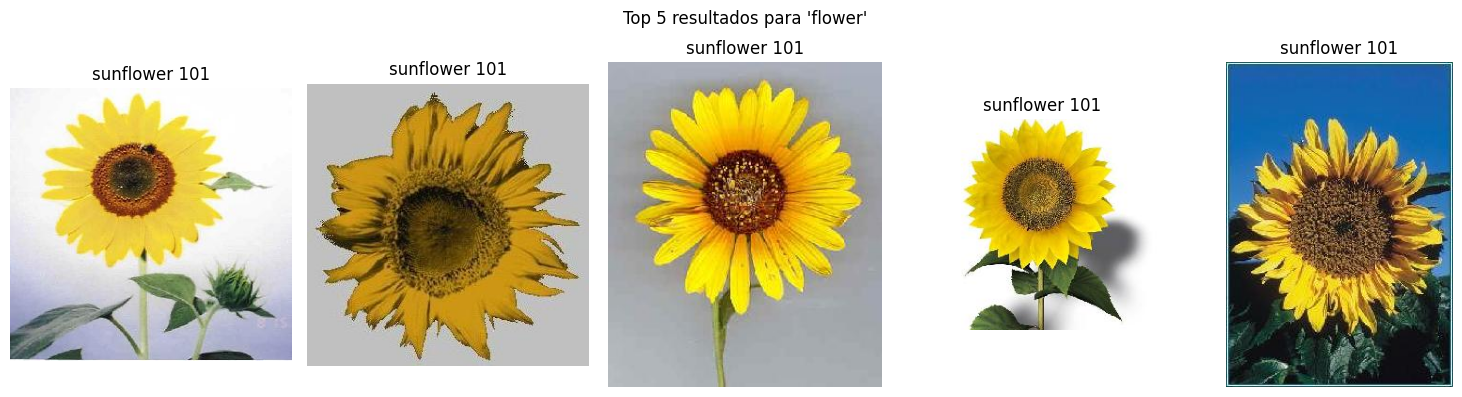

In [10]:
text_to_image_search("flower", top_k=5)